#📊 Proyecto de Análisis de Sentimientos de Tweets con un modelo de Clasificación.

# 🎯 Problema de Negocio

https://github.com/BootcampXperience/ML_Classification_Tweets/blob/main/README.md

El objetivo de este proyecto es analizar los sentimientos de los tweets, identificando si los mensajes son positivos o negativos. Utilizando un conjunto de datos de 1,600,000 tweets preprocesados, se pretende generar diversas características que se utilizarán para entrenar un modelo de clasificación.

#❓ Preguntas Clave

> 📈 ¿Qué tan efectivos son los análisis de sentimientos aplicados sobre datos textuales como los tweets?

> 🔄 ¿Qué transformaciones y características textuales son relevantes para mejorar la predicción de sentimientos?

> 😏 ¿Cómo podemos detectar sarcasmo en tweets utilizando técnicas de análisis de sentimientos?

> 🧮 ¿Qué métricas se pueden utilizar para evaluar el desempeño del modelo?

# 1. CONFIGURACIÓN DEL AMBIENTE

In [ ]:
%%capture
!pip install nltk
!pip install emoji
!pip install vaderSentiment
!pip install textblob
!pip install num2words

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import string
import sklearn
import emoji
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## tokenizador
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
import math
from num2words import num2words

import textblob
from textblob import TextBlob
import nltk
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# 2. CARGANDO BASE DE DATOS

In [ ]:
df_tweets = pd.read_csv('/content/drive/MyDrive/BOOTCAMP XPERIENCE/ML CLASSIFICATION TWEETS/training.1600000.processed.noemoticon.csv', encoding='latin-1')
df_tweets.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
df_tweets.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
df_tweets

,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   ids     1599999 non-null  int64 
 2   date    1599999 non-null  object
 3   flag    1599999 non-null  object
 4   user    1599999 non-null  object
 5   text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


* Notamos la no presencia de datos nulos.

## 2.1 ANÁLISIS EXPLORATORIO DEL DATASET

### 2.1.1 ANÁLISIS GRÁFICO - DÍA, MES Y DÍA DE SEMANA

In [ ]:
from datetime import datetime

df_tweets['month'] = pd.to_datetime(df_tweets['date']).dt.month
df_tweets['day'] = pd.to_datetime(df_tweets['date']).dt.day
df_tweets['day_name'] = pd.to_datetime(df_tweets['date']).dt.day_name()
df_tweets

,target,ids,date,flag,user,text,month,day,day_name
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,4,6,Monday
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,4,6,Monday
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,4,6,Monday
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",4,6,Monday
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,4,6,Monday
...,...,...,...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,6,16,Tuesday
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,6,16,Tuesday
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,6,16,Tuesday
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,6,16,Tuesday


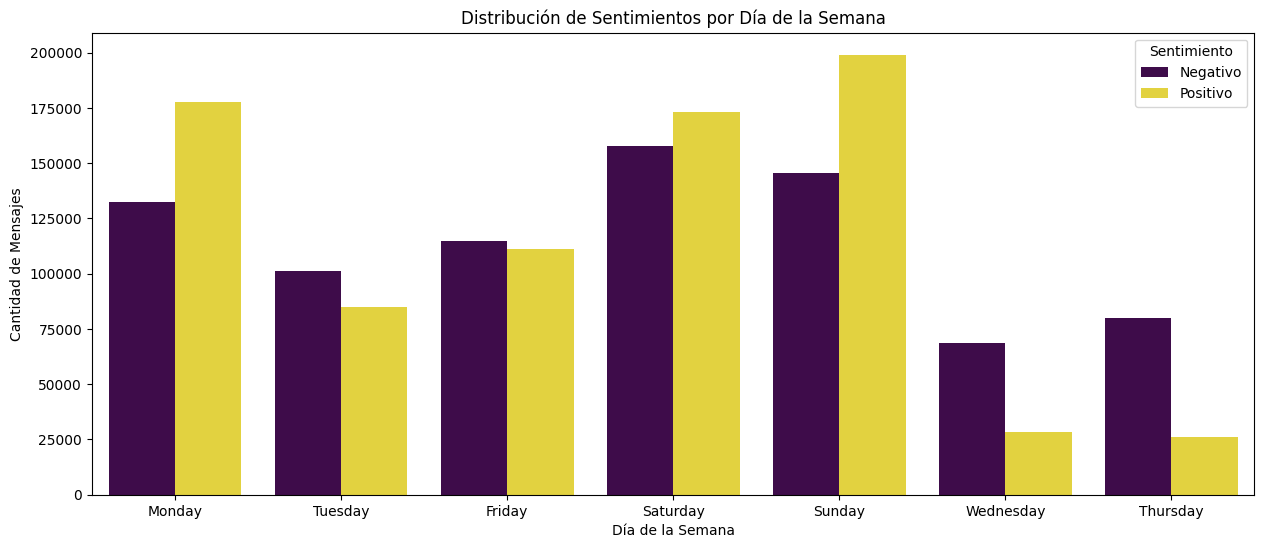

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df_tweets, x='day_name', hue='target', palette='viridis')
plt.legend(title='Sentimiento', labels=['Negativo', 'Positivo'])
plt.title('Distribución de Sentimientos por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Mensajes')
plt.show()

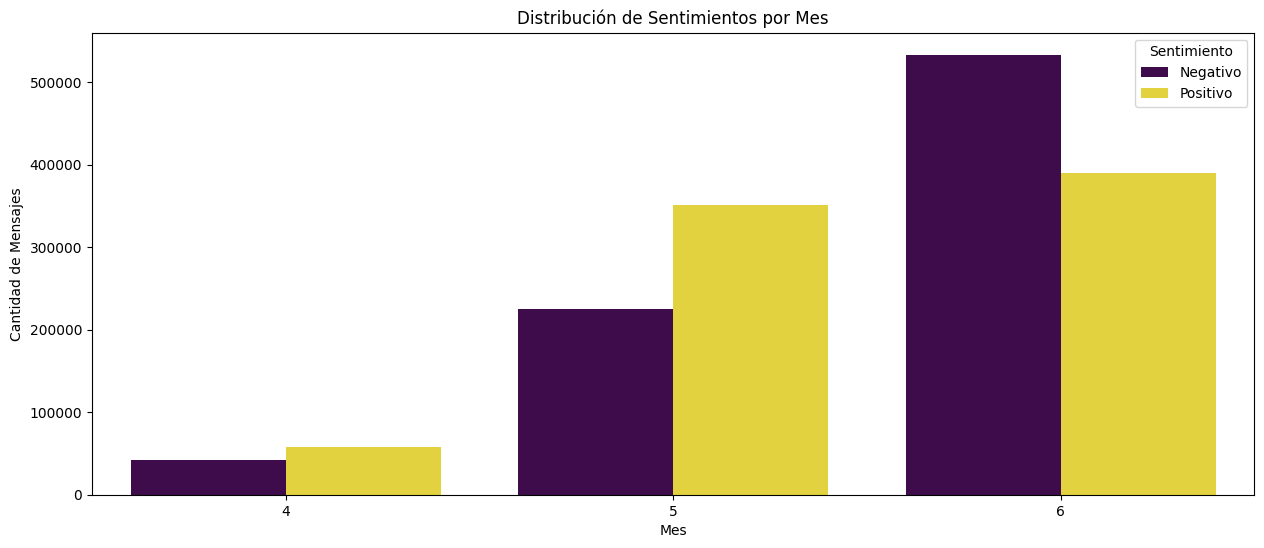

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df_tweets, x='month', hue='target', palette='viridis')
plt.legend(title='Sentimiento', labels=['Negativo', 'Positivo'])
plt.title('Distribución de Sentimientos por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Mensajes')
plt.show()

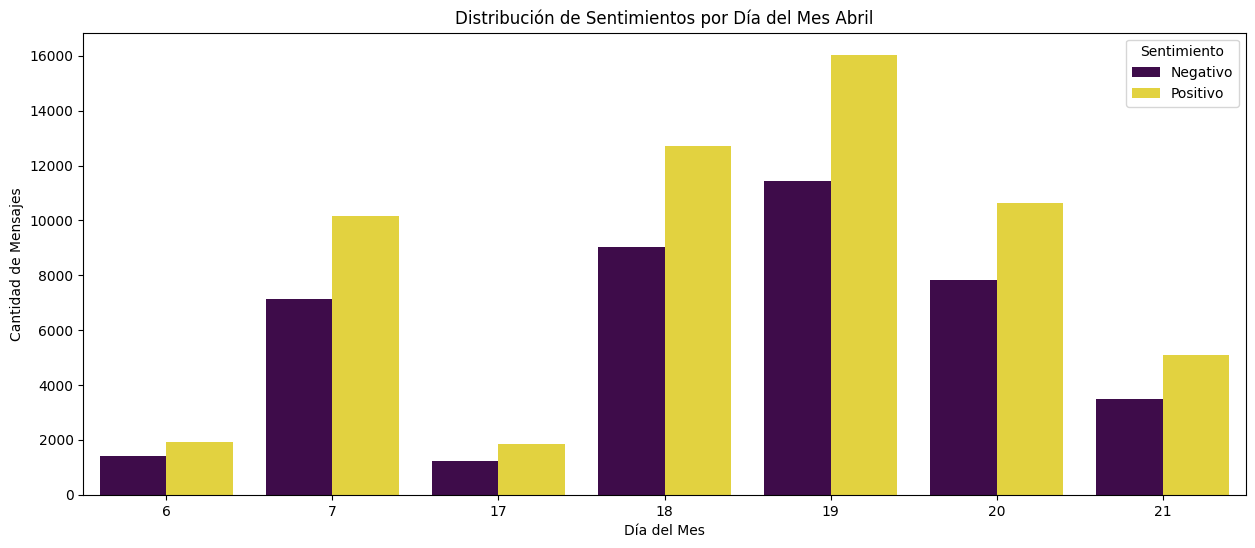

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df_tweets[df_tweets['month']==4], x='day', hue='target', palette='viridis')
plt.legend(title='Sentimiento', labels=['Negativo', 'Positivo'])
plt.title('Distribución de Sentimientos por Día del Mes Abril')
plt.xlabel('Día del Mes')
plt.ylabel('Cantidad de Mensajes')
plt.show()

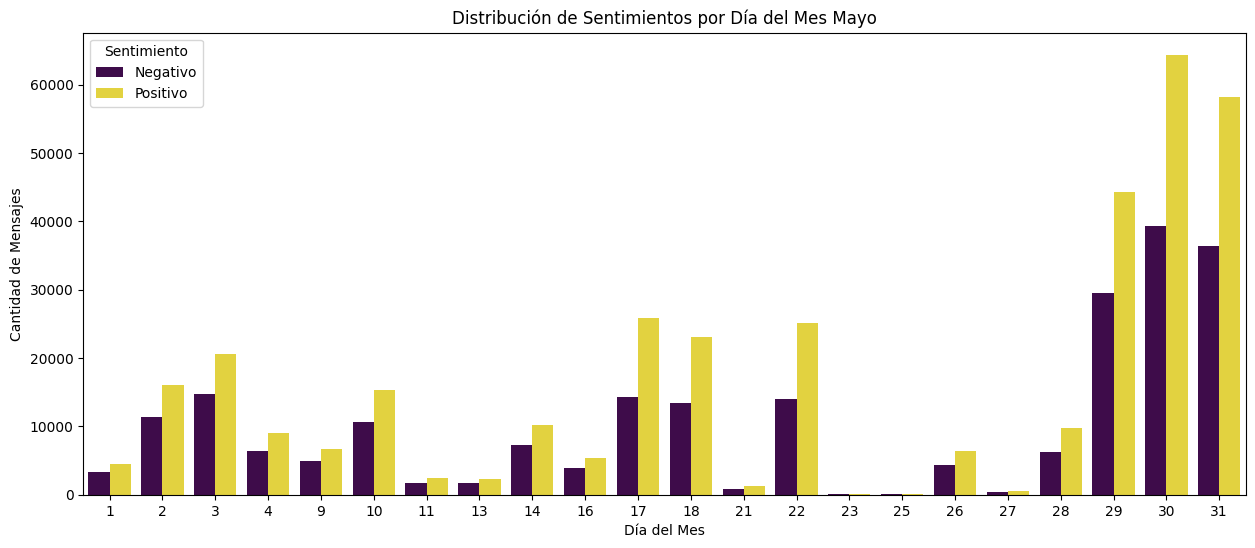

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df_tweets[df_tweets['month']==5], x='day', hue='target', palette='viridis')
plt.legend(title='Sentimiento', labels=['Negativo', 'Positivo'])
plt.title('Distribución de Sentimientos por Día del Mes Mayo')
plt.xlabel('Día del Mes')
plt.ylabel('Cantidad de Mensajes')
plt.show()

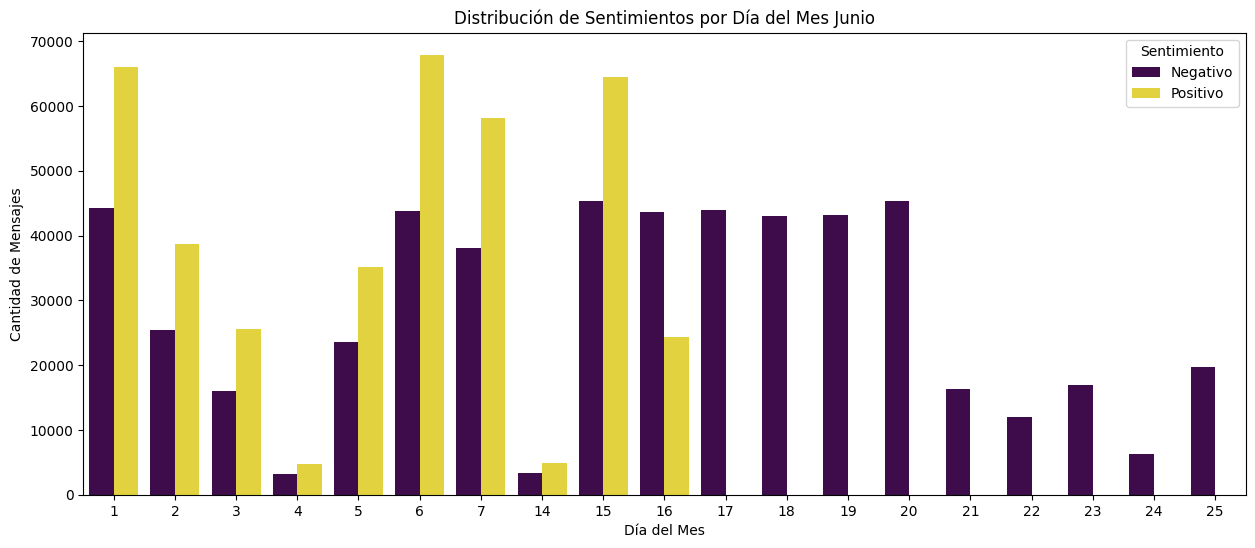

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df_tweets[df_tweets['month']==6], x='day', hue='target', palette='viridis')
plt.legend(title='Sentimiento', labels=['Negativo', 'Positivo'])
plt.title('Distribución de Sentimientos por Día del Mes Junio')
plt.xlabel('Día del Mes')
plt.ylabel('Cantidad de Mensajes')
plt.show()

### 2.1.2 ANÁLISIS GRÁFICO - USUARIOS

In [ ]:
## contando por usuario
df_tweets['user'].value_counts()

,count
user,
lost_dog,549
webwoke,345
tweetpet,310
SallytheShizzle,281
VioletsCRUK,279
...,...
Laurendaly,1
appliedlesson,1
PonteStudios,1


* Notamos que hay usuarios que tienen gran cantidad de tweets, es por eso que vamos a analizar a los primeros 25 usuarios con más tweets registrados.

In [ ]:
## Consiguiendo los 25 usuarios con más tweets
df_tweets['user'].value_counts().head(25).index

Index(['lost_dog', 'webwoke', 'tweetpet', 'SallytheShizzle', 'VioletsCRUK',
       'mcraddictal', 'tsarnick', 'what_bugs_u', 'Karen230683', 'DarkPiano',
       'SongoftheOss', 'Jayme1988', 'keza34', 'ramdomthoughts', 'shanajaca',
       'wowlew', 'TraceyHewins', 'nuttychris', 'thisgoeshere', 'Spidersamm',
       'StDAY', 'felicityfuller', 'Dogbook', '_magic8ball', 'Dutchrudder'],
      dtype='object', name='user')

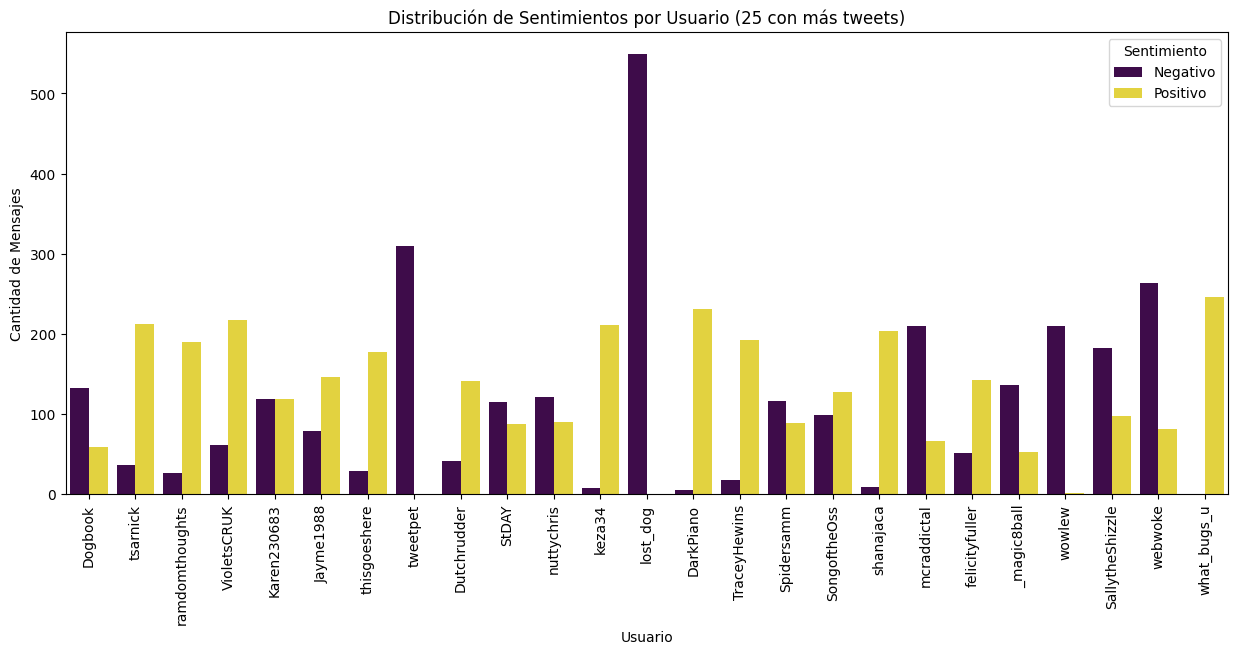

In [ ]:
## Graficamos a los 25 usuarios con más tweets segmentado por el target
plt.figure(figsize=(15, 6))
sns.countplot(data=df_tweets[df_tweets['user'].isin(df_tweets['user'].value_counts().head(25).index)], x='user', hue='target', palette='viridis')
plt.legend(title='Sentimiento', labels=['Negativo', 'Positivo'])
plt.title('Distribución de Sentimientos por Usuario (25 con más tweets)')
plt.xlabel('Usuario')
plt.ylabel('Cantidad de Mensajes')
plt.xticks(rotation=90)
plt.show()

### Conclusión del Análisis Gráfico del Dataset de Tweets

- Existe una sobre-representación de algunos usuarios, los cuales tienen una cantidad grande de tweets, lo que puede sesgar el modelo hacia su estilo de escritura.  

- Se identificó que ciertos usuarios repiten el mismo texto con pequeñas variaciones, lo que puede generar datos redundantes (Principalmente en los primeros usuarios con más tweets).

- Se observó que en ciertos periodos o en usuarios específicos predomina un solo sentimiento, lo que podría afectar la representatividad de los datos.  

- Existe el riesgo a que se genere sesgo si es que no se limita la cantidad de tweets por usuario, el modelo podría aprender más sobre la forma de escribir de ciertos usuarios en lugar de generalizar sobre los sentimientos.  

### Pasos a seguir para solucionar este inconveniente
  - Muestrear un número máximo de tweets por usuario (por ejemplo, 3-5 por clase).  
  - Detectar y eliminar tweets duplicados.  
  - Verificar que el balance de clases se mantenga después de la limpieza.  
  - Usar *stratify* al dividir en train/test para evitar distribuciones desbalanceadas.  

### 2.1.3 ANALIZANDO TIPO DE TWEETS POR USUARIO (SE TOMARÁN ALEATORIAMENTE)

In [ ]:
## Del conteo, quiero sacar los que tengas más de 10
df_tweets['user'].value_counts()

,count
user,
lost_dog,549
webwoke,345
tweetpet,310
SallytheShizzle,281
VioletsCRUK,279
...,...
Laurendaly,1
appliedlesson,1
PonteStudios,1


In [ ]:
df_tweets['user'].value_counts().index[0]

'lost_dog'

In [ ]:
## Usuario con más tweets
df_tweets[df_tweets['user'] == df_tweets['user'].value_counts().index[0]]

,target,ids,date,flag,user,text,month,day,day_name
43934,0,1676704158,Fri May 01 22:54:02 PDT 2009,NO_QUERY,lost_dog,@NyleW I am lost. Please help me find a good h...,5,1,Friday
45573,0,1677189389,Sat May 02 00:51:35 PDT 2009,NO_QUERY,lost_dog,@SallyD I am lost. Please help me find a good ...,5,2,Saturday
46918,0,1677519173,Sat May 02 02:30:50 PDT 2009,NO_QUERY,lost_dog,@zuppaholic I am lost. Please help me find a g...,5,2,Saturday
47948,0,1677752995,Sat May 02 03:47:51 PDT 2009,NO_QUERY,lost_dog,@LOSTPETUSA I am lost. Please help me find a g...,5,2,Saturday
50571,0,1678544903,Sat May 02 07:02:28 PDT 2009,NO_QUERY,lost_dog,@JeanLevertHood I am lost. Please help me find...,5,2,Saturday
...,...,...,...,...,...,...,...,...,...
792408,0,2326272045,Thu Jun 25 06:48:18 PDT 2009,NO_QUERY,lost_dog,@trooppetrie I am lost. Please help me find a ...,6,25,Thursday
793313,0,2326588770,Thu Jun 25 07:14:42 PDT 2009,NO_QUERY,lost_dog,@Carly_FTS I am lost. Please help me find a go...,6,25,Thursday
793609,0,2326689658,Thu Jun 25 07:22:51 PDT 2009,NO_QUERY,lost_dog,@inathlone I am lost. Please help me find a go...,6,25,Thursday
798607,0,2328636087,Thu Jun 25 09:49:04 PDT 2009,NO_QUERY,lost_dog,@Kram I am lost. Please help me find a good ho...,6,25,Thursday


* El usuario "lost_dog" tiene muchos tweets repetidos, y son de una sola clase (negativo), que solo tienen como variación las menciones.
* Esto nos indica que se podría tratar de un bot.
* Si dejamos todos estos tweets, podría sesgar nuestro modelo, ya que podría aprender ciertos patrones, afectando la diversidad en nuestro conjunto de datos.
* Consideramos realizar eliminarla mayor cantidad de tweets repetidos y verificar a los demás usuarios.

In [ ]:
## Segundo usuario con más twwets
df_tweets[df_tweets['user'] == df_tweets['user'].value_counts().index[1]]

,target,ids,date,flag,user,text,month,day,day_name
363302,0,2047801265,Fri Jun 05 14:12:05 PDT 2009,NO_QUERY,webwoke,"auchh, drop by 1 (32)elitestv.com",6,5,Friday
366528,0,2048883634,Fri Jun 05 15:56:07 PDT 2009,NO_QUERY,webwoke,"auchh, drop by 1 (7)pedeee.com",6,5,Friday
366529,0,2048883882,Fri Jun 05 15:56:08 PDT 2009,NO_QUERY,webwoke,"auchh, drop by 1 (17)rumahabi.com",6,5,Friday
366596,0,2048903368,Fri Jun 05 15:58:07 PDT 2009,NO_QUERY,webwoke,"auchh, drop by 1 (18)twitter.com",6,5,Friday
366598,0,2048903446,Fri Jun 05 15:58:07 PDT 2009,NO_QUERY,webwoke,"auchh, drop by 1 (19)yehia.org",6,5,Friday
...,...,...,...,...,...,...,...,...,...
1505837,4,2072460652,Sun Jun 07 21:04:09 PDT 2009,NO_QUERY,webwoke,ohh yesss move up by 3 99. mybloglog.com,6,7,Sunday
1505840,4,2072460726,Sun Jun 07 21:04:09 PDT 2009,NO_QUERY,webwoke,Gooo... move up by 3 100. digg.com,6,7,Sunday
1506013,4,2072494733,Sun Jun 07 21:08:09 PDT 2009,NO_QUERY,webwoke,GoGoGo... move up by 2 105. ardhindie.com,6,7,Sunday
1506014,4,2072494818,Sun Jun 07 21:08:09 PDT 2009,NO_QUERY,webwoke,uhuiii... move up by 2 106. seo-guy.com,6,7,Sunday


* El usuario "webwoke", también observamos que tiene tweets que tienen una tendencia, con ligeros cambios, podría tratarse de un bot.
* Muchos de los tweets están relacionados con números y dominios, lo que podría generar ruido en nuestro futuro análisis. Sin embargo, al igual que el anterior usuario analizado, sería recomendable dejar solo cierta cantidad de tweets de este usuario para poder tener variedad en nuestro dataset.
* Es así, que se evaluará eliminar muchos tweets que tienen tendencia de repetición, pero nos quedaremos solo con algunos.

In [ ]:
df_tweets[df_tweets['user'] == df_tweets['user'].value_counts().index[2]]

,target,ids,date,flag,user,text,month,day,day_name
9559,0,1548797240,Fri Apr 17 22:00:01 PDT 2009,NO_QUERY,tweetpet,@tweetchild Clean Me!,4,17,Friday
9560,0,1548797247,Fri Apr 17 22:00:01 PDT 2009,NO_QUERY,tweetpet,@tweetchild Clean Me!,4,17,Friday
9561,0,1548797393,Fri Apr 17 22:00:02 PDT 2009,NO_QUERY,tweetpet,@chromachris Clean Me!,4,17,Friday
9563,0,1548797501,Fri Apr 17 22:00:03 PDT 2009,NO_QUERY,tweetpet,@reatlas Clean Me!,4,17,Friday
9564,0,1548797565,Fri Apr 17 22:00:03 PDT 2009,NO_QUERY,tweetpet,@chromachris Clean Me!,4,17,Friday
...,...,...,...,...,...,...,...,...,...
49678,0,1678233051,Sat May 02 06:00:37 PDT 2009,NO_QUERY,tweetpet,@amateurdelta54 Clean Me!,5,2,Saturday
49679,0,1678233110,Sat May 02 06:00:38 PDT 2009,NO_QUERY,tweetpet,@littleblue62 Clean Me!,5,2,Saturday
49680,0,1678233215,Sat May 02 06:00:39 PDT 2009,NO_QUERY,tweetpet,@Shawn1976 Clean Me!,5,2,Saturday
49693,0,1678235166,Sat May 02 06:01:02 PDT 2009,NO_QUERY,tweetpet,@TKgFMb hungry. Type 'feed' to feed me...,5,2,Saturday


* El usuario "tweetpet", vemos que tiene muchos tweets que se repiten y solo cambia la mención, muy parecido al usuario "lost_dog".
* De la misma manera, trataremos de limitar sus tweets ya que podrían generar un sesgo si se mantienen todos, ay que tiene una cantidad grande de tweets en el dataset.

In [ ]:
df_tweets[df_tweets['user'] == df_tweets['user'].value_counts().index[3]]

,target,ids,date,flag,user,text,month,day,day_name
140179,0,1880976026,Fri May 22 03:10:00 PDT 2009,NO_QUERY,SallytheShizzle,@OfficialAS without ASA....i'm sorry if you di...,5,22,Friday
141302,0,1881233915,Fri May 22 04:02:26 PDT 2009,NO_QUERY,SallytheShizzle,@BrittGoosie yeah we know don't look....... i...,5,22,Friday
141321,0,1881238831,Fri May 22 04:03:23 PDT 2009,NO_QUERY,SallytheShizzle,@OfficialAS @angelapanagacos i'm scared,5,22,Friday
141653,0,1881310608,Fri May 22 04:16:54 PDT 2009,NO_QUERY,SallytheShizzle,@angelapanagacos yeah true true. I've been app...,5,22,Friday
141741,0,1881324735,Fri May 22 04:19:34 PDT 2009,NO_QUERY,SallytheShizzle,@BrittGoosie aww -huggles- well some people ar...,5,22,Friday
...,...,...,...,...,...,...,...,...,...
1572556,4,2188944727,Mon Jun 15 22:54:03 PDT 2009,NO_QUERY,SallytheShizzle,I Iz Baking A B'day Cake for @OfficialAS,6,15,Monday
1572859,4,2189002092,Mon Jun 15 23:01:32 PDT 2009,NO_QUERY,SallytheShizzle,@OfficialAS you ARE VERY SPECIAL &lt;33333,6,15,Monday
1574435,4,2189240369,Mon Jun 15 23:34:11 PDT 2009,NO_QUERY,SallytheShizzle,@OfficialAS I'm glad I love you! I'll get on ...,6,15,Monday
1597080,4,2192837783,Tue Jun 16 07:37:23 PDT 2009,NO_QUERY,SallytheShizzle,in BETTER news...MARILYN MANSON IS PLAYING FES...,6,16,Tuesday


In [ ]:
df_tweets[df_tweets['user'] == df_tweets['user'].value_counts().index[4]]

,target,ids,date,flag,user,text,month,day,day_name
2479,0,1468385804,Tue Apr 07 01:20:58 PDT 2009,NO_QUERY,VioletsCRUK,@jason_2008 Hello! Im out of coffee this morni...,4,7,Tuesday
53998,0,1680871622,Sat May 02 12:41:30 PDT 2009,NO_QUERY,VioletsCRUK,I burnt the roof off my mouth with mashed pota...,5,2,Saturday
74686,0,1694901861,Mon May 04 04:32:41 PDT 2009,NO_QUERY,VioletsCRUK,@jason_2008 I know!!! Such a crappy day for a ...,5,4,Monday
130575,0,1835338065,Mon May 18 05:45:29 PDT 2009,NO_QUERY,VioletsCRUK,Im goin 2 hane 2 have a marathon tweeting sess...,5,18,Monday
131194,0,1835475242,Mon May 18 06:04:36 PDT 2009,NO_QUERY,VioletsCRUK,@Karen230683 lol Im dreading it!! Will have t...,5,18,Monday
...,...,...,...,...,...,...,...,...,...
1588204,4,2191048326,Tue Jun 16 04:23:49 PDT 2009,NO_QUERY,VioletsCRUK,@SteveHealy lmao..glad you can lend a hand..im...,6,16,Tuesday
1590500,4,2191404918,Tue Jun 16 05:12:19 PDT 2009,NO_QUERY,VioletsCRUK,Its sunny..think i need to go out and chill in...,6,16,Tuesday
1591525,4,2191581024,Tue Jun 16 05:34:14 PDT 2009,NO_QUERY,VioletsCRUK,@PaceyGorilla (clears throat nervously) Erm..y...,6,16,Tuesday
1592528,4,2191754747,Tue Jun 16 05:54:38 PDT 2009,NO_QUERY,VioletsCRUK,@adaminker Change the water to vodka then..it ...,6,16,Tuesday


In [ ]:
df_tweets[df_tweets['user'] == df_tweets['user'].value_counts().index[5]]

,target,ids,date,flag,user,text,month,day,day_name
78962,0,1751605581,Sat May 09 19:50:38 PDT 2009,NO_QUERY,mcraddictal,@mcr_chick i wanna sleep.lol. Urgh. I feel lik...,5,9,Saturday
80894,0,1752504346,Sat May 09 22:06:32 PDT 2009,NO_QUERY,mcraddictal,@mcrfash1 oh no! I'm sorry! I have to go to wa...,5,9,Saturday
81389,0,1752696792,Sat May 09 22:41:12 PDT 2009,NO_QUERY,mcraddictal,"@MCRIsAPleasure yes, very but i'll stay up a ...",5,9,Saturday
87541,0,1754513081,Sun May 10 06:31:37 PDT 2009,NO_QUERY,mcraddictal,@AmberConfusion it's just a phase...,5,10,Sunday
88434,0,1754869201,Sun May 10 07:37:14 PDT 2009,NO_QUERY,mcraddictal,@MyCheMicALmuse i'm sorry hun. are you still ...,5,10,Sunday
...,...,...,...,...,...,...,...,...,...
1289355,4,2002597652,Tue Jun 02 04:40:04 PDT 2009,NO_QUERY,mcraddictal,@neszlifeasmcrmy bye nessy ily too,6,2,Tuesday
1296279,4,2003979542,Tue Jun 02 07:28:11 PDT 2009,NO_QUERY,mcraddictal,@travisking haha. I've noticed. Have fun,6,2,Tuesday
1335830,4,2017104052,Wed Jun 03 07:51:59 PDT 2009,NO_QUERY,mcraddictal,@mcrfash1 it's okay. It's over now,6,3,Wednesday
1364456,4,2049746929,Fri Jun 05 17:25:40 PDT 2009,NO_QUERY,mcraddictal,@JessicklesFTW my mutt just tried to rip mu a...,6,5,Friday


In [ ]:
df_tweets[df_tweets['user'] == df_tweets['user'].value_counts().index[18598]]

,target,ids,date,flag,user,text,month,day,day_name
100,0,1467837189,Mon Apr 06 22:26:38 PDT 2009,NO_QUERY,cityrat59,@mangaaa I hope they will increase the capacit...,4,6,Monday
355094,0,2039936810,Thu Jun 04 23:11:28 PDT 2009,NO_QUERY,cityrat59,@chibbigirl Guess I have to wait until Septemb...,6,4,Thursday
422356,0,2062626344,Sat Jun 06 23:47:37 PDT 2009,NO_QUERY,cityrat59,"@jonbuscall That's one cool tool Jon, pity it'...",6,6,Saturday
776882,0,2322268197,Wed Jun 24 22:19:31 PDT 2009,NO_QUERY,cityrat59,"Thursdaymorning blues, been sick all night...",6,24,Wednesday
921590,4,1754222234,Sun May 10 05:28:32 PDT 2009,NO_QUERY,cityrat59,@olaj Will work!,5,10,Sunday
950753,4,1824087247,Sun May 17 00:00:08 PDT 2009,NO_QUERY,cityrat59,"@janole Thanks, got that also form @phoneboy y...",5,17,Sunday
1054919,4,1962114194,Fri May 29 10:32:41 PDT 2009,NO_QUERY,cityrat59,"@SherylBreuker Thanks dear, I'm humbled!",5,29,Friday
1186335,4,1982942228,Sun May 31 12:12:01 PDT 2009,NO_QUERY,cityrat59,@PhoneBoy I gathered that! He is doing an exce...,5,31,Sunday
1279429,4,2001535705,Tue Jun 02 01:12:26 PDT 2009,NO_QUERY,cityrat59,"@byBalsam @Johan @Hannes82 Thanks guys, I'm ha...",6,2,Tuesday
1313781,4,2013828519,Tue Jun 02 23:41:24 PDT 2009,NO_QUERY,cityrat59,@raquelhirsch Thanks for the ReTweet!,6,2,Tuesday


In [ ]:
df_tweets[df_tweets['user'] == df_tweets['user'].value_counts().index[18000]]

,target,ids,date,flag,user,text,month,day,day_name
147637,0,1882856165,Fri May 22 07:36:08 PDT 2009,NO_QUERY,Alpharalpha,Well that blows virginmobile charges me for g...,5,22,Friday
363088,0,2047666553,Fri Jun 05 13:59:50 PDT 2009,NO_QUERY,Alpharalpha,"@mordenL uh oh, denver's baggage system is rek...",6,5,Friday
363274,0,2047779696,Fri Jun 05 14:10:08 PDT 2009,NO_QUERY,Alpharalpha,@Argyle117 ouch more good vibes coming you...,6,5,Friday
370916,0,2050261961,Fri Jun 05 18:21:22 PDT 2009,NO_QUERY,Alpharalpha,@karasukun thats an uncool name for that,6,5,Friday
824695,4,1556292516,Sat Apr 18 22:17:42 PDT 2009,NO_QUERY,Alpharalpha,"good night twitter people, i will return",4,18,Saturday
918143,4,1753601799,Sun May 10 02:27:57 PDT 2009,NO_QUERY,Alpharalpha,@goebicyu rentaphone yesy have,5,10,Sunday
918410,4,1753649578,Sun May 10 02:42:43 PDT 2009,NO_QUERY,Alpharalpha,@VRadio if you take backstreet boya and put th...,5,10,Sunday
919144,4,1753773733,Sun May 10 03:22:29 PDT 2009,NO_QUERY,Alpharalpha,@mopedronin come to kyoto weather is great he...,5,10,Sunday
919394,4,1753807059,Sun May 10 03:33:12 PDT 2009,NO_QUERY,Alpharalpha,@goebicyu try direct message to me here on twi...,5,10,Sunday
919998,4,1753919049,Sun May 10 04:07:34 PDT 2009,NO_QUERY,Alpharalpha,@mopedronin bullet train from tokyo the gf ...,5,10,Sunday


In [ ]:
df_tweets[df_tweets['user'] == df_tweets['user'].value_counts().index[10000]]

,target,ids,date,flag,user,text,month,day,day_name
81959,0,1752896655,Sat May 09 23:21:52 PDT 2009,NO_QUERY,PsychoRee,"Honestly, Times like these, make me wish i had...",5,9,Saturday
307842,0,2000567850,Mon Jun 01 22:24:46 PDT 2009,NO_QUERY,PsychoRee,@ChelleRenee80 Uhmm how bout now!?? I'm sad it...,6,1,Monday
820360,4,1553706394,Sat Apr 18 14:59:40 PDT 2009,NO_QUERY,PsychoRee,"home from the Park That was fun, I am now ful...",4,18,Saturday
864883,4,1677363045,Sat May 02 01:41:35 PDT 2009,NO_QUERY,PsychoRee,"Should be sleeping now, Cant wait to see the n...",5,2,Saturday
1094342,4,1970140675,Sat May 30 02:37:12 PDT 2009,NO_QUERY,PsychoRee,Just got back home! Had fun sittin around wit...,5,30,Saturday
1240799,4,1993862288,Mon Jun 01 11:02:45 PDT 2009,NO_QUERY,PsychoRee,Oh.. &amp;&amp; Tre says... &quot;Hoes Hoes Ho...,6,1,Monday
1246972,4,1995445370,Mon Jun 01 13:30:09 PDT 2009,NO_QUERY,PsychoRee,"@kristenstewart9 When i click that link, it ta...",6,1,Monday
1269596,4,2000256130,Mon Jun 01 21:43:42 PDT 2009,NO_QUERY,PsychoRee,At My sisters house tonite! I may come home l...,6,1,Monday
1282105,4,2001807212,Tue Jun 02 02:08:24 PDT 2009,NO_QUERY,PsychoRee,Well.. it is 4am.. Time for bed!! Movies with ...,6,2,Tuesday
1309737,4,2013144088,Tue Jun 02 22:00:45 PDT 2009,NO_QUERY,PsychoRee,Back from the movies! WE HAD FUN LIKE ALWAYS...,6,2,Tuesday


In [ ]:
df_tweets[df_tweets['user'] == df_tweets['user'].value_counts().index[5000]]

,target,ids,date,flag,user,text,month,day,day_name
81113,0,1752591830,Sat May 09 22:21:44 PDT 2009,NO_QUERY,counternotions,@netgarden May have played last NBA game. The...,5,9,Saturday
857229,4,1573894817,Tue Apr 21 03:21:41 PDT 2009,NO_QUERY,counternotions,@semanticwill Would it be a bargain at $999?,4,21,Tuesday
911734,4,1752052330,Sat May 09 20:56:12 PDT 2009,NO_QUERY,counternotions,@MissXu Would *you* pay $60K for a lunch with ...,5,9,Saturday
912204,4,1752225024,Sat May 09 21:21:17 PDT 2009,NO_QUERY,counternotions,@MissXu Nope Not that I have to worry about t...,5,9,Saturday
934985,4,1792617703,Wed May 13 23:41:25 PDT 2009,NO_QUERY,counternotions,"@raymondpirouz It has to, otherwise I'd be del...",5,13,Wednesday
948159,4,1823350562,Sat May 16 21:44:27 PDT 2009,NO_QUERY,counternotions,@raymondpirouz What else can the bankers do?,5,16,Saturday
948890,4,1823571455,Sat May 16 22:20:09 PDT 2009,NO_QUERY,counternotions,@raymondpirouz Loved this comment: whatï¿½s th...,5,16,Saturday
977497,4,1833744266,Mon May 18 00:18:22 PDT 2009,NO_QUERY,counternotions,@mollyblock How is this not like Madoff declar...,5,18,Monday
1002593,4,1880226363,Fri May 22 00:30:51 PDT 2009,NO_QUERY,counternotions,@amyhoy Yeah. May not even be Arial.,5,22,Friday
1004616,4,1880431708,Fri May 22 01:13:05 PDT 2009,NO_QUERY,counternotions,"@amyhoy Perfect episode for House, MD, if you ...",5,22,Friday


In [ ]:
df_tweets[df_tweets['user'] == df_tweets['user'].value_counts().index[1000]]

,target,ids,date,flag,user,text,month,day,day_name
105525,0,1823081298,Sat May 16 21:04:15 PDT 2009,NO_QUERY,alli_jonas,push play moving means that whenever i go to l...,5,16,Saturday
177832,0,1965815375,Fri May 29 16:35:37 PDT 2009,NO_QUERY,alli_jonas,@mitchelmusso i keep trying to get through but...,5,29,Friday
204533,0,1972641585,Sat May 30 09:36:30 PDT 2009,NO_QUERY,alli_jonas,i miss new york,5,30,Saturday
262140,0,1986105748,Sun May 31 18:19:57 PDT 2009,NO_QUERY,alli_jonas,@ddlovato miley lost her award,5,31,Sunday
303438,0,1999462799,Mon Jun 01 20:15:39 PDT 2009,NO_QUERY,alli_jonas,@xoxnaquel my mom wouldnt let me get that pill...,6,1,Monday
306015,0,2000129908,Mon Jun 01 21:28:18 PDT 2009,NO_QUERY,alli_jonas,"this movie is so sad it's so good, but so sad...",6,1,Monday
409387,0,2059633382,Sat Jun 06 17:19:30 PDT 2009,NO_QUERY,alli_jonas,@xoxnaquel is that from the live chat? ...That...,6,6,Saturday
409515,0,2059663744,Sat Jun 06 17:23:12 PDT 2009,NO_QUERY,alli_jonas,@Jonasbrothers i know!! I wrote LVATT 10 DAYS ...,6,6,Saturday
456542,0,2071312504,Sun Jun 07 19:11:25 PDT 2009,NO_QUERY,alli_jonas,my mom took my phone whatever.,6,7,Sunday
630868,0,2232135964,Thu Jun 18 19:30:03 PDT 2009,NO_QUERY,alli_jonas,"@xoxnaquel hhaha, i wish my mom did that but s...",6,18,Thursday


In [ ]:
df_tweets[df_tweets['user'] == df_tweets['user'].value_counts().index[200]]

,target,ids,date,flag,user,text,month,day,day_name
13713,0,1553365986,Sat Apr 18 14:04:27 PDT 2009,NO_QUERY,spaulds1,@leporter Listened to @leolaporte Missed part ...,4,18,Saturday
49797,0,1678265928,Sat May 02 06:07:35 PDT 2009,NO_QUERY,spaulds1,@nbaisley Still not done? What @ now? DNS stuf...,5,2,Saturday
52293,0,1679384328,Sat May 02 09:13:31 PDT 2009,NO_QUERY,spaulds1,@davidkyle I Think 'Intel Retail' People Saw i...,5,2,Saturday
64820,0,1688964387,Sun May 03 12:18:57 PDT 2009,NO_QUERY,spaulds1,@alternatefinch Busy? Sorry ur so busy!!,5,3,Sunday
67689,0,1692479478,Sun May 03 20:05:05 PDT 2009,NO_QUERY,spaulds1,#Swineflu NOW have one confirmed case in NC!!!...,5,3,Sunday
...,...,...,...,...,...,...,...,...,...
1501416,4,2071407345,Sun Jun 07 19:20:51 PDT 2009,NO_QUERY,spaulds1,@swagbot Glad ur good. I'm good! I do love the...,6,7,Sunday
1501670,4,2071500984,Sun Jun 07 19:29:59 PDT 2009,NO_QUERY,spaulds1,@crystaldempsey CONGRATS on the new job!!,6,7,Sunday
1502405,4,2071682896,Sun Jun 07 19:46:16 PDT 2009,NO_QUERY,spaulds1,@IndyEnigma Hope 2 visit Indiana in Fall 4 HS ...,6,7,Sunday
1503946,4,2072073867,Sun Jun 07 20:21:22 PDT 2009,NO_QUERY,spaulds1,@IndyEnigma Dinner or coffee both sound Gr8! H...,6,7,Sunday


* El análisis mostró que los cuatro usuarios con más tweets tienden a repetir mensajes, lo cual nos da un indicio de que pudiera tratarse de bots.
* Por otro lado, los demás usuarios, que siguen a estos cuatro primeros, presentan tweets variados. Luego se realizó un análisis variado de usuarios en el dataset, encontrando tweets variados, tanto para la clase negativa como positiva.
* Luego de todo el análisis, llegamos a la conclusión, que limitar la cantidad de tweets por usuario ayudaría a reducir sesgos en el modelo.

# 3. PREPROCESAMIENTO DE DATOS

* Si un usuario publica cientos de tweets con opiniones muy parecidas, sus sentimientos pueden dominar la distribución general, haciendo que muchos análisis en el texto no reflejen la realidad del conjunto. Al limitar la cantidad de tweets por usuario, nos aseguramos de que todos los usuarios tengan una representación más justa.

* Si tomamos solo tweets al azar, podríamos terminar con una mayoría de tweets positivos o negativos, lo que daría una impresión distorsionada del sentimiento real. Al seleccionar una cantidad fija de tweets positivos y negativos por usuario, logramos un dataset más balanceado y representativo de las distintas opiniones.

* Algunas cuentas, especialmente bots o usuarios específicos que tienen mayor cantidad de tweets, publican tweets repetitivos con ligeros cambios en menciones o hashtags. Esto podría introducir sesgo en el análisis y podría generar que ciertos sentimientos parezcan más predominantes de lo que realmente son. Filtrando estos tweets, trabajaremos con datos más limpios y auténticos.

* Un dataset bien filtrado nos permite visualizar tendencias más claras en los sentimientos, sin que estén distorsionadas por usuarios demasiado activos o contenido repetitivo. Esto hace que las conclusiones sean más sólidas y aplicables a futuros análisis o modelos de predicción.

## 3.1 LIMITAR LOS TWEETS DE LOS USUARIOS, 3 POR CADA CLASE COMO MÁXIMO

In [ ]:
## Limitamos los tweets de los usuarios a 3 por cada clase
df_test = df_tweets.groupby(['user', 'target']).head(3).reset_index(drop=True)
df_test

,target,ids,date,flag,user,text,month,day,day_name
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,4,6,Monday
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,4,6,Monday
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,4,6,Monday
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",4,6,Monday
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,4,6,Monday
...,...,...,...,...,...,...,...,...,...
1191111,4,2193579489,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,EvolveTom,"@Cliff_Forster Yeah, that does work better tha...",6,16,Tuesday
1191112,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,6,16,Tuesday
1191113,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,6,16,Tuesday
1191114,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,6,16,Tuesday


In [ ]:
## Verificando que se haya generado lo buscado
df_test['user'].value_counts()

,count
user,
MrsMerrygoldx3,6
itsanimesh,6
gi_gi_bee,6
jsoo,6
chriisay,6
...,...
Laurendaly,1
appliedlesson,1
PonteStudios,1


* Generamos un DataFrame con hasta 3 tweets por usuario y categoría del target, lo que ayuda a balancear nuestro dataset y reducir posibles sesgos.

### VERIFICANDO BALANCE DE CLASES

In [ ]:
## Verificando el balance de nuestras clases
df_test['target'].value_counts()

,count
target,
0,620232
4,570884


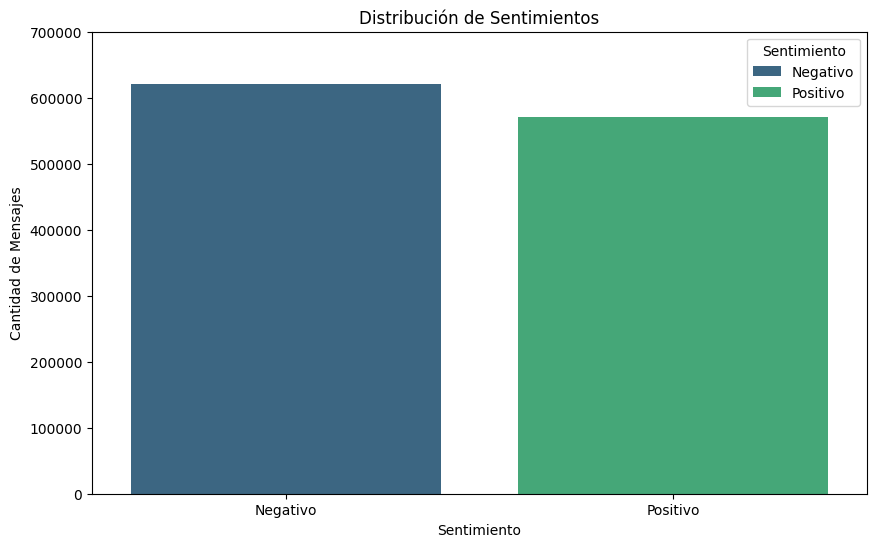

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_test, x='target', palette='viridis')
plt.legend(title='Sentimiento', labels=['Negativo', 'Positivo'])
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Mensajes')
plt.yticks(range(0, 800000, 100000))
plt.xticks([0, 1], ['Negativo', 'Positivo'])
plt.show()

* Podemos notar que hay un ligero desbalance, después de realizar la limitación de tweets por usuario.
* De todas maneras, consideramos que no es nada excesivo, decidiremos continuar de esta manera.
* Nos queda evaluar la limpieza del texto y eliminar duplicados.

### ELIMINAMOS COLUMNAS QUE CONSIDERAMOS NO RELEVANTES PARA NUESTRO ANÁLISIS

In [ ]:
df_test.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text', 'month', 'day',
       'day_name'],
      dtype='object')

In [ ]:
df_test.drop(['ids', 'date', 'flag', 'user', 'month', 'day', 'day_name'], axis=1, inplace=True)
df_test

,target,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1191111,4,"@Cliff_Forster Yeah, that does work better tha..."
1191112,4,Just woke up. Having no school is the best fee...
1191113,4,TheWDB.com - Very cool to hear old Walt interv...
1191114,4,Are you ready for your MoJo Makeover? Ask me f...


## 3.2 VALORES NULOS

In [ ]:
df_test.isnull().sum()

,0
target,0
text,0


* No hay presencia de valores nulos

## 3.3 DUPLICADOS

In [ ]:
df_test['text'].duplicated().sum()

12943

* Validamos que tenemos 12943 filas duplicadas. Esto no nos aporta valor.
* Se procede a eliminar las filas duplicadas.

In [ ]:
print(f'Cantidad de filas antes de eliminar duplicados: {df_test.shape[0]}')
df_test.drop_duplicates(inplace=True)
print('**************')
print(f'Cantidad de filas después de eliminar duplicados: {df_test.shape[0]}')

Cantidad de filas antes de eliminar duplicados: 1191116
**************
Cantidad de filas después de eliminar duplicados: 1179680


## 3.4 PRIMER TRATAMIENTO (URL, Hashtags, emoticones, etc...)

In [ ]:
def clean_text(text):
    ## Eliminar URLs (http, https, www)
    text = re.sub(r'http\S+|www\S+', '', text)

    ## Eliminar menciones de usuarios
    text = re.sub(r'@[^\s]+', '', text)

    ## Eliminando los Hashtags
    text = re.sub(r'#\w+', '', text)

    ## Eliminando los emojis
    text = emoji.replace_emoji(text, replace="")

    ## Eliminar dominios .com (palabras terminadas en .com)
    text = re.sub(r'\b\S*\.com\b', '', text)

    # Eliminar caracteres no ASCII (como â\x99«)
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    ## Convirtiendo % en palabra percent
    text = re.sub(r'%', ' percent', text)

    ## Eliminando signos de puntuación
    text = text.translate(str.maketrans('', '', string.punctuation + '¡¿'))
    # text = re.sub(rf"[{re.escape(string.punctuation)}]", ' ', text)

    ## Cambiando el doble espacio a espacio simple
    # text = text.replace('  ', ' ')
    text = re.sub(r'\s+', ' ', text)

    ## Cambiando los números por textos
    # text = re.sub(r'\d+', lambda m: num2words(int(m.group())), text)

    ## Eliminando los números del texto
    text = re.sub(r'\d+', '', text)
    # text = re.sub(r'\b\d+([-/]\d+)*\b', '', text)

    ## Eliminando espacios al inicio y final
    text = text.strip()

    ## Convirtiendo a Minúsculas
    text = text.lower()

    return text

In [ ]:
df_test['clean_text'] = df_test['text'].apply(clean_text)
df_test

,target,text,clean_text
0,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
1,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...
4,0,@Kwesidei not the whole crew,not the whole crew
...,...,...,...
1191111,4,"@Cliff_Forster Yeah, that does work better tha...",yeah that does work better than just waiting f...
1191112,4,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...
1191113,4,TheWDB.com - Very cool to hear old Walt interv...,very cool to hear old walt interviews
1191114,4,Are you ready for your MoJo Makeover? Ask me f...,are you ready for your mojo makeover ask me fo...


### VERIFICANDO Y ELIMINANDO DUPLICADOS DE NUESTRO TEXTO LIMPIO

In [ ]:
## Verificando si hay duplicado en el clean_text
df_test['clean_text'].duplicated().sum()

41466

* Vemos que después de realizar la limpieza del texto, existen 40789 duplicados.
* Procederemos a eliminarlos, debido a que puede ser que el ruido era lo que hacia diferente al texto, pero al final puede generar duplicidad en nuestro análisis, sin aportar valor real.

In [ ]:
## Eliminando los duplicados del clean_text
print(f'Cantidad de filas antes de eliminar duplicados: {df_test.shape[0]}')
df_test.drop_duplicates(subset='clean_text', inplace=True)
print('**************')
print(f'Cantidad de filas después de eliminar duplicados: {df_test.shape[0]}')

Cantidad de filas antes de eliminar duplicados: 1179680
**************
Cantidad de filas después de eliminar duplicados: 1138214


### VALIDANDO NUESTRO BALANCE DE CLASES

In [ ]:
## balance de clases
df_test['target'].value_counts()

,count
target,
0,596086
4,542128


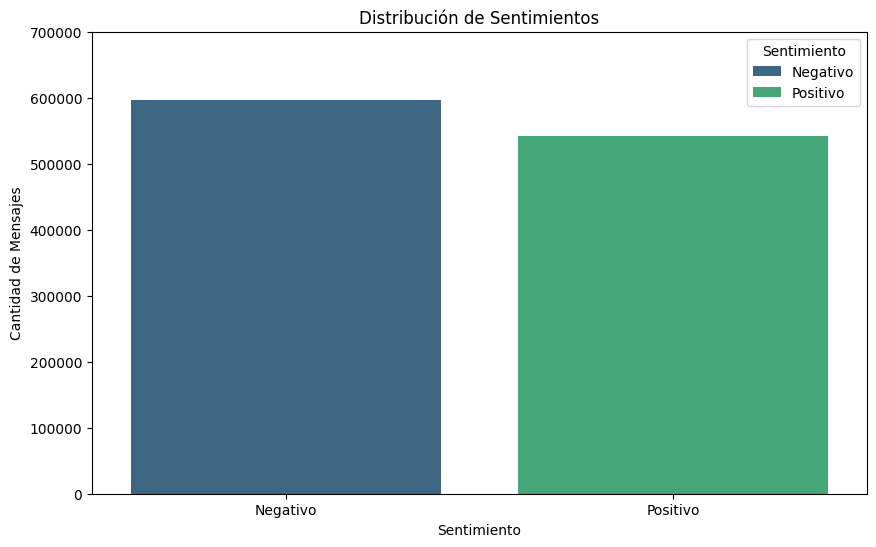

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_test, x='target', palette='viridis')
plt.legend(title='Sentimiento', labels=['Negativo', 'Positivo'])
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Mensajes')
plt.yticks(range(0, 800000, 100000))
plt.xticks([0, 1], ['Negativo', 'Positivo'])
plt.show()

* Notamos que el desbalance se mantiene a lo anterior analizado.
* Como tenemos todavía gran cantidad de tweets para nuestro análisis, estamos considerando balancear nuestro dataset, realizar un UNDER para la clase negativa.

## 3.5 SEGUNDO TRATAMIENTO (Stopwords)

In [ ]:
## En esta parte trataremos nuestro texto de CLEAN_TEXT excluyendo las stopwords
df_test['without_stopwords'] = df_test['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (nltk.corpus.stopwords.words('english'))]))
df_test

,target,text,clean_text,without_stopwords
0,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,upset cant update facebook texting might cry r...
1,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...,dived many times ball managed save percent res...
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,whole body feels itchy like fire
3,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,behaving im mad cant see
4,0,@Kwesidei not the whole crew,not the whole crew,whole crew
...,...,...,...,...
1191110,4,ReCoVeRiNg FrOm ThE lOnG wEeKeNd,recovering from the long weekend,recovering long weekend
1191111,4,"@Cliff_Forster Yeah, that does work better tha...",yeah that does work better than just waiting f...,yeah work better waiting end wonder time keep ...
1191112,4,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...,woke school best feeling ever
1191113,4,TheWDB.com - Very cool to hear old Walt interv...,very cool to hear old walt interviews,cool hear old walt interviews


In [ ]:
## guardar el csv
df_test.to_csv('df_test_new.csv', index=False)

In [ ]:
df_test = pd.read_csv('df_test_new.csv')
df_test.head()

,target,text,clean_text,without_stopwords
0,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,upset cant update facebook texting might cry r...
1,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...,dived many times ball managed save percent res...
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,whole body feels itchy like fire
3,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,behaving im mad cant see
4,0,@Kwesidei not the whole crew,not the whole crew,whole crew


### VALIDANDO LA CANTIDAD DE FILAS CON VACÍOS - NULOS

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138214 entries, 0 to 1138213
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   target             1138214 non-null  int64 
 1   text               1138214 non-null  object
 2   clean_text         1138213 non-null  object
 3   without_stopwords  1137243 non-null  object
dtypes: int64(1), object(3)
memory usage: 34.7+ MB


In [ ]:
df_test[df_test['without_stopwords'] == np.NaN]

,target,text,clean_text,without_stopwords


In [ ]:
df_test[df_test['without_stopwords'].isna()]

,target,text,clean_text,without_stopwords
82,0,@markhardy1974 Me too #itm,me too,NaN
207,0,@mandayyy,NaN,NaN
550,0,@phlaimeaux where are you?,where are you,NaN
609,0,@thousand_miles no,no,NaN
1055,0,@_saffron Why not? :[,why not,NaN
...,...,...,...,...
1135913,4,@TheAllyB as we all do,as we all do,NaN
1135981,4,is ON!!!!!!,is on,NaN
1135998,4,@anish_sinha did before you,did before you,NaN
1136214,4,@MoniLuv22 That will do too!,that will do too,NaN


In [ ]:
## Eliminando los valores vacíos en la columna "without_stopwords"
df_test.dropna(subset=['without_stopwords'], inplace=True)
# df_test = df_test[df_test['without_stopwords'] != '']
## Reseteando el índice
df_test.reset_index(drop=True, inplace=True)
df_test

,target,text,clean_text,without_stopwords
0,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,upset cant update facebook texting might cry r...
1,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...,dived many times ball managed save percent res...
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,whole body feels itchy like fire
3,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,behaving im mad cant see
4,0,@Kwesidei not the whole crew,not the whole crew,whole crew
...,...,...,...,...
1137238,4,ReCoVeRiNg FrOm ThE lOnG wEeKeNd,recovering from the long weekend,recovering long weekend
1137239,4,"@Cliff_Forster Yeah, that does work better tha...",yeah that does work better than just waiting f...,yeah work better waiting end wonder time keep ...
1137240,4,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...,woke school best feeling ever
1137241,4,TheWDB.com - Very cool to hear old Walt interv...,very cool to hear old walt interviews,cool hear old walt interviews


### VERIFICANDO Y ELIMINANDO ELEMENTOS DUPLICDOS RELACIONADOS CON 'without_stopwords'

In [ ]:
## Cantidad de duplicados relacionados con el nuevo tratamiento de stopwords
df_test['without_stopwords'].duplicated().sum()

26102

In [ ]:
## eliminando duplicados
print(f'Cantidad de filas antes de eliminar duplicados: {df_test.shape[0]}')
df_test.drop_duplicates(subset='without_stopwords', inplace=True)
print('**************')
print(f'Cantidad de filas después de eliminar duplicados: {df_test.shape[0]}')

Cantidad de filas antes de eliminar duplicados: 1137243
**************
Cantidad de filas después de eliminar duplicados: 1111141


### VALIDANDO EL NUEVO BALANCE DE CLASES

In [ ]:
## Balance de clases
df_test['target'].value_counts()

,count
target,
0,582710
4,528431


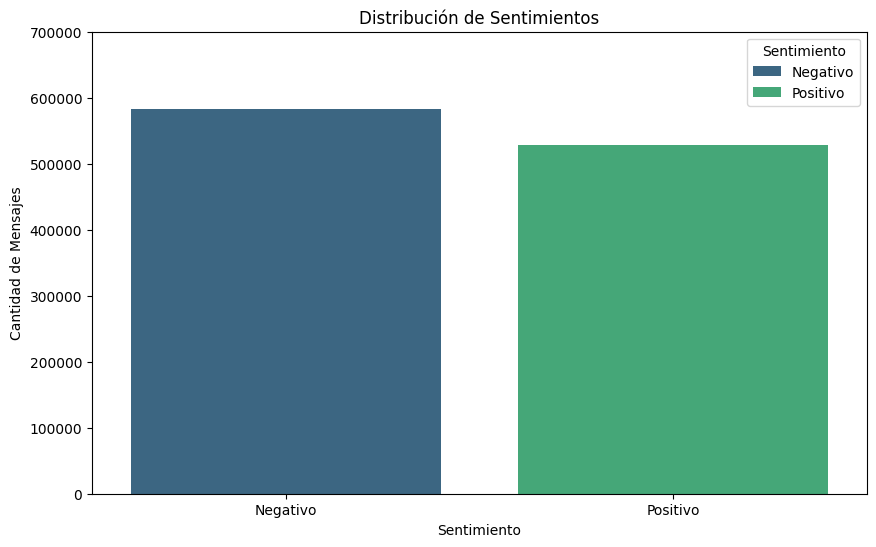

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_test, x='target', palette='viridis')
plt.legend(title='Sentimiento', labels=['Negativo', 'Positivo'])
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Mensajes')
plt.yticks(range(0, 750000, 100000))
plt.xticks([0, 1], ['Negativo', 'Positivo'])
plt.show()

* Sigue con el mismo desbalance de clases, al tener gran cantidad de data, se puedes realizar un undersampling.

# 4. FEATURE ENGINEERING

* En este apartado, nos enfocaremos en generar otras características que pueden ser relevante para nuestro análisis de sentimiento, como puede ser el conteo de palabras total, conte de palabras únicas, polaridad (sentimiento general del texto), subjetividad (cuanto de opinión o hecho tiene un texto), palabras negativas, palabras neutras y palabras positivas en el texto, emociones del texto, entre otras.

* Se considerará para la creación de variables, tanto la columna text, clean_text y la columna without_stopwords, esto debido a que algunas variables solo se pueden conseguir tanto del texto original como del clean_text. El uso del texto sin stopwords, es para ciertas varaibles, como son la subjetividad, la polaridad, y el conteo de palabras positivas, neutras y negativas, que si se analizará en el texto inicial o limpio, no nos daría un resultado preciso.

* El dataset ya esta preprocesado, eliminandose duplicados y valores nulos, ya sean los creados al generar el clean_text, como el without_stopwords.

* Un dataset bien filtrado nos permite visualizar tendencias más claras en los sentimientos, sin que estén distorsionadas por usuarios demasiado activos o contenido repetitivo. Esto hace que las conclusiones sean más sólidas y aplicables a futuros análisis o modelos de predicción.

## 4.1 CONTEO DE PALABRAS

In [ ]:
df_test['num_palabras'] = df_test['clean_text'].apply(lambda x: len(x.split()))
df_test

,target,text,clean_text,without_stopwords,num_palabras
0,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,upset cant update facebook texting might cry r...,21
1,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...,dived many times ball managed save percent res...,17
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,whole body feels itchy like fire,10
3,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,behaving im mad cant see,20
4,0,@Kwesidei not the whole crew,not the whole crew,whole crew,4
...,...,...,...,...,...
1137238,4,ReCoVeRiNg FrOm ThE lOnG wEeKeNd,recovering from the long weekend,recovering long weekend,5
1137239,4,"@Cliff_Forster Yeah, that does work better tha...",yeah that does work better than just waiting f...,yeah work better waiting end wonder time keep ...,26
1137240,4,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...,woke school best feeling ever,11
1137241,4,TheWDB.com - Very cool to hear old Walt interv...,very cool to hear old walt interviews,cool hear old walt interviews,7


In [ ]:
### Verificando que no existan filas con 0 palabras
df_test[df_test['num_palabras'] == 0]

,target,text,clean_text,without_stopwords,num_palabras


In [ ]:
df_test['num_palabras'].min(), df_test['num_palabras'].max()

(1, 36)

## 4.2 CONTEO DE PALABRAS ÚNICAS

In [ ]:
## Palabras únicas en el texto
df_test['num_palabras_unicas'] = df_test['clean_text'].apply(lambda x: len(set(x.split())))
df_test

,target,text,clean_text,without_stopwords,num_palabras,num_palabras_unicas
0,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,upset cant update facebook texting might cry r...,21,21
1,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...,dived many times ball managed save percent res...,17,16
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,whole body feels itchy like fire,10,10
3,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,behaving im mad cant see,20,18
4,0,@Kwesidei not the whole crew,not the whole crew,whole crew,4,4
...,...,...,...,...,...,...
1137238,4,ReCoVeRiNg FrOm ThE lOnG wEeKeNd,recovering from the long weekend,recovering long weekend,5,5
1137239,4,"@Cliff_Forster Yeah, that does work better tha...",yeah that does work better than just waiting f...,yeah work better waiting end wonder time keep ...,26,24
1137240,4,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...,woke school best feeling ever,11,11
1137241,4,TheWDB.com - Very cool to hear old Walt interv...,very cool to hear old walt interviews,cool hear old walt interviews,7,7


In [ ]:
df_test[df_test['num_palabras_unicas'] == 0]

,target,text,clean_text,without_stopwords,num_palabras,num_palabras_unicas


## 4.3 POLARIDAD Y SUBJETIVIDAD

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1111141 entries, 0 to 1137242
Data columns (total 6 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   target               1111141 non-null  int64 
 1   text                 1111141 non-null  object
 2   clean_text           1111141 non-null  object
 3   without_stopwords    1111141 non-null  object
 4   num_palabras         1111141 non-null  int64 
 5   num_palabras_unicas  1111141 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 59.3+ MB


* Vemos presencia de un valor nulo, validaremos en la columna without_stopwords

In [ ]:
## polaridad y subjetividad
df_test['polarity'] = df_test['without_stopwords'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
df_test['subjectivity'] = df_test['without_stopwords'].astype(str).apply(lambda x: TextBlob(x).sentiment.subjectivity)
df_test

,target,text,clean_text,without_stopwords,num_palabras,num_palabras_unicas,polarity,subjectivity
0,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,upset cant update facebook texting might cry r...,21,21,0.000,0.000
1,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...,dived many times ball managed save percent res...,17,16,0.500,0.500
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,whole body feels itchy like fire,10,10,0.200,0.400
3,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,behaving im mad cant see,20,18,-0.625,1.000
4,0,@Kwesidei not the whole crew,not the whole crew,whole crew,4,4,0.200,0.400
...,...,...,...,...,...,...,...,...
1137238,4,ReCoVeRiNg FrOm ThE lOnG wEeKeNd,recovering from the long weekend,recovering long weekend,5,5,-0.050,0.400
1137239,4,"@Cliff_Forster Yeah, that does work better tha...",yeah that does work better than just waiting f...,yeah work better waiting end wonder time keep ...,26,24,0.600,0.550
1137240,4,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...,woke school best feeling ever,11,11,1.000,0.300
1137241,4,TheWDB.com - Very cool to hear old Walt interv...,very cool to hear old walt interviews,cool hear old walt interviews,7,7,0.225,0.425


## 4.4 STOPWORDS CANTIDAD

In [ ]:
## Restando el lenght de clean_test y without_stopwords
df_test['num_stopwords'] = df_test['clean_text'].astype(str).apply(lambda x: len(x.split())) - df_test['without_stopwords'].astype(str).apply(lambda x: len(x.split()))
df_test

,target,text,clean_text,without_stopwords,num_palabras,num_palabras_unicas,polarity,subjectivity,num_stopwords
0,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,upset cant update facebook texting might cry r...,21,21,0.000,0.000,9
1,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...,dived many times ball managed save percent res...,17,16,0.500,0.500,7
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,whole body feels itchy like fire,10,10,0.200,0.400,4
3,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,behaving im mad cant see,20,18,-0.625,1.000,15
4,0,@Kwesidei not the whole crew,not the whole crew,whole crew,4,4,0.200,0.400,2
...,...,...,...,...,...,...,...,...,...
1137238,4,ReCoVeRiNg FrOm ThE lOnG wEeKeNd,recovering from the long weekend,recovering long weekend,5,5,-0.050,0.400,2
1137239,4,"@Cliff_Forster Yeah, that does work better tha...",yeah that does work better than just waiting f...,yeah work better waiting end wonder time keep ...,26,24,0.600,0.550,16
1137240,4,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...,woke school best feeling ever,11,11,1.000,0.300,6
1137241,4,TheWDB.com - Very cool to hear old Walt interv...,very cool to hear old walt interviews,cool hear old walt interviews,7,7,0.225,0.425,2


## 4.5 CANTIDAD DE PALABRAS (POSITIVAS-NEGATIVAS-NEUTRAS) DEL TEXTO

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def neg(text):
  text = str(text)
  scores = analyzer.polarity_scores(text)
  return round(scores['neg']*len(text.split()))
def neu(text):
  text = str(text)
  scores = analyzer.polarity_scores(text)
  return round(scores['neu']*len(text.split()))
def pos(text):
  text = str(text)
  scores = analyzer.polarity_scores(text)
  return round(scores['pos']*len(text.split()))

df_test['neg_words'] = df_test['without_stopwords'].apply(neg)
df_test['neu_words'] = df_test['without_stopwords'].apply(neu)
df_test['pos_words'] = df_test['without_stopwords'].apply(pos)
df_test

,target,text,clean_text,without_stopwords,num_palabras,num_palabras_unicas,polarity,subjectivity,num_stopwords,neg_words,neu_words,pos_words
0,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,upset cant update facebook texting might cry r...,21,21,0.000,0.000,9,5,7,0
1,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...,dived many times ball managed save percent res...,17,16,0.500,0.500,7,0,7,3
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,whole body feels itchy like fire,10,10,0.200,0.400,4,3,2,2
3,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,behaving im mad cant see,20,18,-0.625,1.000,15,2,3,0
4,0,@Kwesidei not the whole crew,not the whole crew,whole crew,4,4,0.200,0.400,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1137238,4,ReCoVeRiNg FrOm ThE lOnG wEeKeNd,recovering from the long weekend,recovering long weekend,5,5,-0.050,0.400,2,0,3,0
1137239,4,"@Cliff_Forster Yeah, that does work better tha...",yeah that does work better than just waiting f...,yeah work better waiting end wonder time keep ...,26,24,0.600,0.550,16,0,5,5
1137240,4,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...,woke school best feeling ever,11,11,1.000,0.300,6,0,2,3
1137241,4,TheWDB.com - Very cool to hear old Walt interv...,very cool to hear old walt interviews,cool hear old walt interviews,7,7,0.225,0.425,2,0,3,2


## 4.6 CONTEO DE EXCLAMACIÓN E INTERROGACIÓN

In [ ]:
## Contando exclamación e interrogación
df_test['num_exclamaciones'] = df_test['text'].apply(lambda x: x.count('!'))
df_test['num_interrogaciones'] = df_test['text'].apply(lambda x: x.count('?'))
df_test

,target,text,clean_text,without_stopwords,num_palabras,num_palabras_unicas,polarity,subjectivity,num_stopwords,neg_words,neu_words,pos_words,num_exclamaciones,num_interrogaciones
0,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,upset cant update facebook texting might cry r...,21,21,0.000,0.000,9,5,7,0,1,0
1,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...,dived many times ball managed save percent res...,17,16,0.500,0.500,7,0,7,3,0,0
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,whole body feels itchy like fire,10,10,0.200,0.400,4,3,2,2,0,0
3,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,behaving im mad cant see,20,18,-0.625,1.000,15,2,3,0,0,1
4,0,@Kwesidei not the whole crew,not the whole crew,whole crew,4,4,0.200,0.400,2,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137238,4,ReCoVeRiNg FrOm ThE lOnG wEeKeNd,recovering from the long weekend,recovering long weekend,5,5,-0.050,0.400,2,0,3,0,0,0
1137239,4,"@Cliff_Forster Yeah, that does work better tha...",yeah that does work better than just waiting f...,yeah work better waiting end wonder time keep ...,26,24,0.600,0.550,16,0,5,5,0,0
1137240,4,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...,woke school best feeling ever,11,11,1.000,0.300,6,0,2,3,0,0
1137241,4,TheWDB.com - Very cool to hear old Walt interv...,very cool to hear old walt interviews,cool hear old walt interviews,7,7,0.225,0.425,2,0,3,2,1,0


## 4.7 CONTEO DE SIGNOS DE PUNTUACIÓN

In [ ]:
## conteo de signos de puntuación
df_test['num_puntuacion'] = df_test['text'].apply(lambda x: len([c for c in x if c in string.punctuation]))
df_test.head(10)

,target,text,clean_text,without_stopwords,num_palabras,num_palabras_unicas,polarity,subjectivity,num_stopwords,neg_words,neu_words,pos_words,num_exclamaciones,num_interrogaciones,num_puntuacion
0,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,upset cant update facebook texting might cry r...,21,21,0.000000,0.000000,9,5,7,0,1,0,6
1,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...,dived many times ball managed save percent res...,17,16,0.500000,0.500000,7,0,7,3,0,0,3
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,whole body feels itchy like fire,10,10,0.200000,0.400000,4,3,2,2,0,0,0
3,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,behaving im mad cant see,20,18,-0.625000,1.000000,15,2,3,0,0,1,9
4,0,@Kwesidei not the whole crew,not the whole crew,whole crew,4,4,0.200000,0.400000,2,0,2,0,0,0,1
5,0,Need a hug,need a hug,need hug,3,3,0.000000,0.000000,1,0,0,2,0,0,0
6,0,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time no see yes rains a bit only a bi...,hey long time see yes rains bit bit lol im fin...,18,16,0.341667,0.450000,5,0,6,7,1,1,10
7,0,@Tatiana_K nope they didn't have it,nope they didnt have it,nope didnt,5,5,0.000000,0.000000,3,0,2,0,0,0,3
8,0,@twittera que me muera ?,que me muera,que muera,3,3,0.000000,0.000000,1,0,2,0,0,1,2
9,0,spring break in plain city... it's snowing,spring break in plain city its snowing,spring break plain city snowing,7,7,-0.214286,0.357143,2,0,5,0,0,0,4


## 4.8 CONTEO DE CAPITAL WORD DENSITY

In [ ]:
## densidad de capital word
# df_test['capital_word_density'] = df_test['text'].apply(lambda x: sum(1 for c in x if c.isupper()) / len(x.split()))
df_test['capital_word_density'] = df_test['text'].apply(lambda x: sum(1 for word in x.split() if word.isupper()) / len(x.split()) if x.split() else 0)
df_test.head(10)

,target,text,clean_text,without_stopwords,num_palabras,num_palabras_unicas,polarity,subjectivity,num_stopwords,neg_words,neu_words,pos_words,num_exclamaciones,num_interrogaciones,num_puntuacion,capital_word_density
0,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,upset cant update facebook texting might cry r...,21,21,0.000000,0.000000,9,5,7,0,1,0,6,0.000000
1,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...,dived many times ball managed save percent res...,17,16,0.500000,0.500000,7,0,7,3,0,0,3,0.055556
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,whole body feels itchy like fire,10,10,0.200000,0.400000,4,3,2,2,0,0,0,0.000000
3,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,behaving im mad cant see,20,18,-0.625000,1.000000,15,2,3,0,0,1,9,0.047619
4,0,@Kwesidei not the whole crew,not the whole crew,whole crew,4,4,0.200000,0.400000,2,0,2,0,0,0,1,0.000000
5,0,Need a hug,need a hug,need hug,3,3,0.000000,0.000000,1,0,0,2,0,0,0,0.000000
6,0,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time no see yes rains a bit only a bi...,hey long time see yes rains bit bit lol im fin...,18,16,0.341667,0.450000,5,0,6,7,1,1,10,0.045455
7,0,@Tatiana_K nope they didn't have it,nope they didnt have it,nope didnt,5,5,0.000000,0.000000,3,0,2,0,0,0,3,0.000000
8,0,@twittera que me muera ?,que me muera,que muera,3,3,0.000000,0.000000,1,0,2,0,0,1,2,0.000000
9,0,spring break in plain city... it's snowing,spring break in plain city its snowing,spring break plain city snowing,7,7,-0.214286,0.357143,2,0,5,0,0,0,4,0.000000


## 4.9 PROPORCIÓN DE PALABRAS REPETIDAS

In [ ]:
## Proporción de palabras repetidas en el texto
df_test['num_repeticiones'] = df_test['clean_text'].apply(lambda x: len([word for word in x.split() if x.split().count(word) > 1]))
df_test

,target,text,clean_text,without_stopwords,num_palabras,num_palabras_unicas,polarity,subjectivity,num_stopwords,neg_words,neu_words,pos_words,num_exclamaciones,num_interrogaciones,num_puntuacion,capital_word_density,num_repeticiones
0,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,upset cant update facebook texting might cry r...,21,21,0.000,0.000,9,5,7,0,1,0,6,0.000000,0
1,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...,dived many times ball managed save percent res...,17,16,0.500,0.500,7,0,7,3,0,0,3,0.055556,2
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,whole body feels itchy like fire,10,10,0.200,0.400,4,3,2,2,0,0,0,0.000000,0
3,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,behaving im mad cant see,20,18,-0.625,1.000,15,2,3,0,0,1,9,0.047619,4
4,0,@Kwesidei not the whole crew,not the whole crew,whole crew,4,4,0.200,0.400,2,0,2,0,0,0,1,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137238,4,ReCoVeRiNg FrOm ThE lOnG wEeKeNd,recovering from the long weekend,recovering long weekend,5,5,-0.050,0.400,2,0,3,0,0,0,0,0.000000,0
1137239,4,"@Cliff_Forster Yeah, that does work better tha...",yeah that does work better than just waiting f...,yeah work better waiting end wonder time keep ...,26,24,0.600,0.550,16,0,5,5,0,0,4,0.074074,4
1137240,4,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...,woke school best feeling ever,11,11,1.000,0.300,6,0,2,3,0,0,1,0.000000,0
1137241,4,TheWDB.com - Very cool to hear old Walt interv...,very cool to hear old walt interviews,cool hear old walt interviews,7,7,0.225,0.425,2,0,3,2,1,0,9,0.000000,0


## 4.10 SARCASMO EN EL TEXTO

* El sarcasmo es un fenómeno semántico y pragmático, por lo que perder palabras clave podría afectar la detección.
* Usaremos el texto limpio, pero con stopwords para preservar pistas lingüísticas.

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
## función para el sarcasmo
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def detect_sarcasm(text):
    sentiment = analyzer.polarity_scores(text)

    # Detecta posibles sarcasmos cuando hay un contraste entre palabras positivas y negativas
    if sentiment['neg'] > 0.4 and sentiment['pos'] > 0.2:
        return 1  # Sarcasmo detectado
    return 0  # No sarcástico

In [ ]:
df_test['sarcasmo'] = df_test['clean_text'].apply(detect_sarcasm)
df_test

,target,text,clean_text,without_stopwords,num_palabras,num_palabras_unicas,polarity,subjectivity,num_stopwords,neg_words,neu_words,pos_words,num_exclamaciones,num_interrogaciones,num_puntuacion,capital_word_density,num_repeticiones,sarcasmo
0,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,upset cant update facebook texting might cry r...,21,21,0.000,0.000,9,5,7,0,1,0,6,0.000000,0,0
1,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...,dived many times ball managed save percent res...,17,16,0.500,0.500,7,0,7,3,0,0,3,0.055556,2,0
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,whole body feels itchy like fire,10,10,0.200,0.400,4,3,2,2,0,0,0,0.000000,0,0
3,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,behaving im mad cant see,20,18,-0.625,1.000,15,2,3,0,0,1,9,0.047619,4,0
4,0,@Kwesidei not the whole crew,not the whole crew,whole crew,4,4,0.200,0.400,2,0,2,0,0,0,1,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137238,4,ReCoVeRiNg FrOm ThE lOnG wEeKeNd,recovering from the long weekend,recovering long weekend,5,5,-0.050,0.400,2,0,3,0,0,0,0,0.000000,0,0
1137239,4,"@Cliff_Forster Yeah, that does work better tha...",yeah that does work better than just waiting f...,yeah work better waiting end wonder time keep ...,26,24,0.600,0.550,16,0,5,5,0,0,4,0.074074,4,0
1137240,4,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...,woke school best feeling ever,11,11,1.000,0.300,6,0,2,3,0,0,1,0.000000,0,0
1137241,4,TheWDB.com - Very cool to hear old Walt interv...,very cool to hear old walt interviews,cool hear old walt interviews,7,7,0.225,0.425,2,0,3,2,1,0,9,0.000000,0,0


In [ ]:
df_test['sarcasmo'].value_counts()

,count
sarcasmo,
0,1107595
1,3546


## 4.11 ENTROPÍA DEL TEXTO

* La entropía mide la cantidad de información o el grado de desorden en el texto.
* Usaremos el texto limpio, pero manteniendo stopwords para capturar mejor la distribución de la información.

In [ ]:
## función para entropía
def calculate_entropy(text):
    prob = [text.count(c) / len(text) for c in set(text)]
    entropy = -sum([p * math.log(p) for p in prob])
    return entropy

In [ ]:
df_test['entropia'] = df_test['clean_text'].apply(calculate_entropy)
df_test

,target,text,clean_text,without_stopwords,num_palabras,num_palabras_unicas,polarity,subjectivity,num_stopwords,neg_words,neu_words,pos_words,num_exclamaciones,num_interrogaciones,num_puntuacion,capital_word_density,num_repeticiones,sarcasmo,entropia
0,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,upset cant update facebook texting might cry r...,21,21,0.000,0.000,9,5,7,0,1,0,6,0.000000,0,0,2.769718
1,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...,dived many times ball managed save percent res...,17,16,0.500,0.500,7,0,7,3,0,0,3,0.055556,2,0,2.741038
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,whole body feels itchy like fire,10,10,0.200,0.400,4,3,2,2,0,0,0,0.000000,0,0,2.707497
3,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,behaving im mad cant see,20,18,-0.625,1.000,15,2,3,0,0,1,9,0.047619,4,0,2.669712
4,0,@Kwesidei not the whole crew,not the whole crew,whole crew,4,4,0.200,0.400,2,0,2,0,0,0,1,0.000000,0,0,2.216102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137238,4,ReCoVeRiNg FrOm ThE lOnG wEeKeNd,recovering from the long weekend,recovering long weekend,5,5,-0.050,0.400,2,0,3,0,0,0,0,0.000000,0,0,2.604188
1137239,4,"@Cliff_Forster Yeah, that does work better tha...",yeah that does work better than just waiting f...,yeah work better waiting end wonder time keep ...,26,24,0.600,0.550,16,0,5,5,0,0,4,0.074074,4,0,2.736297
1137240,4,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...,woke school best feeling ever,11,11,1.000,0.300,6,0,2,3,0,0,1,0.000000,0,0,2.758130
1137241,4,TheWDB.com - Very cool to hear old Walt interv...,very cool to hear old walt interviews,cool hear old walt interviews,7,7,0.225,0.425,2,0,3,2,1,0,9,0.000000,0,0,2.603523


In [ ]:
df_test['entropia'].value_counts()

,count
entropia,
2.211069,761
2.303488,741
2.253858,709
2.306669,696
2.145842,679
...,...
2.428365,1
2.810963,1
2.831955,1


# 5. ANÁLISIS EXPLORATORIO DE DATOS

In [ ]:
df_test.describe()

,target,num_palabras,num_palabras_unicas,polarity,subjectivity,num_stopwords,neg_words,neu_words,pos_words,num_exclamaciones,num_interrogaciones,num_puntuacion,capital_word_density,num_repeticiones,sarcasmo,entropia
count,1.111141e+06,1.111141e+06,1.111141e+06,1.111141e+06,1.111141e+06,1.111141e+06,1.111141e+06,1.111141e+06,1.111141e+06,1.111141e+06,1.111141e+06,1.111141e+06,1.111141e+06,1.111141e+06,1.111141e+06,1.111141e+06
mean,1.902300e+00,1.287999e+01,1.218134e+01,8.433136e-02,3.911633e-01,5.424553e+00,8.974829e-01,4.881371e+00,1.678902e+00,5.777782e-01,1.444425e-01,3.988987e+00,4.458755e-02,1.317017e+00,3.191314e-03,2.618906e+00
std,1.997613e+00,6.593981e+00,5.947581e+00,3.348614e-01,3.449018e-01,3.565206e+00,1.371353e+00,3.092007e+00,1.891695e+00,1.357070e+00,8.345887e-01,3.402068e+00,9.842755e-02,2.083672e+00,5.640153e-02,1.840415e-01
min,0.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00
25%,0.000000e+00,7.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.545413e+00
50%,0.000000e+00,1.200000e+01,1.100000e+01,0.000000e+00,4.000000e-01,5.000000e+00,0.000000e+00,4.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.662001e+00
75%,4.000000e+00,1.800000e+01,1.700000e+01,2.531250e-01,6.666667e-01,8.000000e+00,2.000000e+00,7.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,6.000000e+00,6.666667e-02,2.000000e+00,0.000000e+00,2.739902e+00
max,4.000000e+00,3.600000e+01,3.100000e+01,1.000000e+00,1.000000e+00,2.600000e+01,2.700000e+01,2.900000e+01,1.500000e+01,1.110000e+02,1.100000e+02,1.190000e+02,1.000000e+00,3.000000e+01,1.000000e+00,3.133009e+00


In [ ]:
df_test.describe().columns

Index(['target', 'num_palabras', 'num_palabras_unicas', 'polarity',
       'subjectivity', 'num_stopwords', 'neg_words', 'neu_words', 'pos_words',
       'num_exclamaciones', 'num_interrogaciones', 'num_puntuacion',
       'capital_word_density', 'num_repeticiones', 'sarcasmo', 'entropia'],
      dtype='object')

## 5.1 BOXPLOT VARIABLES NUMÉRICAS

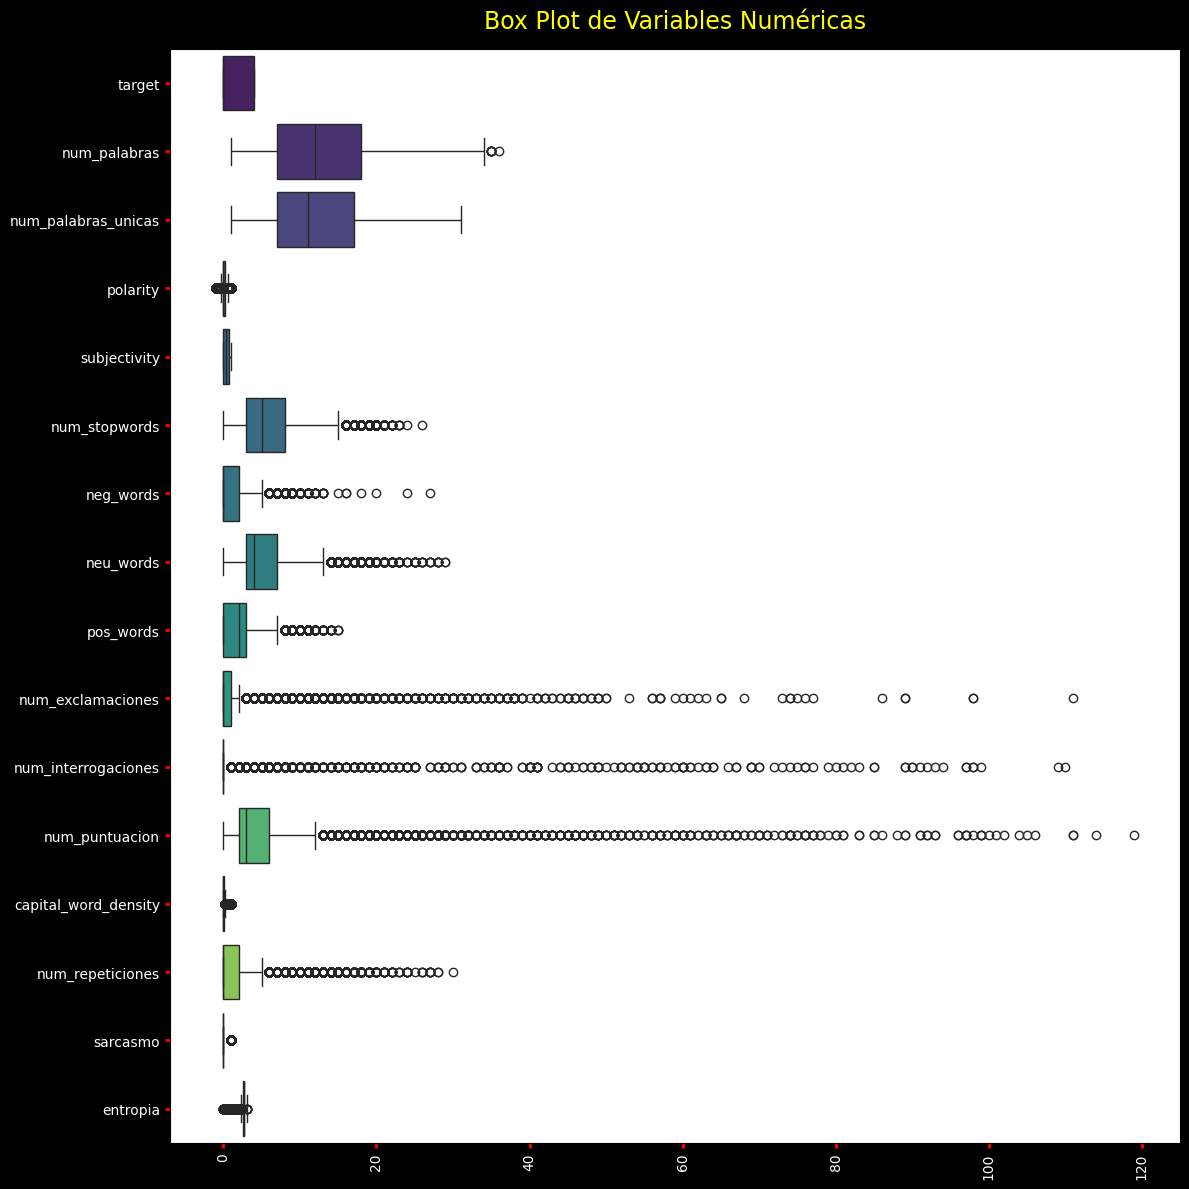

In [ ]:
## graficando box plot para todas las variables - Analizando outliers
plt.figure(figsize=(12, 12))
sns.boxplot(data=df_test, palette='viridis', orient='h')
plt.title('Box Plot de Variables Numéricas', pad=15, fontdict={'fontsize': 17, 'color':'yellow', 'fontweight': 'normal'})
plt.xticks(rotation=90)
# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('black')

# Cambiar el color de las etiquetas en el eje x - y
plt.tick_params(axis='x', labelcolor='white', width=2, colors='r', grid_color='r',grid_alpha=0.2)
plt.tick_params(axis='y', labelcolor='white', width=2, colors='r', grid_color='r',grid_alpha=0.2)

plt.tight_layout()
plt.show()

* Vemos que hay variables, que tienen varios outliers.
* Por ejemplo, no es posible que un texto tenga más de 80 num_interrogaciones, o más de 80 exclamaciones o num_puntuaciones, como dar ejemplos. Incluso, tienen más signos que numero de palabras máxima.
* Tenemos que observar que sucede en estos textos, porque hay algunos que tienen varias variables en exceso. Evaluar el descarte, el truncamiento de outliers.

### 5.1.1 VERIFICANDO LAS VARIABLES EN EL DATASET, PARA OBSERVAR DETALLES

#### 5.1.1.1 num_interrogaciones

In [ ]:
df_test[df_test['num_interrogaciones'] > 50]

,target,text,clean_text,without_stopwords,num_palabras,num_palabras_unicas,polarity,subjectivity,num_stopwords,neg_words,neu_words,pos_words,num_exclamaciones,num_interrogaciones,num_puntuacion,capital_word_density,num_repeticiones,sarcasmo,entropia
2274,0,?????? ? ?? ???? ???????? ???? ???? ??????????...,there was a problem with your picture,problem picture,7,7,0.00000,0.00000,5,1,1,0,0,54,55,0.000000,0,0,2.669274
77428,0,"@chathuraw Yeah, but...expensive like hell'ne ...",yeah butexpensive like hellne vga,yeah butexpensive like hellne vga,5,5,0.00000,0.00000,0,0,2,3,1,66,74,0.045455,0,0,2.605785
126619,0,"@Attention_Cheri ??, ???????... ? ???? ?? ????...",cdnlastfm,cdnlastfm,1,1,0.00000,0.00000,0,0,1,0,0,55,65,0.000000,0,0,2.197225
126930,0,???????? ? Apple Support ????? ?????? ?? ?????...,apple support,apple support,2,2,0.00000,0.00000,0,0,1,1,1,70,74,0.000000,0,0,2.138397
129235,0,OMFG ??????? ?????? hardcore day ??? ??? ????...,omfg hardcore day not nice,omfg hardcore day nice,5,5,0.60000,1.00000,1,0,2,2,0,77,81,0.052632,0,0,2.598143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875020,4,@Njordy ??????????? ??? ???????? ? fb2 ??? txt...,fb txt,fb txt,2,2,0.00000,0.00000,0,0,2,0,0,81,85,0.000000,0,0,1.560710
875164,4,@wddd ?????? ??? ????? ??? ?? ???????? ????? ?...,nokia apple lg,nokia apple lg,3,3,0.00000,0.00000,0,0,3,0,0,97,99,0.043478,0,0,2.242973
875296,4,"??????? ?????? pumping, ???? ??????? ? ??????,...",pumping,pumping,1,1,0.00000,0.00000,0,0,1,0,0,64,67,0.000000,0,0,1.747868
876867,4,"??? ?? ??????? ?? ?????? ?????????? ????????, ...",rpodru,rpodru,1,1,0.00000,0.00000,0,0,1,0,0,90,98,0.000000,0,0,1.560710


In [ ]:
df_test[df_test['num_interrogaciones'] < 10]

,target,text,clean_text,without_stopwords,num_palabras,num_palabras_unicas,polarity,subjectivity,num_stopwords,neg_words,neu_words,pos_words,num_exclamaciones,num_interrogaciones,num_puntuacion,capital_word_density,num_repeticiones,sarcasmo,entropia
0,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,upset cant update facebook texting might cry r...,21,21,0.000,0.000,9,5,7,0,1,0,6,0.000000,0,0,2.769718
1,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...,dived many times ball managed save percent res...,17,16,0.500,0.500,7,0,7,3,0,0,3,0.055556,2,0,2.741038
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,whole body feels itchy like fire,10,10,0.200,0.400,4,3,2,2,0,0,0,0.000000,0,0,2.707497
3,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,behaving im mad cant see,20,18,-0.625,1.000,15,2,3,0,0,1,9,0.047619,4,0,2.669712
4,0,@Kwesidei not the whole crew,not the whole crew,whole crew,4,4,0.200,0.400,2,0,2,0,0,0,1,0.000000,0,0,2.216102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137238,4,ReCoVeRiNg FrOm ThE lOnG wEeKeNd,recovering from the long weekend,recovering long weekend,5,5,-0.050,0.400,2,0,3,0,0,0,0,0.000000,0,0,2.604188
1137239,4,"@Cliff_Forster Yeah, that does work better tha...",yeah that does work better than just waiting f...,yeah work better waiting end wonder time keep ...,26,24,0.600,0.550,16,0,5,5,0,0,4,0.074074,4,0,2.736297
1137240,4,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...,woke school best feeling ever,11,11,1.000,0.300,6,0,2,3,0,0,1,0.000000,0,0,2.758130
1137241,4,TheWDB.com - Very cool to hear old Walt interv...,very cool to hear old walt interviews,cool hear old walt interviews,7,7,0.225,0.425,2,0,3,2,1,0,9,0.000000,0,0,2.603523


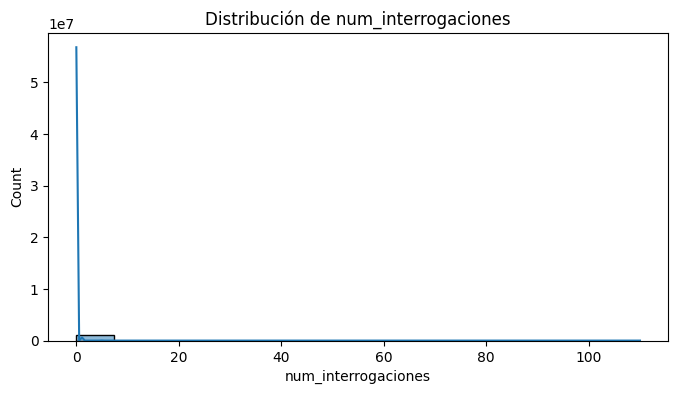

In [ ]:
## graficando histograma de num_interrogaciones
plt.figure(figsize=(8, 4))
sns.histplot(df_test['num_interrogaciones'], bins=15, kde=True)
plt.title('Distribución de num_interrogaciones')
plt.show()

In [ ]:
## validando el conteo con value_counts
df_test['num_interrogaciones'].value_counts().head(15)

,count
num_interrogaciones,
0,1000346
1,85642
2,16402
3,5337
4,1707
5,622
6,323
7,141
8,103


* Notamos que la gran mayoria de tweets no tienen signos de interrogación.
* Observamos que hay tweets que tienen más de un signo de interrogación, incluso algunos con más de 4 signos de interrogación. Lo cual nos genera otra pregunta, porque hay tantos signos de interrogación en un mismo tweet.
* Según vemos en el dataframe, observamos que los signos de interrogación se repiten muchas veces, pero no aportarían valor alguno, más que nada en el énfasis.
* Dado todo esto, consideramos binarizar nuestra variable, donde consideraremos 0 y 1, para cuando no se tiene y se tiene interrogación respectivamente.
* De todas maneras queda pendiente analizar la variable, ya que hay una gran mayoria que no tiene signo de interrogación. Verificar la relevancia de esta variable en nuestra matriz de correlación.

In [ ]:
## Binarizando la variable num_interrogaciones
df_test['num_interrogaciones'] = df_test['num_interrogaciones'].apply(lambda x: 0 if x == 0 else 1)
df_test

,target,text,clean_text,without_stopwords,num_palabras,num_palabras_unicas,polarity,subjectivity,num_stopwords,neg_words,neu_words,pos_words,num_exclamaciones,num_interrogaciones,num_puntuacion,capital_word_density,num_repeticiones,sarcasmo,entropia
0,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,upset cant update facebook texting might cry r...,21,21,0.000,0.000,9,5,7,0,1,0,6,0.000000,0,0,2.769718
1,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...,dived many times ball managed save percent res...,17,16,0.500,0.500,7,0,7,3,0,0,3,0.055556,2,0,2.741038
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,whole body feels itchy like fire,10,10,0.200,0.400,4,3,2,2,0,0,0,0.000000,0,0,2.707497
3,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,behaving im mad cant see,20,18,-0.625,1.000,15,2,3,0,0,1,9,0.047619,4,0,2.669712
4,0,@Kwesidei not the whole crew,not the whole crew,whole crew,4,4,0.200,0.400,2,0,2,0,0,0,1,0.000000,0,0,2.216102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137238,4,ReCoVeRiNg FrOm ThE lOnG wEeKeNd,recovering from the long weekend,recovering long weekend,5,5,-0.050,0.400,2,0,3,0,0,0,0,0.000000,0,0,2.604188
1137239,4,"@Cliff_Forster Yeah, that does work better tha...",yeah that does work better than just waiting f...,yeah work better waiting end wonder time keep ...,26,24,0.600,0.550,16,0,5,5,0,0,4,0.074074,4,0,2.736297
1137240,4,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...,woke school best feeling ever,11,11,1.000,0.300,6,0,2,3,0,0,1,0.000000,0,0,2.758130
1137241,4,TheWDB.com - Very cool to hear old Walt interv...,very cool to hear old walt interviews,cool hear old walt interviews,7,7,0.225,0.425,2,0,3,2,1,0,9,0.000000,0,0,2.603523


#### 5.1.1.2 num_exclamaciones

In [ ]:
df_test[df_test['num_exclamaciones'] > 50]

,target,text,clean_text,without_stopwords,num_palabras,num_palabras_unicas,polarity,subjectivity,num_stopwords,neg_words,neu_words,pos_words,num_exclamaciones,num_interrogaciones,num_puntuacion,capital_word_density,num_repeticiones,sarcasmo,entropia
46452,0,I gotta start painting my room 2day NOOOOOOOO...,i gotta start painting my room day nooooooooooooo,gotta start painting room day nooooooooooooo,8,8,0.000000,0.000000,2,0,6,0,86,0,86,0.250000,0,0,2.183412
47267,0,NICK BRAUN'S TWITTER IS BEING BLOCKED!!!!!! I...,nick brauns twitter is being blocked i love hi...,nick brauns twitter blocked love sucks,11,11,0.100000,0.450000,5,2,2,2,77,0,78,1.000000,0,0,2.751829
55754,0,This exhibitition is hard!!!!!!!!!!!!!!!!!!!!...,this exhibitition is hard,exhibitition hard,4,4,-0.291667,0.541667,2,1,1,0,111,0,111,0.000000,0,0,2.337901
96542,0,@alexarb me too !!!!! !! salgamossss prontoo...,me too salgamossss prontoooo,salgamossss prontoooo,4,4,0.000000,0.000000,2,0,2,0,65,0,66,0.000000,0,0,2.184439
147372,0,WHAHHH!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! NO...,whahhh noo,whahhh noo,2,2,0.000000,0.000000,0,0,2,0,76,0,76,1.000000,0,0,1.609438
152146,0,I have MAJOR CRAMPLES!!!!!!!!!!!!!!!!!!!!!!!!!...,i have major cramples,major cramples,4,4,0.062500,0.500000,2,0,2,0,59,0,59,0.750000,0,0,2.532591
189735,0,OWE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,owei just fell off da chair,owei fell da chair,6,6,0.000000,0.000000,2,0,4,0,57,0,57,1.000000,0,0,2.619004
205322,0,listnenin to some shit music lol and also on ...,listnenin to some shit music lol and also on f...,listnenin shit music lol also facebook,10,10,0.300000,0.750000,4,2,2,2,68,0,68,0.000000,0,0,2.588382
310484,0,@alcineyabut are we still on even with the rai...,are we still on even with the rain im so excited,still even rain im excited,11,11,0.375000,0.750000,6,0,3,2,56,1,59,0.000000,0,0,2.553712
317637,0,watching the numbers go down as im typing!!!!!...,watching the numbers go down as im typing i ra...,watching numbers go im typing ran numbers,13,12,0.000000,0.000000,6,0,7,0,75,0,75,0.000000,2,0,2.765284


In [ ]:
df_test[df_test['num_exclamaciones'] < 5]

,target,text,clean_text,without_stopwords,num_palabras,num_palabras_unicas,polarity,subjectivity,num_stopwords,neg_words,neu_words,pos_words,num_exclamaciones,num_interrogaciones,num_puntuacion,capital_word_density,num_repeticiones,sarcasmo,entropia
0,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,upset cant update facebook texting might cry r...,21,21,0.000,0.000,9,5,7,0,1,0,6,0.000000,0,0,2.769718
1,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...,dived many times ball managed save percent res...,17,16,0.500,0.500,7,0,7,3,0,0,3,0.055556,2,0,2.741038
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,whole body feels itchy like fire,10,10,0.200,0.400,4,3,2,2,0,0,0,0.000000,0,0,2.707497
3,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,behaving im mad cant see,20,18,-0.625,1.000,15,2,3,0,0,1,9,0.047619,4,0,2.669712
4,0,@Kwesidei not the whole crew,not the whole crew,whole crew,4,4,0.200,0.400,2,0,2,0,0,0,1,0.000000,0,0,2.216102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137238,4,ReCoVeRiNg FrOm ThE lOnG wEeKeNd,recovering from the long weekend,recovering long weekend,5,5,-0.050,0.400,2,0,3,0,0,0,0,0.000000,0,0,2.604188
1137239,4,"@Cliff_Forster Yeah, that does work better tha...",yeah that does work better than just waiting f...,yeah work better waiting end wonder time keep ...,26,24,0.600,0.550,16,0,5,5,0,0,4,0.074074,4,0,2.736297
1137240,4,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...,woke school best feeling ever,11,11,1.000,0.300,6,0,2,3,0,0,1,0.000000,0,0,2.758130
1137241,4,TheWDB.com - Very cool to hear old Walt interv...,very cool to hear old walt interviews,cool hear old walt interviews,7,7,0.225,0.425,2,0,3,2,1,0,9,0.000000,0,0,2.603523


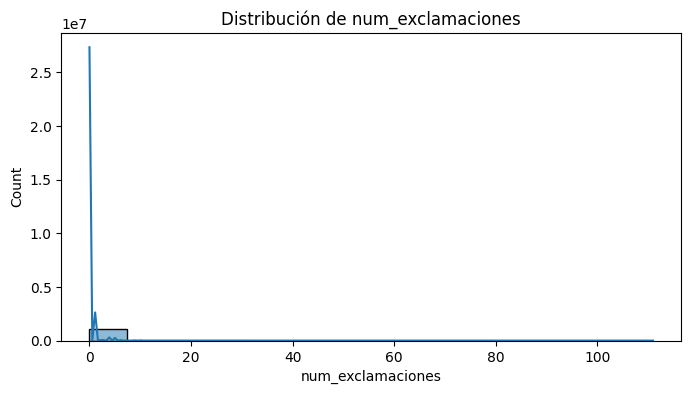

In [ ]:
## histograma
plt.figure(figsize=(8, 4))
sns.histplot(df_test['num_exclamaciones'], bins=15, kde=True)
plt.title('Distribución de num_exclamaciones')
plt.show()

In [ ]:
## conteo con value_counts
df_test['num_exclamaciones'].value_counts().head(15)

,count
num_exclamaciones,
0,776571
1,192595
2,72154
3,34872
4,16057
5,7265
6,4427
7,2340
8,1459


* Sucede muy parecido a la variable num_interrogaciones. Existe varios tweets con grandes cantidades de exclamaciones, esto puede deberse a repeticiones por énfasis.
* De la misma manera, consideramos binarizar la variable a fin de saber si existe o no exclamación en el tweet respectivo.

In [ ]:
## Binarizando
df_test['num_exclamaciones'] = df_test['num_exclamaciones'].apply(lambda x: 0 if x == 0 else 1)
df_test

,target,text,clean_text,without_stopwords,num_palabras,num_palabras_unicas,polarity,subjectivity,num_stopwords,neg_words,neu_words,pos_words,num_exclamaciones,num_interrogaciones,num_puntuacion,capital_word_density,num_repeticiones,sarcasmo,entropia
0,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,upset cant update facebook texting might cry r...,21,21,0.000,0.000,9,5,7,0,1,0,6,0.000000,0,0,2.769718
1,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...,dived many times ball managed save percent res...,17,16,0.500,0.500,7,0,7,3,0,0,3,0.055556,2,0,2.741038
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,whole body feels itchy like fire,10,10,0.200,0.400,4,3,2,2,0,0,0,0.000000,0,0,2.707497
3,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,behaving im mad cant see,20,18,-0.625,1.000,15,2,3,0,0,1,9,0.047619,4,0,2.669712
4,0,@Kwesidei not the whole crew,not the whole crew,whole crew,4,4,0.200,0.400,2,0,2,0,0,0,1,0.000000,0,0,2.216102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137238,4,ReCoVeRiNg FrOm ThE lOnG wEeKeNd,recovering from the long weekend,recovering long weekend,5,5,-0.050,0.400,2,0,3,0,0,0,0,0.000000,0,0,2.604188
1137239,4,"@Cliff_Forster Yeah, that does work better tha...",yeah that does work better than just waiting f...,yeah work better waiting end wonder time keep ...,26,24,0.600,0.550,16,0,5,5,0,0,4,0.074074,4,0,2.736297
1137240,4,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...,woke school best feeling ever,11,11,1.000,0.300,6,0,2,3,0,0,1,0.000000,0,0,2.758130
1137241,4,TheWDB.com - Very cool to hear old Walt interv...,very cool to hear old walt interviews,cool hear old walt interviews,7,7,0.225,0.425,2,0,3,2,1,0,9,0.000000,0,0,2.603523


#### 5.1.1.3 num_puntuación

In [ ]:
df_test[df_test['num_puntuacion'] > 50]

,target,text,clean_text,without_stopwords,num_palabras,num_palabras_unicas,polarity,subjectivity,num_stopwords,neg_words,neu_words,pos_words,num_exclamaciones,num_interrogaciones,num_puntuacion,capital_word_density,num_repeticiones,sarcasmo,entropia
2274,0,?????? ? ?? ???? ???????? ???? ???? ??????????...,there was a problem with your picture,problem picture,7,7,0.000000,0.000000,5,1,1,0,0,1,55,0.000000,0,0,2.669274
3385,0,@danielhcwong Taylor 814ce --&gt; #&amp;$(#&am...,taylor ce gt ampamp sweet mother of my livie i...,taylor ce gt ampamp sweet mother livie,11,11,0.350000,0.650000,4,0,3,4,1,0,73,0.000000,0,0,2.700267
46452,0,I gotta start painting my room 2day NOOOOOOOO...,i gotta start painting my room day nooooooooooooo,gotta start painting room day nooooooooooooo,8,8,0.000000,0.000000,2,0,6,0,1,0,86,0.250000,0,0,2.183412
47267,0,NICK BRAUN'S TWITTER IS BEING BLOCKED!!!!!! I...,nick brauns twitter is being blocked i love hi...,nick brauns twitter blocked love sucks,11,11,0.100000,0.450000,5,2,2,2,1,0,78,1.000000,0,0,2.751829
53520,0,@devyra jajaja i already read that!!!!!!!!!!!!...,jajaja i already read that jajajajajaim sorry ...,jajaja already read jajajajajaim sorry memory ...,14,13,-0.650000,0.950000,6,4,4,0,1,0,56,0.000000,2,0,2.459559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061637,4,@tommcfly TOM!! wow i think i got a bit over e...,tom wow i think i got a bit over excited then ...,tom wow think got bit excited erm hi xxxxx,14,13,0.237500,0.875000,5,0,5,4,1,0,70,0.066667,2,0,2.542695
1073440,4,"Ok ready,.... I got one word of wisdom for you...",ok ready i got one word of wisdom for youyou r...,ok ready got one word wisdom youyou ready lakers,12,11,0.300000,0.500000,3,0,3,6,1,1,59,0.166667,2,0,2.596592
1089275,4,Today the end of the school!!!!!!!!!!!!!!!!!!!...,today the end of the school i am sooooo excited,today end school sooooo excited,10,9,0.375000,0.750000,5,0,3,2,1,0,74,0.100000,2,0,2.461227
1110337,4,omggggggggggg!!! ............................i...,omggggggggggg i have to tell u all somethingim...,omggggggggggg tell u somethingim bored haha lo...,12,12,0.166667,0.666667,4,1,3,4,1,0,74,0.000000,0,0,2.492685


* En esta variable, sucede algo en particular, este número de puntuación, siempre tiende a ser muy grande, debido a las repeticiones que se pueden dar.
* Estamos considerando aplicar una función para establecer las puntuaciones en un conjunto, de esta manera no vamos a contar repeticiones.
* COnsideramos que esta sería la mejor manera de dar valor a esta variable.

In [ ]:
## Considerando contar num_puntuaciones pero con set
df_test['num_puntuacion'] = df_test['text'].apply(lambda x: len(set([c for c in x if c in string.punctuation])))
df_test

,target,text,clean_text,without_stopwords,num_palabras,num_palabras_unicas,polarity,subjectivity,num_stopwords,neg_words,neu_words,pos_words,num_exclamaciones,num_interrogaciones,num_puntuacion,capital_word_density,num_repeticiones,sarcasmo,entropia
0,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,upset cant update facebook texting might cry r...,21,21,0.000,0.000,9,5,7,0,1,0,3,0.000000,0,0,2.769718
1,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...,dived many times ball managed save percent res...,17,16,0.500,0.500,7,0,7,3,0,0,3,0.055556,2,0,2.741038
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,whole body feels itchy like fire,10,10,0.200,0.400,4,3,2,2,0,0,0,0.000000,0,0,2.707497
3,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,behaving im mad cant see,20,18,-0.625,1.000,15,2,3,0,0,1,5,0.047619,4,0,2.669712
4,0,@Kwesidei not the whole crew,not the whole crew,whole crew,4,4,0.200,0.400,2,0,2,0,0,0,1,0.000000,0,0,2.216102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137238,4,ReCoVeRiNg FrOm ThE lOnG wEeKeNd,recovering from the long weekend,recovering long weekend,5,5,-0.050,0.400,2,0,3,0,0,0,0,0.000000,0,0,2.604188
1137239,4,"@Cliff_Forster Yeah, that does work better tha...",yeah that does work better than just waiting f...,yeah work better waiting end wonder time keep ...,26,24,0.600,0.550,16,0,5,5,0,0,4,0.074074,4,0,2.736297
1137240,4,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...,woke school best feeling ever,11,11,1.000,0.300,6,0,2,3,0,0,1,0.000000,0,0,2.758130
1137241,4,TheWDB.com - Very cool to hear old Walt interv...,very cool to hear old walt interviews,cool hear old walt interviews,7,7,0.225,0.425,2,0,3,2,1,0,6,0.000000,0,0,2.603523


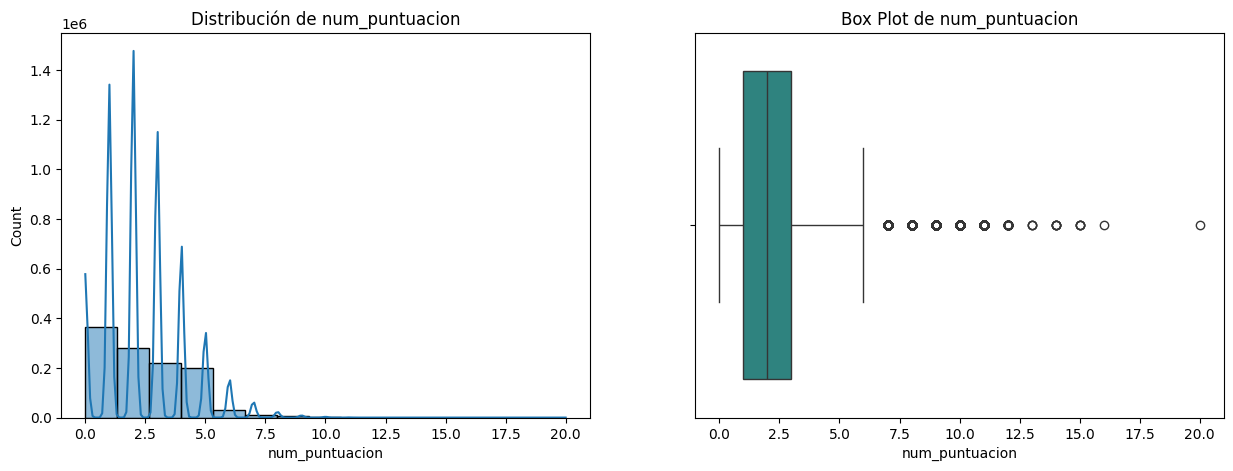

In [ ]:
## validando el histograma e boxplot (subplots)
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_test['num_puntuacion'], bins=15, kde=True)
plt.title('Distribución de num_puntuacion')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_test, x='num_puntuacion', palette='viridis')
plt.title('Box Plot de num_puntuacion')
plt.show()

* Observamos que seguimos teniendo outliers. Entendemos que esto se genera porque estamos considerando signos de puntuación como @ o # o o (), entre otros, los cuales quizás para nuestro análisis no son tan escenciales como si lo puede ser el . o ; o ?¡.
* Debido a esto validaremos cuantos tweets tienen más de 5 signos de puntuación, y los truncaremos.

In [ ]:
## verificando los num_puntuación
df_test[df_test['num_puntuacion'] > 5]

,target,text,clean_text,without_stopwords,num_palabras,num_palabras_unicas,polarity,subjectivity,num_stopwords,neg_words,neu_words,pos_words,num_exclamaciones,num_interrogaciones,num_puntuacion,capital_word_density,num_repeticiones,sarcasmo,entropia
6,0,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time no see yes rains a bit only a bi...,hey long time see yes rains bit bit lol im fin...,18,16,0.341667,0.450000,5,0,6,7,1,1,6,0.045455,4,0,2.617979
36,0,@MissXu sorry! bed time came here (GMT+1) ht...,sorry bed time came here gmt,sorry bed time came gmt,6,6,-0.500000,1.000000,1,1,4,0,1,0,8,0.125000,0,0,2.472478
73,0,Why won't you show my location?! http://twit...,why wont you show my location,wont show location,6,6,0.000000,0.000000,3,0,3,0,1,1,6,0.000000,0,0,2.441608
75,0,@ashleyac My donkey is sensitive about such co...,my donkey is sensitive about such comments nev...,donkey sensitive comments nevertheless hed med...,22,21,0.300000,0.950000,9,2,9,2,0,0,6,0.000000,2,0,2.805323
87,0,"@januarycrimson Sorry, babe!! My fam annoys m...",sorry babe my fam annoys me too thankfully the...,sorry babe fam annoys thankfully theyre asleep...,15,15,-0.228571,0.658929,4,4,3,3,1,0,6,0.000000,0,0,2.800853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137231,4,Another Commenting Contest! [;: Yay!!! http:/...,another commenting contest yay,another commenting contest yay,4,4,0.000000,0.000000,0,0,2,2,1,0,6,0.000000,0,0,2.517096
1137234,4,You heard it here first -- We're having a girl...,you heard it here first were having a girl hop...,heard first girl hope looks wendys brains kidd...,19,18,0.250000,0.333333,10,0,6,3,0,0,6,0.000000,2,0,2.790679
1137235,4,"if ur the lead singer in a band, beware fallin...",if ur the lead singer in a band beware falling...,ur lead singer band beware falling prey lsd qu...,16,15,0.000000,0.000000,5,2,9,0,0,1,8,0.052632,2,0,2.735207
1137237,4,@Roy_Everitt ha- good job. that's right - we g...,ha good job thats right we gotta throw that ta...,ha good job thats right gotta throw tag everyw...,19,18,0.492857,0.567857,6,0,9,4,1,0,7,0.136364,2,0,2.569005


In [ ]:
## verificando el limite superior para truncamiento
df_test['num_puntuacion'].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,num_puntuacion
count,1.111141e+06
mean,2.392688e+00
std,1.626792e+00
min,0.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,3.000000e+00
90%,5.000000e+00
95%,5.000000e+00
99%,7.000000e+00


* Observamos que el percentil 95 de la variable num_puntuacion es 5. Si limitamos los valores superiores a este umbral, estaríamos manteniendo un margen representativo de los datos.

In [ ]:
## CAPANDO
df_test['num_puntuacion'] = df_test['num_puntuacion'].apply(lambda x: 5 if x > 5 else x)
df_test

,target,text,clean_text,without_stopwords,num_palabras,num_palabras_unicas,polarity,subjectivity,num_stopwords,neg_words,neu_words,pos_words,num_exclamaciones,num_interrogaciones,num_puntuacion,capital_word_density,num_repeticiones,sarcasmo,entropia
0,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,upset cant update facebook texting might cry r...,21,21,0.000,0.000,9,5,7,0,1,0,3,0.000000,0,0,2.769718
1,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...,dived many times ball managed save percent res...,17,16,0.500,0.500,7,0,7,3,0,0,3,0.055556,2,0,2.741038
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,whole body feels itchy like fire,10,10,0.200,0.400,4,3,2,2,0,0,0,0.000000,0,0,2.707497
3,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,behaving im mad cant see,20,18,-0.625,1.000,15,2,3,0,0,1,5,0.047619,4,0,2.669712
4,0,@Kwesidei not the whole crew,not the whole crew,whole crew,4,4,0.200,0.400,2,0,2,0,0,0,1,0.000000,0,0,2.216102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137238,4,ReCoVeRiNg FrOm ThE lOnG wEeKeNd,recovering from the long weekend,recovering long weekend,5,5,-0.050,0.400,2,0,3,0,0,0,0,0.000000,0,0,2.604188
1137239,4,"@Cliff_Forster Yeah, that does work better tha...",yeah that does work better than just waiting f...,yeah work better waiting end wonder time keep ...,26,24,0.600,0.550,16,0,5,5,0,0,4,0.074074,4,0,2.736297
1137240,4,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...,woke school best feeling ever,11,11,1.000,0.300,6,0,2,3,0,0,1,0.000000,0,0,2.758130
1137241,4,TheWDB.com - Very cool to hear old Walt interv...,very cool to hear old walt interviews,cool hear old walt interviews,7,7,0.225,0.425,2,0,3,2,1,0,5,0.000000,0,0,2.603523


#### 5.1.1.4 capital_word_density

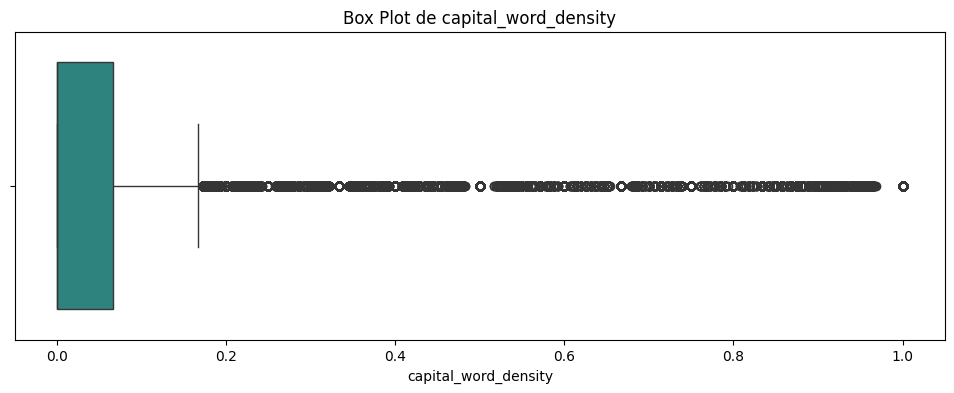

In [ ]:
## boxplot
plt.figure(figsize=(12, 4))
sns.boxplot(data=df_test, x='capital_word_density', palette='viridis')
plt.title('Box Plot de capital_word_density')
plt.show()

In [ ]:
## analizando percentiles superiores
df_test['capital_word_density'].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,capital_word_density
count,1.111141e+06
mean,4.458755e-02
std,9.842755e-02
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,6.666667e-02
90%,1.250000e-01
95%,1.818182e-01
99%,4.444444e-01


In [ ]:
df_test[df_test['capital_word_density'] > 0.4]

,target,text,clean_text,without_stopwords,num_palabras,num_palabras_unicas,polarity,subjectivity,num_stopwords,neg_words,neu_words,pos_words,num_exclamaciones,num_interrogaciones,num_puntuacion,capital_word_density,num_repeticiones,sarcasmo,entropia
82,0,Damn... I don't have any chalk! MY CHALKBOARD ...,damn i dont have any chalk my chalkboard is us...,damn dont chalk chalkboard useless,10,10,-0.500000,0.200000,5,2,2,1,1,0,3,0.500000,0,0,2.738341
94,0,"so rylee,grace...wana go steve's party or not?...",so ryleegracewana go steves party or not sadly...,ryleegracewana go steves party sadly since eas...,20,20,0.066667,0.608333,7,2,7,4,0,1,4,0.619048,0,0,2.746920
222,0,SHOOTING OUTSIDE MY HOUSE :O NOT KIDDING! So S...,shooting outside my house o not kidding so scared,shooting outside house kidding scared,9,9,0.000000,0.050000,4,2,2,1,1,0,2,0.888889,0,0,2.597109
357,0,DANG!!! ANOTHER SPRING BREAK!!! HOW COOL IS T...,dang another spring break how cool is that too...,dang another spring break cool bad work week o...,25,25,-0.175000,0.658333,11,3,8,3,1,1,4,0.960000,0,0,2.745684
389,0,@bananaface IM SORRY I GOT YOU SICK. lol. goi...,im sorry i got you sick lol going to bed too n...,im sorry got sick lol going bed night,12,12,-0.138095,0.852381,4,3,3,2,1,0,3,0.538462,0,0,2.530395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136417,4,@RANRU YES LADII BREE IS RANRU'S SISTER FROM A...,yes ladii bree is ranrus sister from another m...,yes ladii bree ranrus sister another mother,9,9,0.000000,0.000000,2,0,5,2,0,0,2,1.000000,0,0,2.585821
1136545,4,GOT LVATT LOVING AND GRAD TODAY,got lvatt loving and grad today,got lvatt loving grad today,6,6,0.600000,0.950000,1,0,3,2,0,0,0,1.000000,0,0,2.363538
1136825,4,@ChuckItMonday HELLYEAH!,hellyeah,hellyeah,1,1,0.000000,0.000000,0,0,1,0,1,0,2,0.500000,0,0,1.559581
1137087,4,WE GET TO KEEP OUR HOUSE!,we get to keep our house,get keep house,6,6,0.000000,0.000000,3,0,3,0,1,0,1,1.000000,0,0,2.254604


In [ ]:
df_test[df_test['capital_word_density'] > 0.1]

,target,text,clean_text,without_stopwords,num_palabras,num_palabras_unicas,polarity,subjectivity,num_stopwords,neg_words,neu_words,pos_words,num_exclamaciones,num_interrogaciones,num_puntuacion,capital_word_density,num_repeticiones,sarcasmo,entropia
10,0,I just re-pierced my ears,i just repierced my ears,repierced ears,5,5,0.000000,0.000000,3,0,2,0,0,0,1,0.200000,0,0,2.463105
11,0,@caregiving I couldn't bear to watch it. And ...,i couldnt bear to watch it and i thought the u...,couldnt bear watch thought ua loss embarrassing,14,13,0.000000,0.000000,7,3,4,0,0,0,3,0.150000,2,0,2.686702
14,0,@iamjazzyfizzle I wish I got to watch it with ...,i wish i got to watch it with you i miss you a...,wish got watch miss premiere,17,14,0.000000,0.000000,12,1,2,2,1,1,3,0.157895,5,0,2.555549
21,0,@angry_barista I baked you a cake but I ated it,i baked you a cake but i ated it,baked cake ated,9,8,0.000000,0.000000,6,0,3,0,0,0,2,0.200000,2,0,2.290317
24,0,I hate when I have to call and wake people up,i hate when i have to call and wake people up,hate call wake people,11,10,-0.800000,0.900000,7,2,2,0,0,0,0,0.181818,2,0,2.503494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137208,4,@cate45_1999 I love all the pics!!,i love all the pics,love pics,5,5,0.500000,0.600000,3,0,0,2,1,0,3,0.166667,0,0,2.333197
1137227,4,http://twitpic.com/7jp4n - OMG! Office Space.....,omg office space i wanna steal it,omg office space wanna steal,7,7,0.000000,0.000000,2,2,3,0,1,0,5,0.222222,0,0,2.550896
1137233,4,"@oxhot theri tomorrow, drinking coffee, talkin...",theri tomorrow drinking coffee talking about o...,theri tomorrow drinking coffee talking importa...,17,17,0.043750,0.843750,7,0,8,2,1,0,3,0.111111,0,0,2.820371
1137236,4,@La_r_a NEVEER I think that you both will get...,neveer i think that you both will get on well ...,neveer think get well,13,13,0.000000,0.000000,9,0,2,2,0,0,3,0.142857,0,0,2.572973


* Si bien notamos que hay outliers en capital_word_density, notamos que eliminar tweets porque están presentes en los outliers podrían eliminarnos tweets que nos aporten valor al modelo.
* Por consiguiente, decidimos continuar con esta variable de esta manera.

#### 5.1.1.5 num_repeticiones

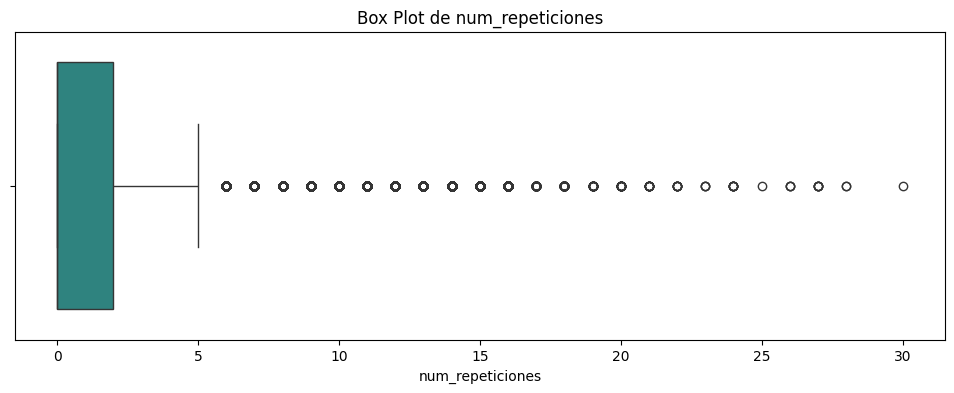

In [ ]:
## boxplot
plt.figure(figsize=(12, 4))
sns.boxplot(data=df_test, x='num_repeticiones', palette='viridis')
plt.title('Box Plot de num_repeticiones')
plt.show()

In [ ]:
## verificando el num_repeticiones > 5
df_test[df_test['num_repeticiones'] > 5]

,target,text,clean_text,without_stopwords,num_palabras,num_palabras_unicas,polarity,subjectivity,num_stopwords,neg_words,neu_words,pos_words,num_exclamaciones,num_interrogaciones,num_puntuacion,capital_word_density,num_repeticiones,sarcasmo,entropia
27,0,ooooh.... LOL that leslie.... and ok I won't ...,ooooh lol that leslie and ok i wont do it agai...,ooooh lol leslie ok wont leslie wont get mad,17,14,0.225000,0.733333,8,0,4,5,0,0,2,0.117647,6,0,2.462118
30,0,@alielayus I want to go to promote GEAR AND GR...,i want to go to promote gear and groove but un...,want go promote gear groove unfornately ride m...,26,21,0.000000,0.000000,12,0,11,3,0,0,1,0.185185,9,0,2.614347
34,0,ok I'm sick and spent an hour sitting in the s...,ok im sick and spent an hour sitting in the sh...,ok im sick spent hour sitting shower cause sic...,28,25,-0.205714,0.462857,12,6,6,4,0,0,2,0.071429,6,0,2.709561
41,0,"Sad, sad, sad. I don't know why but I hate thi...",sad sad sad i dont know why but i hate this fe...,sad sad sad dont know hate feeling wanna sleep...,19,14,-0.575000,0.975000,8,6,3,2,1,0,4,0.210526,7,0,2.613748
54,0,"@andywana Not sure what they are, only that th...",not sure what they are only that they are pos ...,sure pos much want dont think trade away compa...,26,22,0.066667,0.696296,14,1,7,4,1,0,3,0.074074,8,0,2.619024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137149,4,Getting ready to go out I have to go to mac ...,getting ready to go out i have to go to mac to...,getting ready go go mac buy brushes,14,10,0.200000,0.500000,7,0,5,2,0,0,0,0.071429,6,0,2.567566
1137171,4,Getting ready to have a picnic in the park w/ ...,getting ready to have a picnic in the park w m...,getting ready picnic park w muh partner crime ...,27,24,0.200000,0.500000,12,3,9,3,1,0,3,0.000000,6,0,2.743185
1137213,4,oooo haha just waking up and ready to eat a de...,oooo haha just waking up and ready to eat a de...,oooo haha waking ready eat delicious breakfast...,23,19,0.466667,0.600000,11,0,5,7,0,0,0,0.000000,7,0,2.757254
1137217,4,@naijagal You just HAD to throw that in. Tell ...,you just had to throw that in tell her that i ...,throw tell say thanks eye contact brixton gig ...,26,23,0.200000,0.200000,15,0,9,2,1,0,3,0.074074,6,0,2.657222


In [ ]:
## analizando percentiles
df_test['num_repeticiones'].describe(percentiles=[.25, .5, .75, .90, .95, .97, .975, .98, .99])

,num_repeticiones
count,1.111141e+06
mean,1.317017e+00
std,2.083672e+00
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,2.000000e+00
90%,4.000000e+00
95%,6.000000e+00
97%,6.000000e+00


In [ ]:
## verificando num_repeticiones > 7.5
df_test[df_test['num_repeticiones'] > 7]

,target,text,clean_text,without_stopwords,num_palabras,num_palabras_unicas,polarity,subjectivity,num_stopwords,neg_words,neu_words,pos_words,num_exclamaciones,num_interrogaciones,num_puntuacion,capital_word_density,num_repeticiones,sarcasmo,entropia
30,0,@alielayus I want to go to promote GEAR AND GR...,i want to go to promote gear and groove but un...,want go promote gear groove unfornately ride m...,26,21,0.000000,0.000000,12,0,11,3,0,0,1,0.185185,9,0,2.614347
54,0,"@andywana Not sure what they are, only that th...",not sure what they are only that they are pos ...,sure pos much want dont think trade away compa...,26,22,0.066667,0.696296,14,1,7,4,1,0,3,0.074074,8,0,2.619024
98,0,Body Of Missing Northern Calif. Girl Found: P...,body of missing northern calif girl found poli...,body missing northern calif girl found police ...,18,13,-0.200000,0.050000,5,4,9,0,0,0,3,0.000000,10,0,2.783238
125,0,This week just seems to get longer and longer ...,this week just seems to get longer and longer ...,week seems get longer longer terms much need m...,27,20,0.100000,0.150000,13,0,14,0,0,0,2,0.037037,13,0,2.715281
178,0,@dannyvegasbaby danny im upset that i wasnt he...,danny im upset that i wasnt here to watch the ...,danny im upset wasnt watch live chat car hours...,25,21,0.136364,0.500000,12,4,9,0,1,0,3,0.000000,8,0,2.621502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136959,4,"@LoopinFool Still, why have the most? You stil...",still why have the most you still have and yo...,still still youre able win least thats least,19,15,0.175000,0.456250,11,0,5,3,1,1,5,0.000000,8,0,2.553961
1137097,4,@DailyStatsmobi it was an amazing race and the...,it was an amazing race and the more i think ab...,amazing race think want try im sure better,26,20,0.533333,0.762963,18,0,2,6,0,0,3,0.111111,10,0,2.577565
1137100,4,@Murdoc569 Production meeting tonight. Trying ...,production meeting tonight trying to do the fu...,production meeting tonight trying fundraiser g...,24,19,0.000000,0.000000,11,0,13,0,0,1,4,0.000000,8,0,2.703517
1137124,4,@logangator We'll figure something out. I jus...,well figure something out i just have to be to...,well figure something mco thu either bug house...,28,23,0.000000,0.000000,18,0,8,2,0,0,4,0.103448,10,0,2.662498


In [ ]:
# Calcular el percentil 97
p97 = np.percentile(df_test['num_repeticiones'], 97)

# Truncar valores por encima del percentil 97
df_test['num_repeticiones'] = df_test['num_repeticiones'].apply(lambda x: min(x, p97))

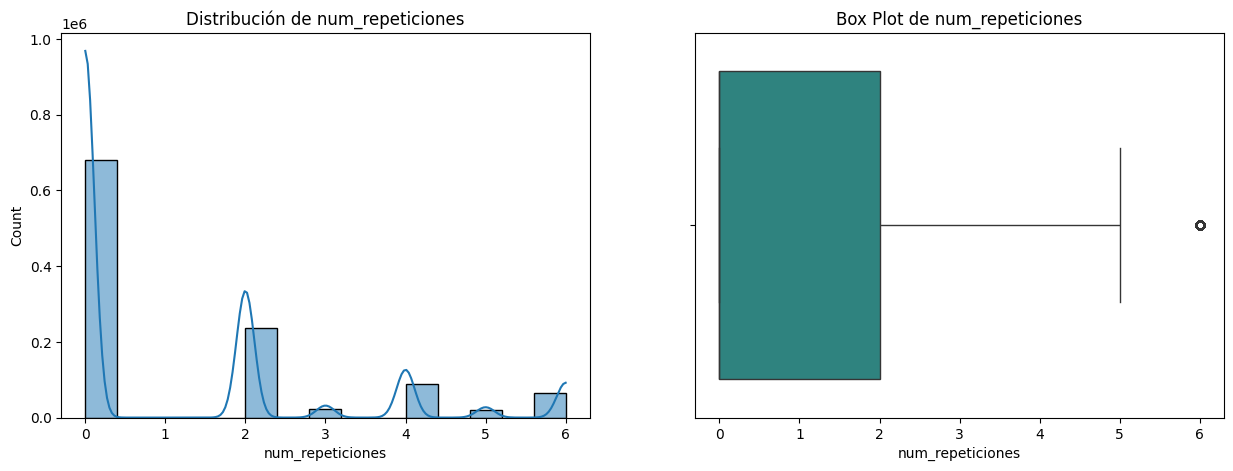

In [ ]:
## histograma y boxplot
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_test['num_repeticiones'], bins=15, kde=True)
plt.title('Distribución de num_repeticiones')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_test, x='num_repeticiones', palette='viridis')
plt.title('Box Plot de num_repeticiones')
plt.show()


* COnseguimos una mejor distribución en nuestra variable, sin eliminar datos. De esta manera controlamos los outliers presentes, debido a que había presencia de una cantidad grande de repeticiones en algunos tweets.

#### 5.1.1.6 num_palabras

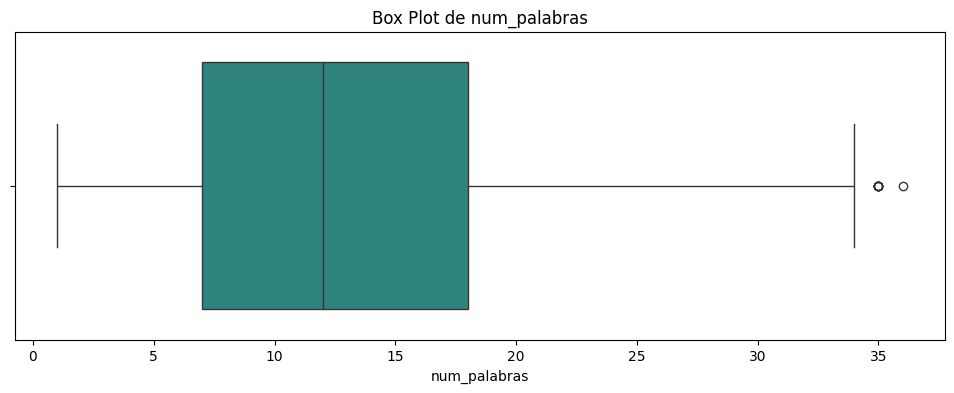

In [ ]:
## boxplot
plt.figure(figsize=(12, 4))
sns.boxplot(data=df_test, x='num_palabras', palette='viridis')
plt.title('Box Plot de num_palabras')
plt.show()

In [ ]:
df_test[df_test['num_palabras'] > 32]

,target,text,clean_text,without_stopwords,num_palabras,num_palabras_unicas,polarity,subjectivity,num_stopwords,neg_words,neu_words,pos_words,num_exclamaciones,num_interrogaciones,num_puntuacion,capital_word_density,num_repeticiones,sarcasmo,entropia
59932,0,i cant do it. i cant i cant i cant i cant. may...,i cant do it i cant i cant i cant i cant maybe...,cant cant cant cant cant maybe bit wont well t...,34,21,0.000000,0.000000,22,1,8,2,0,0,1,0.000000,6.0,0,2.584544
62137,0,"Ya, i'm in a bad mood. I get off work to find ...",ya im in a bad mood i get off work to find out...,ya im bad mood get work find date cancelled ha...,33,28,-0.700000,0.666667,19,4,8,2,0,0,3,0.030303,6.0,0,2.742232
77058,0,i hope so too its got to be on a cd somewhere...,i hope so too its got to be on a cd somewhere ...,hope got cd somewhere remember put cd u play w...,35,26,-0.050000,0.400000,17,0,14,4,0,1,2,0.000000,6.0,0,2.651060
77478,0,I wish i didn't care about you as much as i do...,i wish i didnt care about you as much as i do ...,wish didnt care much wish wasnt love much cant...,33,21,0.425000,0.500000,21,7,3,1,0,0,2,0.060606,6.0,0,2.648372
93457,0,hello all can anyone tell me were the sun has ...,hello all can anyone tell me were the sun has ...,hello anyone tell sun gone live ireland hey ne...,33,28,0.136364,0.500000,20,0,13,0,0,0,0,0.000000,6.0,0,2.620882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028898,4,@X_Mrs_CMB_X lool nh i neva new his name =P &l...,lool nh i neva new his name p lt i cn c if i c...,lool nh neva new name p lt cn c cn cuz messin ...,33,28,-0.181818,0.727273,11,2,17,3,0,0,5,0.028571,6.0,0,2.569367
1029784,4,hi miley can u email me if i give u my email i...,hi miley can u email me if i give u my email i...,hi miley u email give u email im ur bigest fan...,33,24,0.000000,0.000000,11,2,14,6,1,0,2,0.000000,6.0,0,2.648589
1085298,4,okay so 2night in the middle of save a horse r...,okay so night in the middle of save a horse ri...,okay night middle save horse ride cowboy got m...,33,22,0.231250,0.425000,15,2,9,7,0,0,0,0.000000,6.0,0,2.725771
1108588,4,im more sooooo in love with Nick affter watchi...,im more sooooo in love with nick affter watchi...,im sooooo love nick affter watching video love...,33,15,0.500000,0.600000,12,0,7,14,1,0,1,0.000000,6.0,0,2.575491


* Analizando la variable, consideramos mantenerla de esta manera, al notal que no hay gran presencia de outliers y al ver los outliers igual puede aportar valor para el modelo.

#### 5.1.1.7 num_palabras_unicas

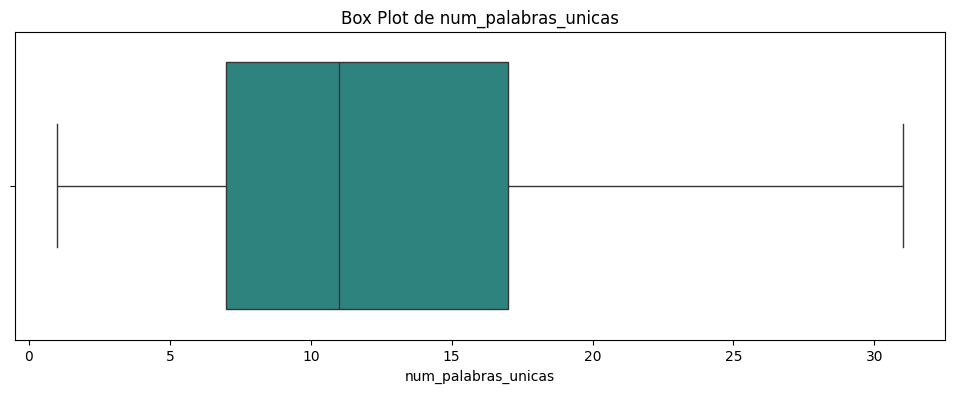

In [ ]:
## boxplot
plt.figure(figsize=(12, 4))
sns.boxplot(data=df_test, x='num_palabras_unicas', palette='viridis')
plt.title('Box Plot de num_palabras_unicas')
plt.show()

In [ ]:
df_test[df_test['num_palabras_unicas'] > 25]

,target,text,clean_text,without_stopwords,num_palabras,num_palabras_unicas,polarity,subjectivity,num_stopwords,neg_words,neu_words,pos_words,num_exclamaciones,num_interrogaciones,num_puntuacion,capital_word_density,num_repeticiones,sarcasmo,entropia
56,0,I have a sad feeling that Dallas is not going ...,i have a sad feeling that dallas is not going ...,sad feeling dallas going show gotta say though...,28,27,-0.450000,0.700000,12,3,12,1,0,0,3,0.071429,2.0,0,2.754735
397,0,Finally gave in and was bored enough to start ...,finally gave in and was bored enough to start ...,finally gave bored enough start thing think go...,28,26,-0.166667,0.833333,15,4,8,2,0,0,1,0.034483,4.0,0,2.757743
428,0,When to the shoe repair shop and the guy could...,when to the shoe repair shop and the guy could...,shoe repair shop guy could find shoes go back ...,31,27,0.000000,0.000000,18,0,13,0,1,0,2,0.032258,6.0,0,2.728508
446,0,@KevChoice I just don't get it. What in a pers...,i just dont get it what in a persons mind coul...,dont get persons mind could even ish like pray...,27,27,0.200000,0.300000,16,0,9,2,0,1,4,0.035714,0.0,0,2.756587
478,0,Our sweet little man just fell asleep while wa...,our sweet little man just fell asleep while wa...,sweet little man fell asleep waiting daddy big...,26,26,-0.007500,0.410000,10,4,10,2,1,0,2,0.000000,0.0,0,2.821446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136460,4,"I asked a 3yr old how old I was &amp; he said,...",i asked a yr old how old i was amp he said quo...,asked yr old old amp said quot like mequot pro...,30,27,0.166667,0.200000,13,0,12,5,0,1,4,0.066667,6.0,0,2.837407
1136635,4,I love how SOMEONE had the nerve to text my fr...,i love how someone had the nerve to text my fr...,love someone nerve text friends old phone make...,28,26,0.300000,0.400000,15,2,6,5,0,0,2,0.071429,4.0,0,2.688816
1136699,4,So not a mornin person but God is Good cuz I'm...,so not a mornin person but god is good cuz im ...,mornin person god good cuz im dressed crimped ...,26,26,0.225000,0.500000,9,0,10,7,1,0,4,0.074074,0.0,0,2.817064
1136873,4,thank god that there is a language called Engl...,thank god that there is a language called engl...,thank god language called english talk go slee...,29,27,-0.150000,0.300000,15,0,10,4,0,0,2,0.100000,4.0,0,2.637195


* Esta variable la mantenemos como tal, debido a que no hay presencia de outliers, y analizando en los valores altos, podría aportar cierto valor en el modelo.

#### 5.1.1.8 Polaridad y Subjetividad

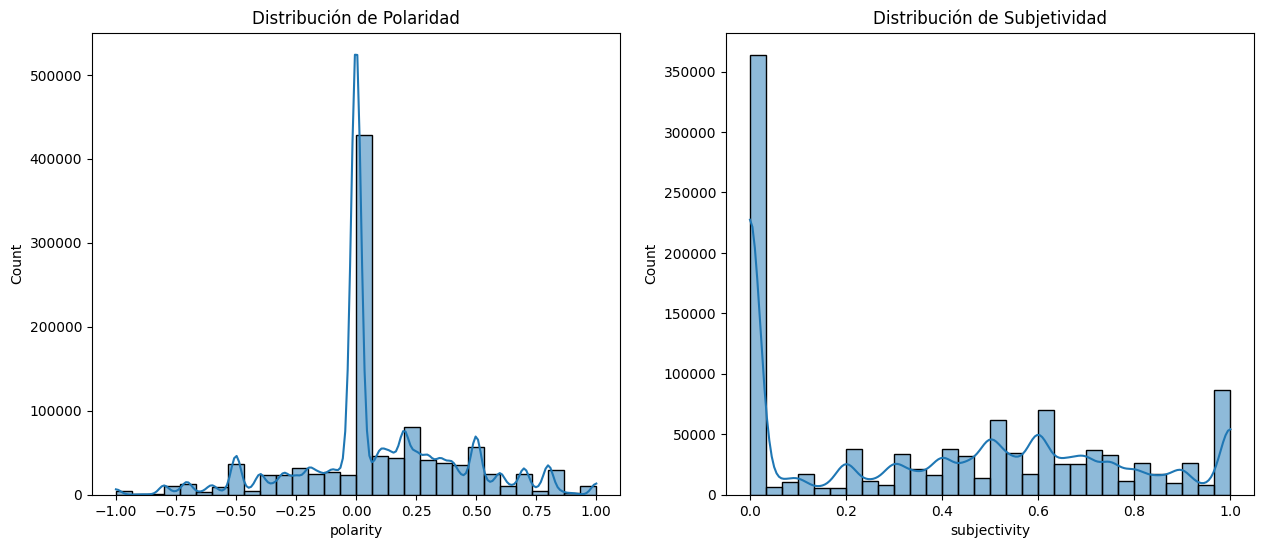

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_test['polarity'], bins=30, kde=True)
plt.title('Distribución de Polaridad')

plt.subplot(1, 2, 2)
sns.histplot(df_test['subjectivity'], bins=30, kde=True)
plt.title('Distribución de Subjetividad')

plt.show()

**POLARIDAD**
* Observamos en polaridad, que la tendencia es en el valor 0, lo cual nos indica que la librería Textblob está seleccionando mis textos, en su mayoría como neutros. Esto podría generar problemas de entendimiento en el modelo, ya que al tener un target que ya tiene separado en positivo y negativo, que esta librería me diga que la gran mayoría son neutros, podría generarme malas predicciones.
* De todas maneras, se evaluará si se continúa con la variable polaridad.

**SUBJETIVIDAD**
* Con respecto a esta variable, podemos notar que una gran cantidad de textos, están en el lado 0, lo cual nos indicaría que son textos objetivos, lo cual podría denotarmos algo a considerar. También notamos que hay una cantidad a considerar para el lado 1, que sería texto subjetivo, pero es entendible, porque al ser tweets, la gente suele comentar emocionalemte en muchos casos.
* En general, notamos que el texto es objetivo, y también existe texto emocional pero en menor medida, lo cual nos da un valor para nuestro modelo. Consideramos que si sería una variable valiosa.

#### 5.1.1.9 num palabras neutras-negativas-positivas

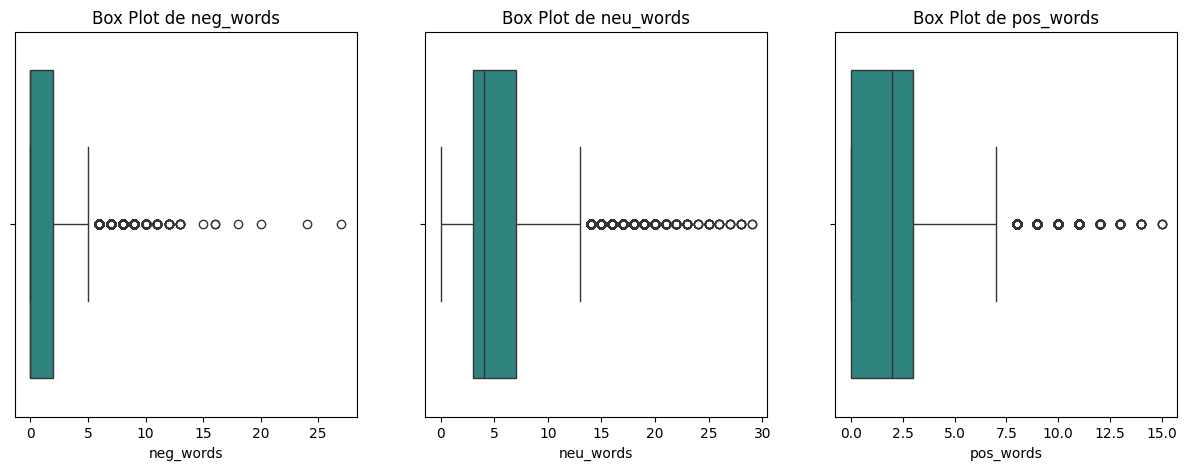

In [ ]:
## boxplot (subplots 3 gráficos)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(data=df_test, x='neg_words', palette='viridis')
plt.title('Box Plot de neg_words')

plt.subplot(1, 3, 2)
sns.boxplot(data=df_test, x='neu_words', palette='viridis')
plt.title('Box Plot de neu_words')

plt.subplot(1, 3, 3)
sns.boxplot(data=df_test, x='pos_words', palette='viridis')
plt.title('Box Plot de pos_words')

plt.show()


* Se observan valores atípicos en las tres variables (neg_words, neu_words, pos_words), lo que indica que algunos textos contienen un número muy alto de estas palabras.

* La distribución no es simétrica, y notamos que la mayoria de valores para las tres variables está en un rango bajo, con presencia de outliers.

* Si decidimos truncar los valores outliers podríamos afectar la relación con otras variables, recordemos que estás tres variables vienen de la cantidad de palabras en el tweet.

* Para estas tres variables, decidimos aplicar transformación logarítmica, lo que nos ayudará a reducir el impacto de los valores atípicos sin eliminarlos, de esta manera mejoramos la distribución y generamos más estabilidad en nuestro análisis y posterior modelo.

#### 5.1.1.10 sarcasmo

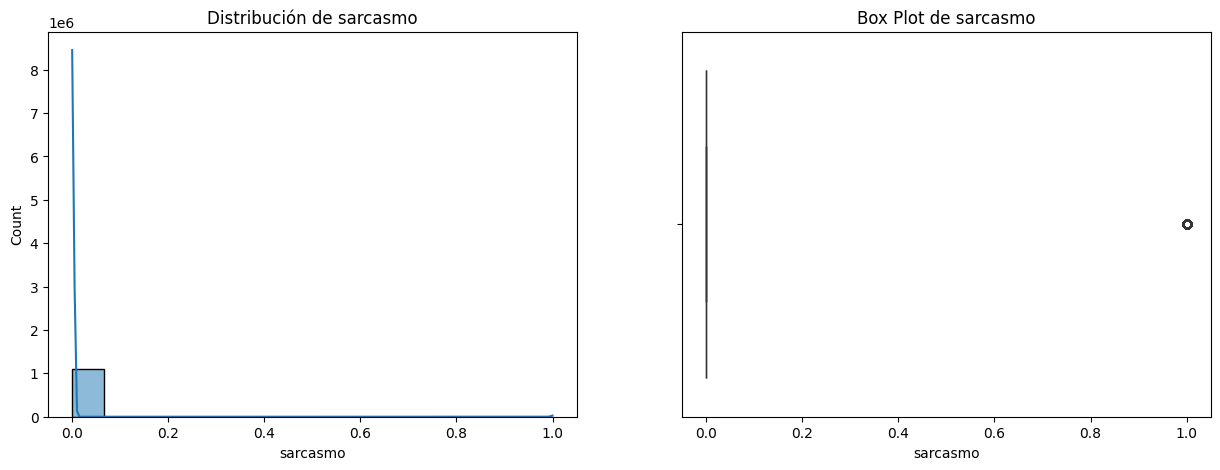

In [ ]:
## histograma y boxplot
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_test['sarcasmo'], bins=15, kde=True)
plt.title('Distribución de sarcasmo')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_test, x='sarcasmo', palette='viridis')
plt.title('Box Plot de sarcasmo')
plt.show()

* Observamos que hay una tendencia a que el texto lo catalogue sin sarcasmo, es por eso que la mayor parte de datos tienden a la izquierda.* Esto podría generarnos alguna dificultad en el modelado. Sin embargo, evaluaremos como se correlaciona con la variable objetivo y con las demás variables en el Heatmap.

#### 5.1.1.11 entropía

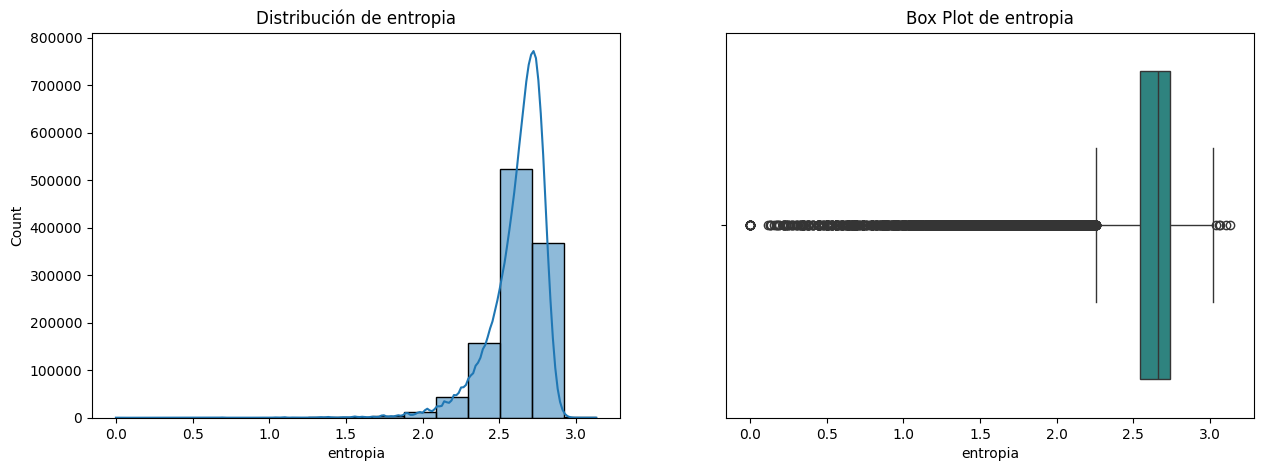

In [ ]:
## histograma y boxplot
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_test['entropia'], bins=15, kde=True)
plt.title('Distribución de entropia')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_test, x='entropia', palette='viridis')
plt.title('Box Plot de entropia')
plt.show()

* Notamos que la entropía tiende al lado derecho, pero consideramos que es una variable a tener en cuenta.
* Realizaremos transformación logarítmica para generar mejor la distribución.

## 5.2 HEATMAP - MAPA DE CORRELACIÓN

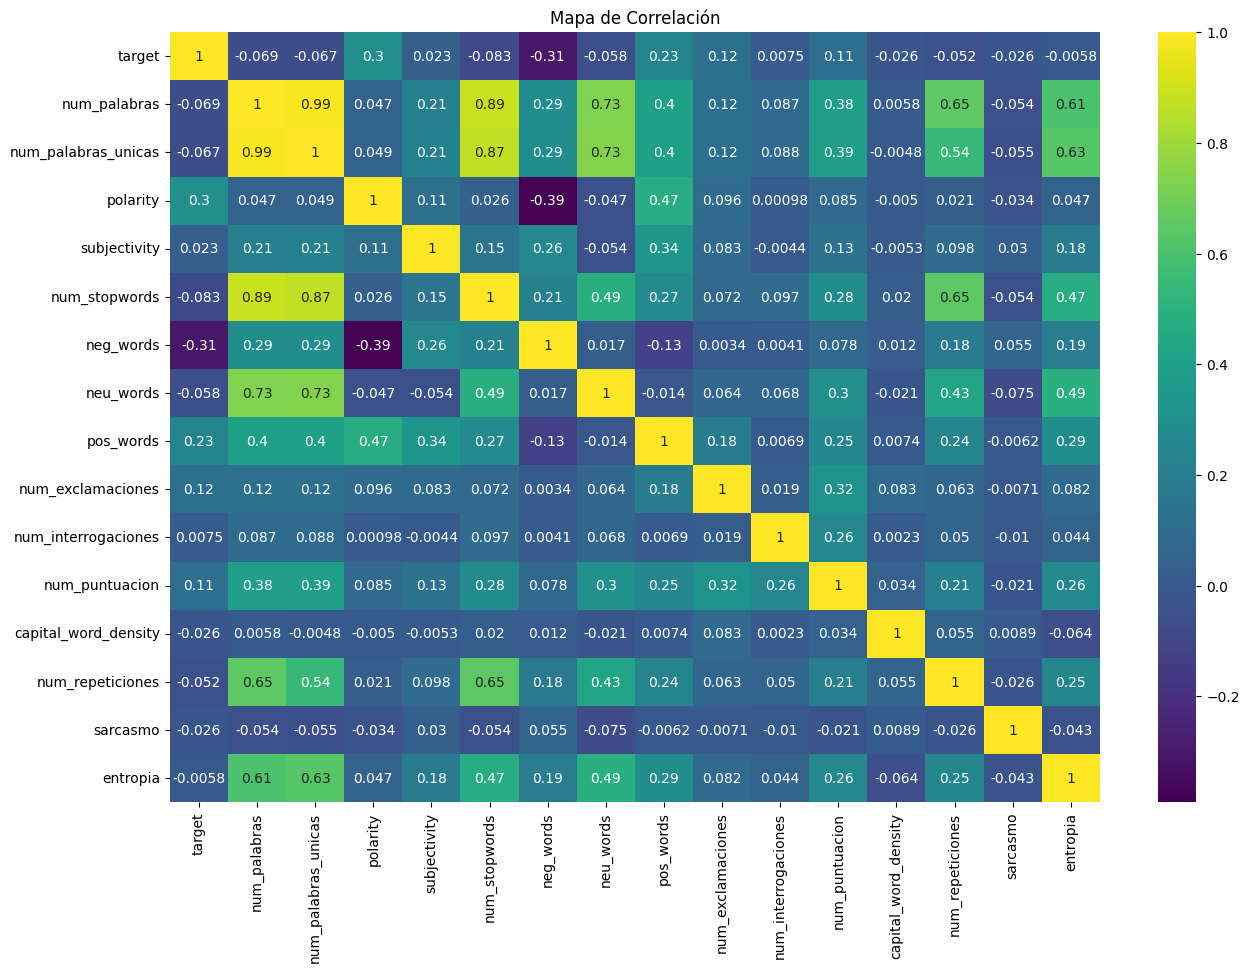

In [ ]:
## realizando un mapa de correlación entre variables
plt.figure(figsize=(15, 10))
# Selecting only numeric columns for correlation calculation
numeric_df = df_test.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis')
plt.title('Mapa de Correlación')
plt.show()

* Analizando la matriz de correlación, podemos observar que las variables que más se relacionan con la variable objetivo, son polarity-negwords-poswords. Teníamos pensado eliminar la variable polarity, por lo analizado anteriormente, pero viendo como se correlaciona con la variable objetivo, decidimos mantenerlo en el modelo.

* Notamos correlación entre variables, principalmente entre la variable num_palabras, palabras_unicas, num_stopwords, neu_words y num_repeticiones. COnsideramos que casi todas las variables son importantes, pero podríamos considerar que el num_repeticiones, num_palabras y palabras_unicas están mucho más relacionadas, en está ocasión consideramos eliminar la variable palabras_unicas.

* Vemos que neu_words tiene alta correlacion con otras variables, pero también vemos que tiene una mejor relación con la variable objetivo que otras variables. Al no tener tantas variables para manipular, consideramos mantenerla.

* Notamos que las variables sarcasmo y entropía, tienen correlación parecida al igual que otras variables con la variable objetivo. También notamos que tiene cierta correlación con otras variables, se mantendrán por ahora.

In [ ]:
## Eliminando la variable palabras_unicas
df_test.drop('num_palabras_unicas', axis=1, inplace=True)
df_test

,target,text,clean_text,without_stopwords,num_palabras,polarity,subjectivity,num_stopwords,neg_words,neu_words,pos_words,num_exclamaciones,num_interrogaciones,num_puntuacion,capital_word_density,num_repeticiones,sarcasmo,entropia
0,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,upset cant update facebook texting might cry r...,21,0.000,0.000,9,5,7,0,1,0,3,0.000000,0.0,0,2.769718
1,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...,dived many times ball managed save percent res...,17,0.500,0.500,7,0,7,3,0,0,3,0.055556,2.0,0,2.741038
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,whole body feels itchy like fire,10,0.200,0.400,4,3,2,2,0,0,0,0.000000,0.0,0,2.707497
3,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,behaving im mad cant see,20,-0.625,1.000,15,2,3,0,0,1,5,0.047619,4.0,0,2.669712
4,0,@Kwesidei not the whole crew,not the whole crew,whole crew,4,0.200,0.400,2,0,2,0,0,0,1,0.000000,0.0,0,2.216102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137238,4,ReCoVeRiNg FrOm ThE lOnG wEeKeNd,recovering from the long weekend,recovering long weekend,5,-0.050,0.400,2,0,3,0,0,0,0,0.000000,0.0,0,2.604188
1137239,4,"@Cliff_Forster Yeah, that does work better tha...",yeah that does work better than just waiting f...,yeah work better waiting end wonder time keep ...,26,0.600,0.550,16,0,5,5,0,0,4,0.074074,4.0,0,2.736297
1137240,4,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...,woke school best feeling ever,11,1.000,0.300,6,0,2,3,0,0,1,0.000000,0.0,0,2.758130
1137241,4,TheWDB.com - Very cool to hear old Walt interv...,very cool to hear old walt interviews,cool hear old walt interviews,7,0.225,0.425,2,0,3,2,1,0,5,0.000000,0.0,0,2.603523


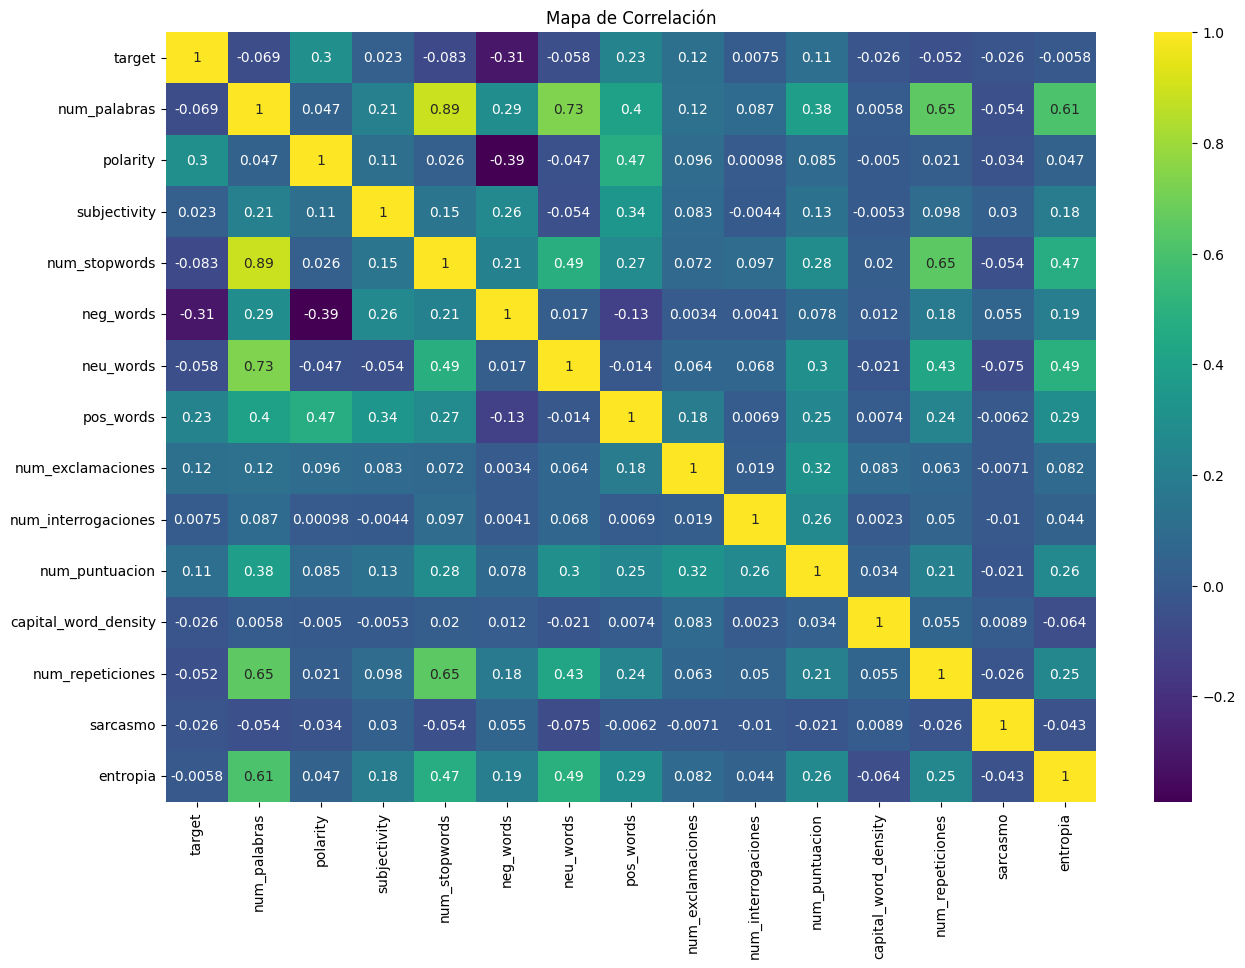

In [ ]:
## Verificando nuevamente el heatmap
plt.figure(figsize=(15, 10))
# Selecting only numeric columns for correlation calculation
numeric_df = df_test.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis')
plt.title('Mapa de Correlación')
plt.show()

# 6. MODELO DE MACHINE LEARNING

## 6.1 BALANCEO DE CLASES

In [ ]:
df_test.head(10)

,target,text,clean_text,without_stopwords,num_palabras,polarity,subjectivity,num_stopwords,neg_words,neu_words,pos_words,num_exclamaciones,num_interrogaciones,num_puntuacion,capital_word_density,num_repeticiones,sarcasmo,entropia
0,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,upset cant update facebook texting might cry r...,21,0.000000,0.000000,9,5,7,0,1,0,3,0.000000,0.0,0,2.769718
1,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...,dived many times ball managed save percent res...,17,0.500000,0.500000,7,0,7,3,0,0,3,0.055556,2.0,0,2.741038
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,whole body feels itchy like fire,10,0.200000,0.400000,4,3,2,2,0,0,0,0.000000,0.0,0,2.707497
3,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,behaving im mad cant see,20,-0.625000,1.000000,15,2,3,0,0,1,5,0.047619,4.0,0,2.669712
4,0,@Kwesidei not the whole crew,not the whole crew,whole crew,4,0.200000,0.400000,2,0,2,0,0,0,1,0.000000,0.0,0,2.216102
5,0,Need a hug,need a hug,need hug,3,0.000000,0.000000,1,0,0,2,0,0,0,0.000000,0.0,0,2.025326
6,0,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time no see yes rains a bit only a bi...,hey long time see yes rains bit bit lol im fin...,18,0.341667,0.450000,5,0,6,7,1,1,5,0.045455,4.0,0,2.617979
7,0,@Tatiana_K nope they didn't have it,nope they didnt have it,nope didnt,5,0.000000,0.000000,3,0,2,0,0,0,3,0.000000,0.0,0,2.366710
8,0,@twittera que me muera ?,que me muera,que muera,3,0.000000,0.000000,1,0,2,0,0,1,2,0.000000,0.0,0,1.863680
9,0,spring break in plain city... it's snowing,spring break in plain city its snowing,spring break plain city snowing,7,-0.214286,0.357143,2,0,5,0,0,0,2,0.000000,0.0,0,2.590860


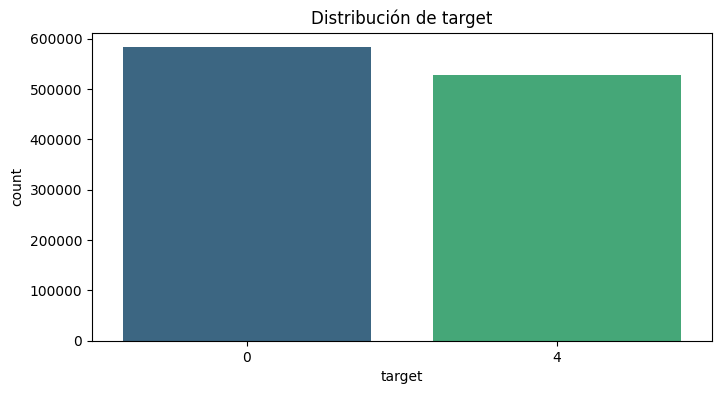

In [ ]:
## graficando
plt.figure(figsize=(8, 4))
sns.countplot(data=df_test, x='target', palette='viridis')
plt.title('Distribución de target')
plt.show()

* Se realizará un balanceo de clases para dejar en la misma cantidad las clases positivo y negativo.
* Se realiza un underbalance para la clase negativa, para tener la misma cantidad que la positiva.
* Se realiza de esta manera, debido a que tenemos gran cantidad de data, y esto no generaría un sesgo. Además ya hemos separado inicialmente los tweets de los usuarios y realizado un análisis previo.

In [ ]:
## realizando un balanceo de clases antes de ingresar al modelo
## RandomUndersampling
import imblearn
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
## realizando un balanceo de clases antes de ingresar al modelo
## Realizando underbalance para clase negativa para que quede en positivo - relacionado con 'without_stopwords'
## RandomUndersampling
import imblearn
from imblearn.under_sampling import RandomUnderSampler

x = df_test.drop('target', axis=1)
y = df_test['target']

rus = RandomUnderSampler(random_state=42)
x_rus, y_rus = rus.fit_resample(x, y)

df_rus = pd.concat([x_rus, y_rus], axis=1)
df_rus

,text,clean_text,without_stopwords,num_palabras,polarity,subjectivity,num_stopwords,neg_words,neu_words,pos_words,num_exclamaciones,num_interrogaciones,num_puntuacion,capital_word_density,num_repeticiones,sarcasmo,entropia,target
370832,is loving looking after Bonnie.. not loving he...,is loving looking after bonnie not loving her ...,loving looking bonnie loving kitchen til get b...,20,0.400000,0.633333,10,0,5,5,0,0,1,0.000000,2.0,0,2.676885,0
552846,Did a complete restore. Set up like a new phon...,did a complete restore set up like a new phone...,complete restore set like new phone reorganize...,25,0.118182,0.427273,12,2,8,4,0,0,1,0.040000,6.0,0,2.787339,0
92318,"Aww poor danny Go fuck that gay adam, I SERIO...",aww poor danny go fuck that gay adam i serious...,aww poor danny go fuck gay adam seriously hate,12,-0.176667,0.716667,3,6,3,0,0,0,2,0.333333,0.0,0,2.768334,0
504292,The office is rather quiet on such a hot day...,the office is rather quiet on such a hot day,office rather quiet hot day,10,0.125000,0.591667,5,0,5,0,0,0,1,0.000000,0.0,0,2.574427,0
12502,Lamentably I am today Saturday in the work,lamentably i am today saturday in the work,lamentably today saturday work,8,0.000000,0.000000,4,2,2,0,0,0,0,0.125000,0.0,0,2.682829,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137238,ReCoVeRiNg FrOm ThE lOnG wEeKeNd,recovering from the long weekend,recovering long weekend,5,-0.050000,0.400000,2,0,3,0,0,0,0,0.000000,0.0,0,2.604188,4
1137239,"@Cliff_Forster Yeah, that does work better tha...",yeah that does work better than just waiting f...,yeah work better waiting end wonder time keep ...,26,0.600000,0.550000,16,0,5,5,0,0,4,0.074074,4.0,0,2.736297,4
1137240,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...,woke school best feeling ever,11,1.000000,0.300000,6,0,2,3,0,0,1,0.000000,0.0,0,2.758130,4
1137241,TheWDB.com - Very cool to hear old Walt interv...,very cool to hear old walt interviews,cool hear old walt interviews,7,0.225000,0.425000,2,0,3,2,1,0,5,0.000000,0.0,0,2.603523,4


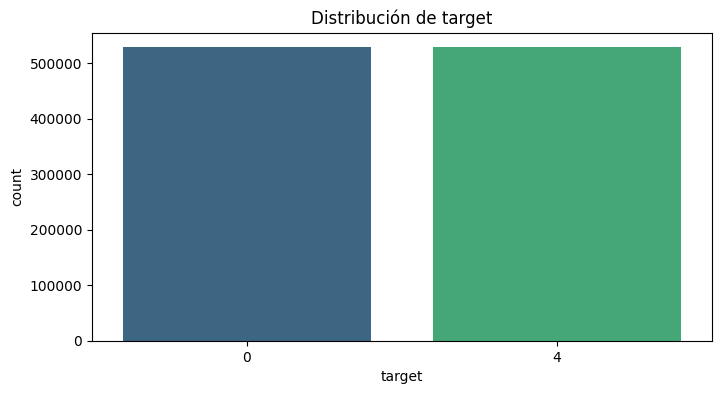

In [ ]:
## Verificando el balanceo correcto
plt.figure(figsize=(8, 4))
sns.countplot(data=df_rus, x='target', palette='viridis')
plt.title('Distribución de target')
plt.show()

* Verificamos que se realizó correctamente el balanceo de las clases

## 6.2 TRANSFORMACIÓN LOGARÍTMICA

* De esta manera reducimos la asimetría (sesgo) y hacemos que los valores extremos tengan menos impacto en estas variables. Estas variables ya se habían analizado anteriormente.

In [ ]:
## Aplicamos transformación logarítmica para las variables neg_words, pos_words, neu_words y num_stopwords
df_rus['neg_words'] = np.log1p(df_rus['neg_words'])
df_rus['pos_words'] = np.log1p(df_rus['pos_words'])
df_rus['neu_words'] = np.log1p(df_rus['neu_words'])
df_rus['num_stopwords'] = np.log1p(df_rus['num_stopwords'])
df_rus['entropia'] = np.log1p(df_rus['entropia'])
df_rus

,text,clean_text,without_stopwords,num_palabras,polarity,subjectivity,num_stopwords,neg_words,neu_words,pos_words,num_exclamaciones,num_interrogaciones,num_puntuacion,capital_word_density,num_repeticiones,sarcasmo,entropia,target
370832,is loving looking after Bonnie.. not loving he...,is loving looking after bonnie not loving her ...,loving looking bonnie loving kitchen til get b...,20,0.400000,0.633333,0.798928,0.000000,0.706395,0.706395,0,0,1,0.000000,2.0,0,0.833807,0
552846,Did a complete restore. Set up like a new phon...,did a complete restore set up like a new phone...,complete restore set like new phone reorganize...,25,0.118182,0.427273,0.820286,0.554618,0.771165,0.672503,0,0,1,0.040000,6.0,0,0.846582,0
92318,"Aww poor danny Go fuck that gay adam, I SERIO...",aww poor danny go fuck that gay adam i serious...,aww poor danny go fuck gay adam seriously hate,12,-0.176667,0.716667,0.625800,0.732569,0.625800,0.000000,0,0,2,0.333333,0.0,0,0.844422,0
504292,The office is rather quiet on such a hot day...,the office is rather quiet on such a hot day,office rather quiet hot day,10,0.125000,0.591667,0.706395,0.000000,0.706395,0.000000,0,0,1,0.000000,0.0,0,0.821455,0
12502,Lamentably I am today Saturday in the work,lamentably i am today saturday in the work,lamentably today saturday work,8,0.000000,0.000000,0.672503,0.554618,0.554618,0.000000,0,0,0,0.125000,0.0,0,0.834508,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137238,ReCoVeRiNg FrOm ThE lOnG wEeKeNd,recovering from the long weekend,recovering long weekend,5,-0.050000,0.400000,0.554618,0.000000,0.625800,0.000000,0,0,0,0.000000,0.0,0,0.825095,4
1137239,"@Cliff_Forster Yeah, that does work better tha...",yeah that does work better than just waiting f...,yeah work better waiting end wonder time keep ...,26,0.600000,0.550000,0.851732,0.000000,0.706395,0.706395,0,0,4,0.074074,4.0,0,0.840746,4
1137240,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...,woke school best feeling ever,11,1.000000,0.300000,0.732569,0.000000,0.554618,0.625800,0,0,1,0.000000,0.0,0,0.843256,4
1137241,TheWDB.com - Very cool to hear old Walt interv...,very cool to hear old walt interviews,cool hear old walt interviews,7,0.225000,0.425000,0.554618,0.000000,0.625800,0.554618,1,0,5,0.000000,0.0,0,0.825014,4


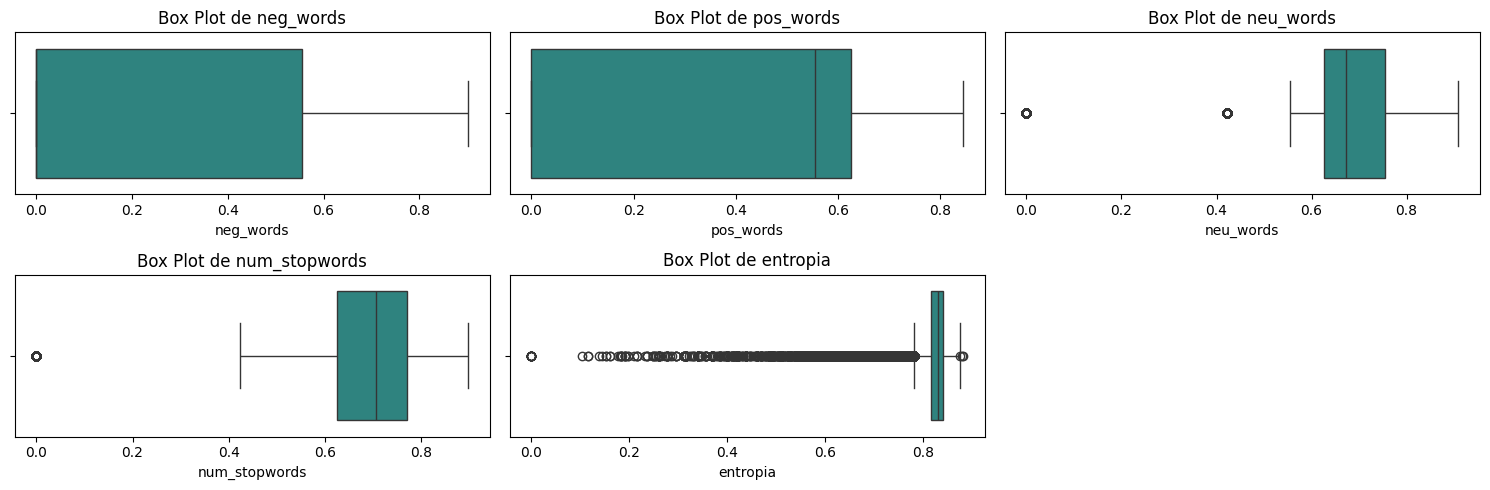

In [ ]:
## verificando la distribución actual de estas variables - boxplot (5 vairables)

plt.figure(figsize=(15, 5))
# Primera fila
plt.subplot(2, 3, 1)
sns.boxplot(data=df_rus, x='neg_words', palette='viridis')
plt.title('Box Plot de neg_words')

plt.subplot(2, 3, 2)
sns.boxplot(data=df_rus, x='pos_words', palette='viridis')
plt.title('Box Plot de pos_words')

plt.subplot(2, 3, 3)
sns.boxplot(data=df_rus, x='neu_words', palette='viridis')
plt.title('Box Plot de neu_words')

# Segunda fila
plt.subplot(2, 3, 4)
sns.boxplot(data=df_rus, x='num_stopwords', palette='viridis')
plt.title('Box Plot de num_stopwords')

plt.subplot(2, 3, 5)
sns.boxplot(data=df_rus, x='entropia', palette='viridis')
plt.title('Box Plot de entropia')

plt.tight_layout()
plt.show()

* Observamos que la transformación logarítmica ayudó a que los outliers no tengan tanta relevancia en estas variables, las cuales habiamos decidido dejar con outliers.
* Vemos que en este caso, la entrpía sigue manteniendo la distribución no adecuada, se podría realizar un Boxcox, pero en este caso continuaremos como está.

## 6.3 DIVISIÓN DE LA DATA

In [ ]:
## variables numéricas
df_rus_num = df_rus.select_dtypes(include=np.number)
df_rus_num

,num_palabras,polarity,subjectivity,num_stopwords,neg_words,neu_words,pos_words,num_exclamaciones,num_interrogaciones,num_puntuacion,capital_word_density,num_repeticiones,sarcasmo,entropia,target
370832,20,0.400000,0.633333,0.798928,0.000000,0.706395,0.706395,0,0,1,0.000000,2.0,0,0.833807,0
552846,25,0.118182,0.427273,0.820286,0.554618,0.771165,0.672503,0,0,1,0.040000,6.0,0,0.846582,0
92318,12,-0.176667,0.716667,0.625800,0.732569,0.625800,0.000000,0,0,2,0.333333,0.0,0,0.844422,0
504292,10,0.125000,0.591667,0.706395,0.000000,0.706395,0.000000,0,0,1,0.000000,0.0,0,0.821455,0
12502,8,0.000000,0.000000,0.672503,0.554618,0.554618,0.000000,0,0,0,0.125000,0.0,0,0.834508,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137238,5,-0.050000,0.400000,0.554618,0.000000,0.625800,0.000000,0,0,0,0.000000,0.0,0,0.825095,4
1137239,26,0.600000,0.550000,0.851732,0.000000,0.706395,0.706395,0,0,4,0.074074,4.0,0,0.840746,4
1137240,11,1.000000,0.300000,0.732569,0.000000,0.554618,0.625800,0,0,1,0.000000,0.0,0,0.843256,4
1137241,7,0.225000,0.425000,0.554618,0.000000,0.625800,0.554618,1,0,5,0.000000,0.0,0,0.825014,4


In [ ]:
## Reemplazando el 4 por el 1 en el target
df_rus_num["target"] = df_rus_num["target"].replace(4, 1)
df_rus_num.tail(5)

,num_palabras,polarity,subjectivity,num_stopwords,neg_words,neu_words,pos_words,num_exclamaciones,num_interrogaciones,num_puntuacion,capital_word_density,num_repeticiones,sarcasmo,entropia,target
1137238,5,-0.050,0.400,0.554618,0.0,0.625800,0.000000,0,0,0,0.000000,0.0,0,0.825095,1
1137239,26,0.600,0.550,0.851732,0.0,0.706395,0.706395,0,0,4,0.074074,4.0,0,0.840746,1
1137240,11,1.000,0.300,0.732569,0.0,0.554618,0.625800,0,0,1,0.000000,0.0,0,0.843256,1
1137241,7,0.225,0.425,0.554618,0.0,0.625800,0.554618,1,0,5,0.000000,0.0,0,0.825014,1
1137242,11,0.200,0.500,0.732569,0.0,0.625800,0.554618,0,1,1,0.000000,2.0,0,0.819415,1


In [ ]:
## Separando la data en train y test
from sklearn.model_selection import train_test_split
x = df_rus_num.drop('target', axis=1)
y = df_rus_num['target']

## aplicamos stratify
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

## 6.4 MODELADO

### 6.4.1 REGRESIÓN LOGÍSTICA

In [ ]:
## Regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
## standardscaler
from sklearn.preprocessing import StandardScaler

scaler_lr = StandardScaler()
x_train_scaled = scaler_lr.fit_transform(x_train)
x_test_scaled = scaler_lr.transform(x_test)

lr = LogisticRegression()
lr.fit(x_train_scaled, y_train)
y_pred_lr = lr.predict(x_test_scaled)

# Evaluando el modelo
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)

Accuracy: 0.6752686408523335
Precision: 0.6702491391036874
Recall: 0.6900062449141797
F1 Score: 0.6799842104118037


In [ ]:
report_lr = classification_report(y_test, y_pred_lr, target_names=["Negative", "Positive"], output_dict=True)
pd.DataFrame(report_lr).style.background_gradient()

,Negative,Positive,accuracy,macro avg,weighted avg
precision,0.680593,0.670249,0.675269,0.675421,0.675421
recall,0.660531,0.690006,0.675269,0.675269,0.675269
f1-score,0.670412,0.679984,0.675269,0.675198,0.675198
support,158530.000000,158529.000000,0.675269,317059.000000,317059.000000


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_proba_test_lr = lr.predict_proba(x_test_scaled)[:, 1]

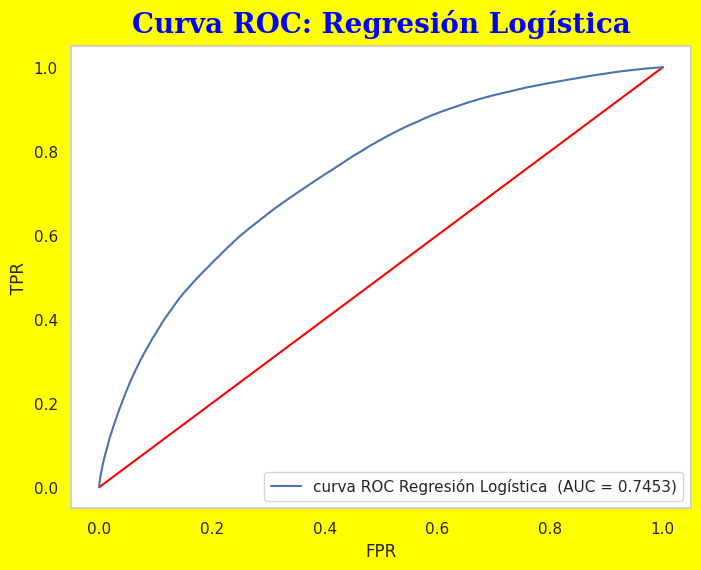

In [ ]:
## Graficando nuestro curva ROC
auc_roc_lr = roc_auc_score(y_test,y_proba_test_lr)
fpr, tpr, thresholds = roc_curve(y_test,y_proba_test_lr)
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
plt.plot(fpr,fpr,color='red')
plt.plot(fpr,tpr,label=(f'curva ROC Regresión Logística  (AUC = {auc_roc_lr:.4f})'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC: Regresión Logística',pad=10, fontdict={'fontsize': 20, 'fontfamily':'serif','fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.legend(loc = 'lower right')
plt.grid(False)
# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.show()

In [ ]:
metricas_lr = [accuracy_lr, precision_lr, recall_lr, f1_lr, auc_roc_lr]

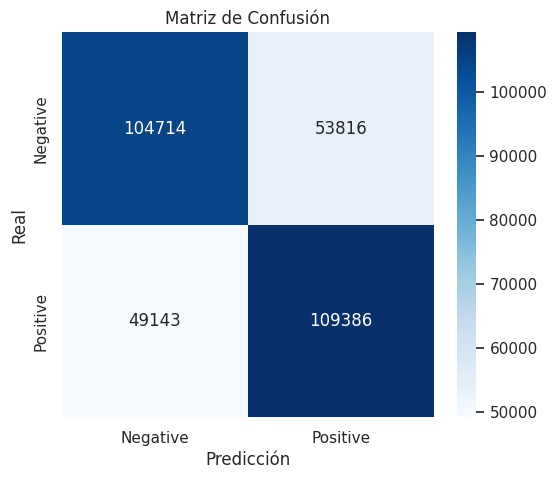

In [ ]:
# Crear la matriz de confusión
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

In [ ]:
## EVALUANDO SOBREAJUSTE CON LOS DATOS DE ENTRENAMIENTO
y_pred_train_lr = lr.predict(x_train_scaled)
accuracy_train_lr = accuracy_score(y_train, y_pred_train_lr)
precision_train_lr = precision_score(y_train, y_pred_train_lr)
recall_train_lr = recall_score(y_train, y_pred_train_lr)
f1_train_lr = f1_score(y_train, y_pred_train_lr)
print("Accuracy en entrenamiento:", accuracy_train_lr)
print("Precision en entrenamiento:", precision_train_lr)
print("Recall en entrenamiento:", recall_train_lr)
print("F1 Score en entrenamiento:", f1_train_lr)

Accuracy en entrenamiento: 0.6753730384980866
Precision en entrenamiento: 0.6703241017885462
Recall en entrenamiento: 0.6901963222691415
F1 Score en entrenamiento: 0.6801150818493014


* Observamos que no existe sobreajuste

### 6.4.2 RANDOM FOREST

In [ ]:
## random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
## standardscaler
from sklearn.preprocessing import StandardScaler

scaler_rf = StandardScaler()
x_train_rf = scaler_rf.fit_transform(x_train)
x_test_rf = scaler_rf.transform(x_test)

In [ ]:
from sklearn.model_selection import HalvingRandomSearchCV

rf = RandomForestClassifier(random_state=42)

# Definir la búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Aplicar Halving Random Search
halving_search = HalvingRandomSearchCV(
    rf, param_grid, factor=2, cv=3, verbose=1, random_state=42, n_jobs=-1
)

halving_search.fit(x_train_rf, y_train)

# Mejor modelo
best_model = halving_search.best_estimator_
print("Mejores parámetros:", halving_search.best_params_)

n_iterations: 8
n_required_iterations: 8
n_possible_iterations: 16
min_resources_: 12
max_resources_: 739803
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 144
n_resources: 12
Fitting 3 folds for each of 144 candidates, totalling 432 fits
----------
iter: 1
n_candidates: 72
n_resources: 24
Fitting 3 folds for each of 72 candidates, totalling 216 fits
----------
iter: 2
n_candidates: 36
n_resources: 48
Fitting 3 folds for each of 36 candidates, totalling 108 fits
----------
iter: 3
n_candidates: 18
n_resources: 96
Fitting 3 folds for each of 18 candidates, totalling 54 fits
----------
iter: 4
n_candidates: 9
n_resources: 192
Fitting 3 folds for each of 9 candidates, totalling 27 fits
----------
iter: 5
n_candidates: 5
n_resources: 384
Fitting 3 folds for each of 5 candidates, totalling 15 fits
----------
iter: 6
n_candidates: 3
n_resources: 768
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 7
n_candidates: 2
n_resources: 1536
Fittin

In [ ]:
## Guardando el modelo
import pickle

# Guardar el modelo
with open("modelo_random_forest.pkl", "wb") as f:
    pickle.dump(best_model, f)

## el scaler
with open("scaler_rf.pkl", "wb") as f:
    pickle.dump(scaler_rf, f)

In [ ]:
# Evaluación del modelo en test
y_pred_rf = best_model.predict(x_test_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print("Accuracy en test:", accuracy_score(y_test, y_pred_rf))
print("Precision en test:", precision_score(y_test, y_pred_rf))
print("Recall en test:", recall_score(y_test, y_pred_rf))
print("F1 Score en test:", f1_score(y_test, y_pred_rf))

Accuracy en test: 0.686121510507508
Precision en test: 0.6802005655410811
Recall en test: 0.7025465372266273
F1 Score en test: 0.6911929896420969


In [ ]:
## Reporte de Clasificación
report_rf = classification_report(y_test, y_pred_rf, target_names=["Negative", "Positive"], output_dict=True)
pd.DataFrame(report_rf).style.background_gradient()

,Negative,Positive,accuracy,macro avg,weighted avg
precision,0.692445,0.680201,0.686122,0.686323,0.686323
recall,0.669697,0.702547,0.686122,0.686122,0.686122
f1-score,0.680881,0.691193,0.686122,0.686037,0.686037
support,158530.000000,158529.000000,0.686122,317059.000000,317059.000000


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_proba_test_rf = best_model.predict_proba(x_test_rf)[:, 1]

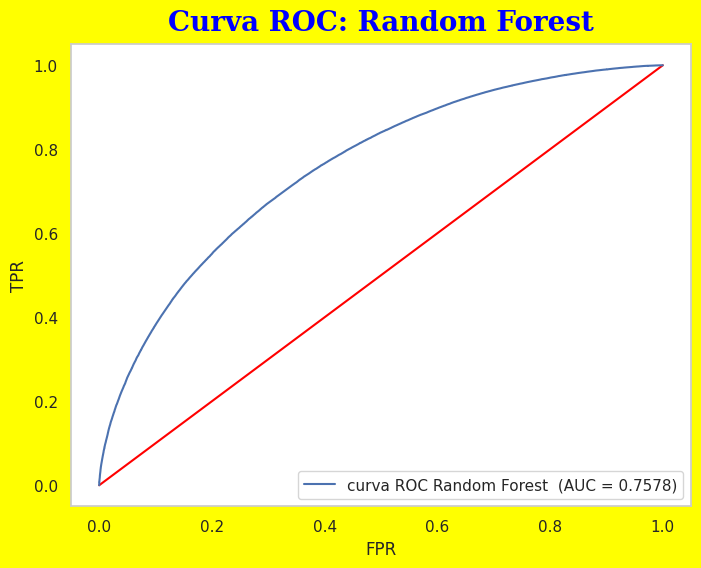

In [ ]:
## Graficando nuestro curva ROC
auc_roc_rf = roc_auc_score(y_test,y_proba_test_rf)
fpr, tpr, thresholds = roc_curve(y_test,y_proba_test_rf)
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
plt.plot(fpr,fpr,color='red')
plt.plot(fpr,tpr,label=(f'curva ROC Random Forest  (AUC = {auc_roc_rf:.4f})'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC: Random Forest',pad=10, fontdict={'fontsize': 20, 'fontfamily':'serif','fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.legend(loc = 'lower right')
plt.grid(False)
# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.show()

In [ ]:
metricas_rf = [accuracy_rf, precision_rf, recall_rf, f1_rf, auc_roc_rf]

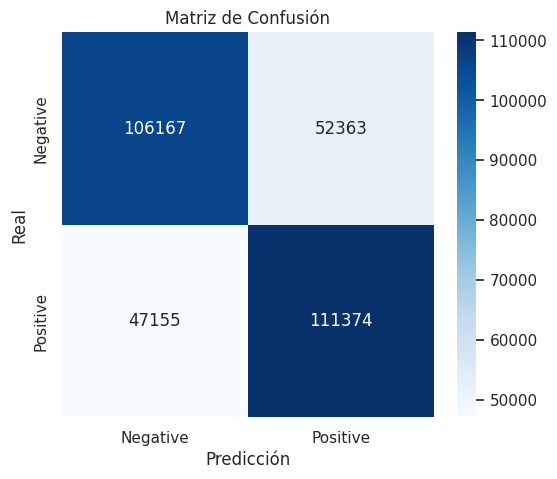

In [ ]:
# Crear la matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

### 6.4.3 XGBOOST

In [ ]:
## xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
## standardscaler
from sklearn.preprocessing import StandardScaler

scaler_xgb = StandardScaler()
x_train_xgb = scaler_xgb.fit_transform(x_train)
x_test_xgb = scaler_xgb.transform(x_test)

In [ ]:
## guardando en pckl el scaler_xgb
import pickle

# Guardar el modelo
with open("scaler_xgb.pkl", "wb") as f:
    pickle.dump(scaler_xgb, f)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import HalvingRandomSearchCV

# Definir el modelo
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200, 500],       # Número de árboles
    'max_depth': [3, 5, 7, 10],               # Profundidad máxima del árbol
    'learning_rate': [0.01, 0.1, 0.2, 0.3],   # Tasa de aprendizaje
    'subsample': [0.6, 0.8, 1.0],             # Proporción de muestras usadas en cada árbol
    'colsample_bytree': [0.6, 0.8, 1.0],      # Proporción de features usadas en cada árbol
    'gamma': [0, 1, 5]                        # Regularización para evitar sobreajuste
}

# Definir la búsqueda de hiperparámetros con HalvingRandomSearchCV
halving_xgb = HalvingRandomSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    factor=2,  # Reduce a la mitad los modelos en cada iteración
    min_resources=50,  # Mínimo de muestras para empezar
    scoring='roc_auc',  # Métrica de evaluación
    cv=3,  # Validación cruzada
    random_state=42,
    verbose=1  # Nivel de detalle en la salida
)

# Ajustar el modelo
halving_xgb.fit(x_train_xgb, y_train)

# Mejor modelo encontrado
best_xgb = halving_xgb.best_estimator_
print("Mejores hiperparámetros:", halving_xgb.best_params_)

n_iterations: 11
n_required_iterations: 11
n_possible_iterations: 14
min_resources_: 50
max_resources_: 739803
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 1728
n_resources: 50
Fitting 3 folds for each of 1728 candidates, totalling 5184 fits
----------
iter: 1
n_candidates: 864
n_resources: 100
Fitting 3 folds for each of 864 candidates, totalling 2592 fits
----------
iter: 2
n_candidates: 432
n_resources: 200
Fitting 3 folds for each of 432 candidates, totalling 1296 fits
----------
iter: 3
n_candidates: 216
n_resources: 400
Fitting 3 folds for each of 216 candidates, totalling 648 fits
----------
iter: 4
n_candidates: 108
n_resources: 800
Fitting 3 folds for each of 108 candidates, totalling 324 fits
----------
iter: 5
n_candidates: 54
n_resources: 1600
Fitting 3 folds for each of 54 candidates, totalling 162 fits
----------
iter: 6
n_candidates: 27
n_resources: 3200
Fitting 3 folds for each of 27 candidates, totalling 81 fits
----------
iter: 7
n_candidat

In [ ]:
# Evaluar el modelo en el conjunto de prueba
y_pred_xgb = best_xgb.predict(x_test_xgb)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
print(f"Precisión en test: {accuracy_xgb:.4f}")
print(f"Precisión en test: {precision_xgb:.4f}")
print(f"Recall en test: {recall_xgb:.4f}")
print(f"F1 Score en test: {f1_xgb:.4f}")

Precisión en test: 0.6812
Precisión en test: 0.6689
Recall en test: 0.7177
F1 Score en test: 0.6924


In [ ]:
report_xgb = classification_report(y_test, y_pred_xgb, target_names=["Negative", "Positive"], output_dict=True)
pd.DataFrame(report_xgb).style.background_gradient()

,Negative,Positive,accuracy,macro avg,weighted avg
precision,0.695440,0.668858,0.681179,0.682149,0.682149
recall,0.644698,0.717660,0.681179,0.681179,0.681179
f1-score,0.669109,0.692400,0.681179,0.680754,0.680754
support,158530.000000,158529.000000,0.681179,317059.000000,317059.000000


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_proba_test_xgb = best_xgb.predict_proba(x_test_xgb)[:, 1]

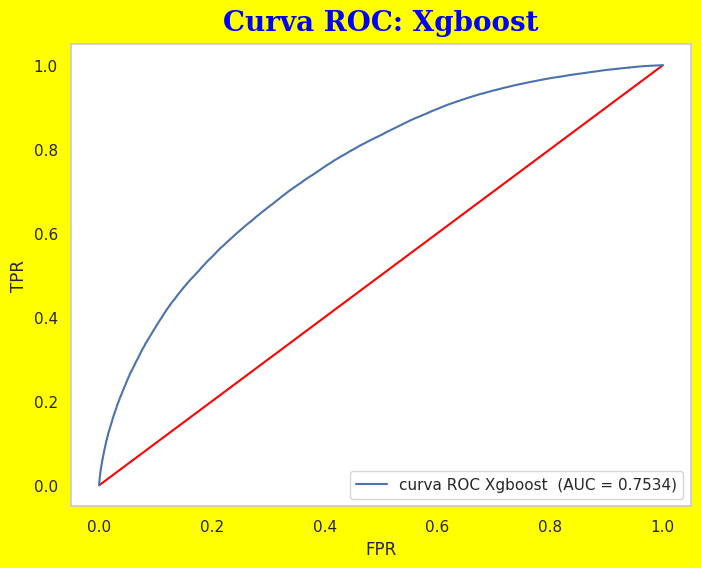

In [ ]:
## Graficando nuestro curva ROC
auc_roc_xgb = roc_auc_score(y_test,y_proba_test_xgb)
fpr, tpr, thresholds = roc_curve(y_test,y_proba_test_xgb)
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
plt.plot(fpr,fpr,color='red')
plt.plot(fpr,tpr,label=(f'curva ROC Xgboost  (AUC = {auc_roc_xgb:.4f})'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC: Xgboost',pad=10, fontdict={'fontsize': 20, 'fontfamily':'serif','fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.legend(loc = 'lower right')
plt.grid(False)
# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.show()

In [ ]:
metricas_xgb = [accuracy_xgb, precision_xgb, recall_xgb, f1_xgb, auc_roc_xgb]

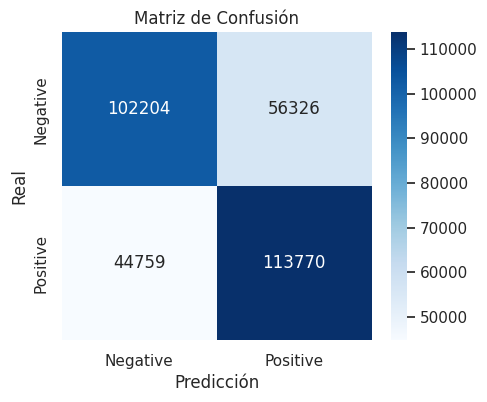

In [ ]:
# Crear la matriz de confusión
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Graficar la matriz de confusión
plt.figure(figsize=(5, 4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

In [ ]:
## guardando el best_xgb model
import pickle

# Guardar el modelo
with open("modelo_xgb_new.pkl", "wb") as f:
    pickle.dump(best_xgb, f)

In [ ]:
# Cargar el modelo
with open("modelo_xgb_new.pkl", "rb") as f:
    modelo_cargado = pickle.load(f)

# Verificar predicciones
y_pred_new_new = modelo_cargado.predict(x_test_xgb)

In [ ]:
pd.DataFrame([y_pred_new_new, y_test])

,0,1,2,3,4,5,6,7,8,9,...,317049,317050,317051,317052,317053,317054,317055,317056,317057,317058
0,1,1,0,1,0,1,1,0,1,1,...,0,1,0,0,1,1,1,1,1,1
1,1,1,1,1,0,1,1,0,1,1,...,1,1,0,0,1,1,1,1,1,0


# 7. COMPARACIÓN DE MODELOS

In [ ]:
modelos = ['Regresión Logística', 'Random Forest', 'xGBoost']
metricas = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']

In [ ]:
## Creando el cuadro comparativo de métricas para nuestros modelos evaluados
comparativo_metricas = pd.DataFrame({
    'Métricas': metricas,
     modelos[0]: metricas_lr,
     modelos[1]: metricas_rf,
     modelos[2]: metricas_xgb
})
comparativo_metricas.style.background_gradient()

,Métricas,Regresión Logística,Random Forest,xGBoost
0,Accuracy,0.675269,0.686122,0.681179
1,Precision,0.670249,0.680201,0.668858
2,Recall,0.690006,0.702547,0.717660
3,F1-Score,0.679984,0.691193,0.692400
4,AUC,0.745281,0.757775,0.753437


In [ ]:
## Cambiamos de un formato ancho a uno largo para poder graficar de mejor manera nuestros datos
comparativo_metricas.melt(id_vars='Métricas').style.background_gradient()

,Métricas,variable,value
0,Accuracy,Regresión Logística,0.675269
1,Precision,Regresión Logística,0.670249
2,Recall,Regresión Logística,0.690006
3,F1-Score,Regresión Logística,0.679984
4,AUC,Regresión Logística,0.745281
5,Accuracy,Random Forest,0.686122
6,Precision,Random Forest,0.680201
7,Recall,Random Forest,0.702547
8,F1-Score,Random Forest,0.691193
9,AUC,Random Forest,0.757775


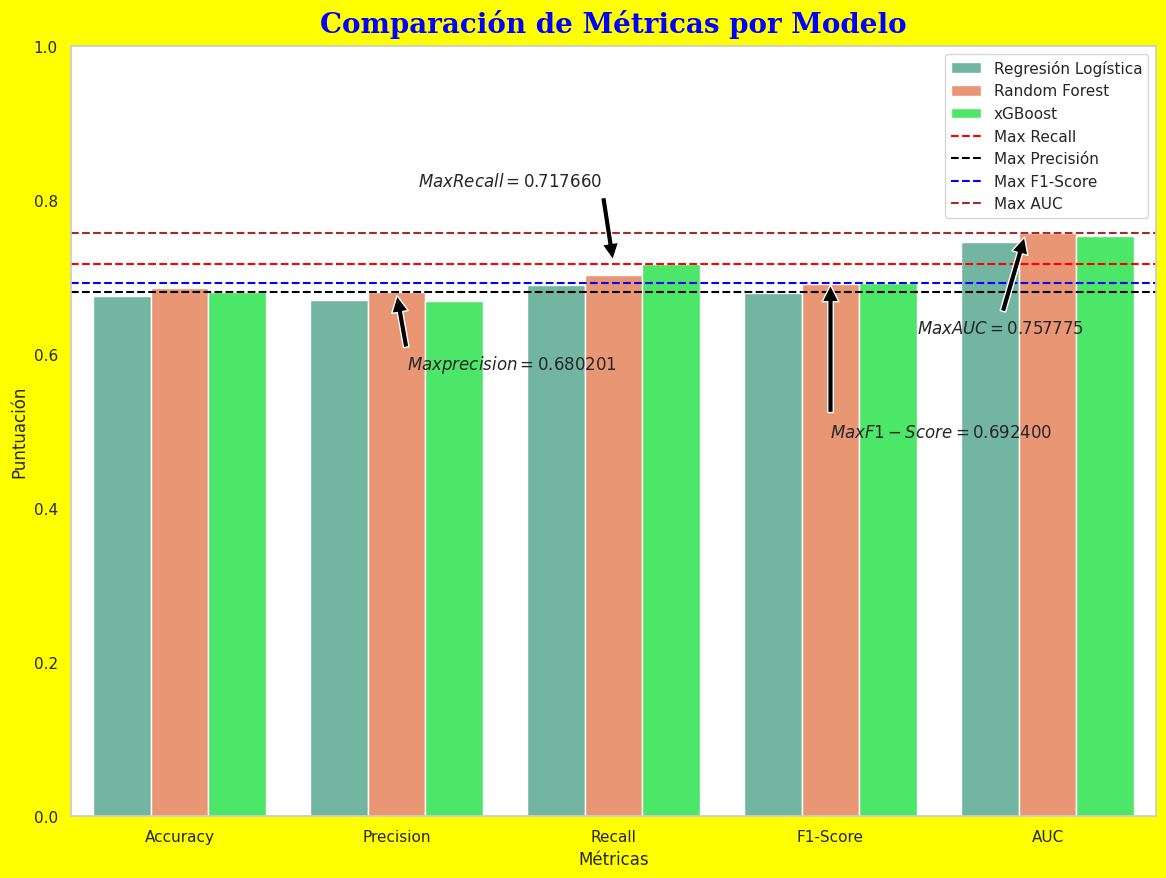

In [ ]:
## Graficando la comparación de métricas entre nuestros modelos evaluados
plt.figure(figsize=(14, 10))
colors = ['#66c2a5', '#fc8d62',"#33FF57", "#3366FF"]
sns.barplot(data=comparativo_metricas.melt(id_vars='Métricas'), x='Métricas', y='value', hue='variable', palette=colors)
plt.xlabel('Métricas')
plt.ylabel('Puntuación')
ax = plt.gca()  # Obtiene el objeto de los ejes
ax.set_ylim(bottom=0, top=1)
plt.axhline(y=0.717660, color='red', linestyle='--', label='Max Recall')
plt.axhline(y=0.680201, color='black', linestyle='--', label='Max Precisión')
plt.axhline(y=0.692400, color='blue', linestyle='--', label='Max F1-Score')
plt.axhline(y=0.757775, color='brown', linestyle='--', label='Max AUC')
plt.annotate('$Max Recall = 0.717660$', xy=(2, 0.717660), xytext=(1.1, 0.717660+0.1),fontsize=12, arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('$Max precision = 0.680201$', xy=(1, 0.680201), xytext=(1.05, 0.680201-0.1),fontsize=12, arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('$Max F1-Score = 0.692400$', xy=(3, 0.692400+0.007), xytext=(3, 0.692400-0.2),fontsize=12,
                                        arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('$Max AUC = 0.757775$', xy=(3.9, 0.757775), xytext=(3.4, 0.757775-0.13),fontsize=12,
                                        arrowprops=dict(facecolor='black', shrink=0.05))
plt.title('Comparación de Métricas por Modelo', pad=10, fontdict={'fontsize': 20, 'fontfamily':'serif','fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.grid(False)
plt.legend();

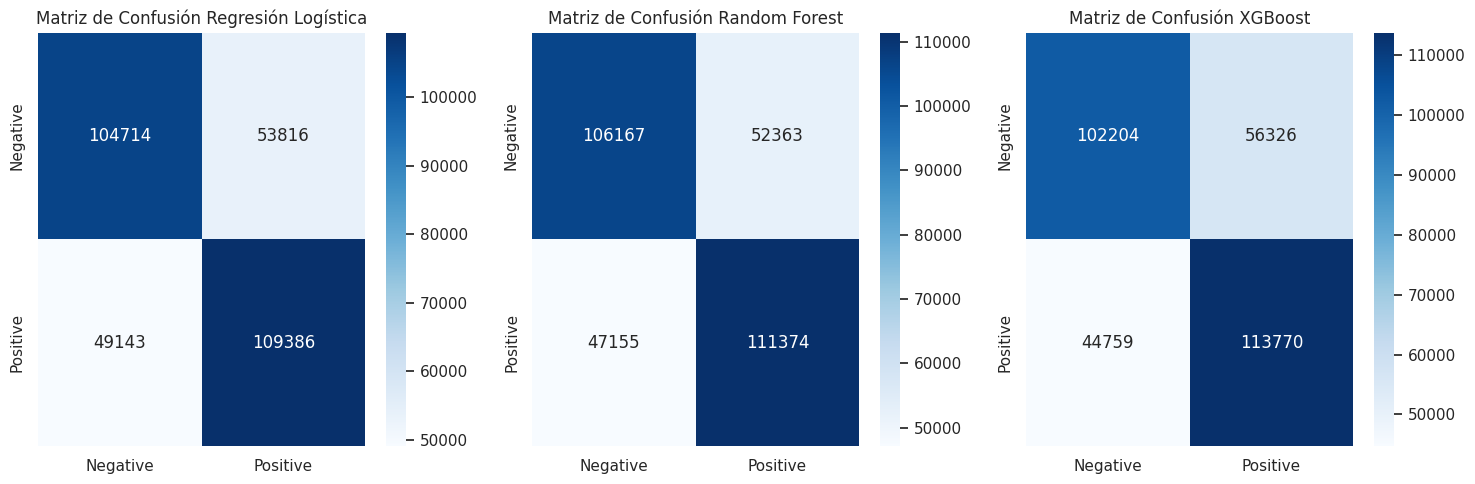

In [ ]:
## Graficando las 3 matriz de confusión
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"], ax=axs[0])
axs[0].set_title("Matriz de Confusión Regresión Logística")
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"], ax=axs[1])
axs[1].set_title("Matriz de Confusión Random Forest")
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"], ax=axs[2])
axs[2].set_title("Matriz de Confusión XGBoost")
plt.tight_layout()
plt.show()


# 8. EVALUANDO EL MODELO

In [1]:
import pickle
# Cargar el modelo
with open("modelo_xgb_new.pkl", "rb") as f:
    modelo_cargado = pickle.load(f)

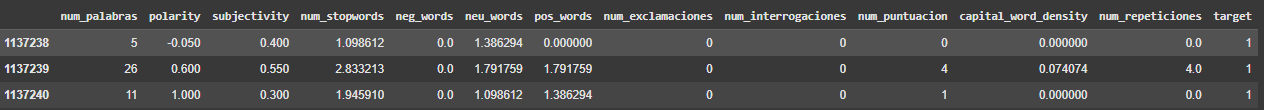

In [2]:
import nltk
nltk.download('stopwords')

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [4]:
%%capture
!pip install nltk
!pip install emoji
!pip install vaderSentiment
!pip install textblob

In [5]:
import pandas as pd
import numpy as np
import os
import re
import string
import sklearn
import emoji
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer

import nltk
import math

import textblob
from textblob import TextBlob
import nltk
nltk.download('stopwords')
import nltk
nltk.download('vader_lexicon')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
def clean_text_func(text):
    ## Eliminar URLs (http, https, www)
    text = re.sub(r'http\S+|www\S+', '', text)

    ## Eliminar menciones de usuarios
    text = re.sub(r'@[^\s]+', '', text)

    ## Eliminando los Hashtags
    text = re.sub(r'#\w+', '', text)

    ## Eliminando los emojis
    text = emoji.replace_emoji(text, replace="")

    ## Eliminar dominios .com (palabras terminadas en .com)
    text = re.sub(r'\b\S*\.com\b', '', text)

    # Eliminar caracteres no ASCII (como â\x99«)
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    ## Convirtiendo % en palabra percent
    text = re.sub(r'%', ' percent', text)

    ## Eliminando signos de puntuación
    text = text.translate(str.maketrans('', '', string.punctuation + '¡¿'))
    # text = re.sub(rf"[{re.escape(string.punctuation)}]", ' ', text)

    ## Cambiando el doble espacio a espacio simple
    # text = text.replace('  ', ' ')
    text = re.sub(r'\s+', ' ', text)

    ## Eliminando los números del texto
    text = re.sub(r'\d+', '', text)
    # text = re.sub(r'\b\d+([-/]\d+)*\b', '', text)

    ## Eliminando espacios al inicio y final
    text = text.strip()

    ## Convirtiendo a Minúsculas
    text = text.lower()

    return text

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def neg(text):
  text = str(text)
  scores = analyzer.polarity_scores(text)
  return round(scores['neg']*len(text.split()))
def neu(text):
  text = str(text)
  scores = analyzer.polarity_scores(text)
  return round(scores['neu']*len(text.split()))
def pos(text):
  text = str(text)
  scores = analyzer.polarity_scores(text)
  return round(scores['pos']*len(text.split()))


## función para el sarcasmo
from nltk.sentiment import SentimentIntensityAnalyzer
analyzer_sarcasmo = SentimentIntensityAnalyzer()

def detect_sarcasm(text):
    sentiment = analyzer_sarcasmo.polarity_scores(text)

    # Detecta posibles sarcasmos cuando hay un contraste entre palabras positivas y negativas
    if sentiment['neg'] > 0.4 and sentiment['pos'] > 0.2:
        return 1  # Sarcasmo detectado
    return 0  # No sarcástico


## función para entropía
def calculate_entropy(text):
    prob = [text.count(c) / len(text) for c in set(text)]
    entropy = -sum([p * math.log(p) for p in prob])
    return entropy

In [7]:
## creamos una función general para poder convertir el texto
def convertir_texto(text, clean_text_func, neg, pos, neu):
  # global clean_text, neg, neu, pos
  df = pd.DataFrame({'text':text}, index=[0])
  df['clean_text'] = df['text'].apply(lambda x: clean_text_func(x))
  df['without_stopwords'] = df['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words('english')]))
  df['num_palabras'] = df['clean_text'].apply(lambda x: len(str(x).split()))
  # df['num_palabras_unicas'] = df['clean_text'].apply(lambda x: len(set(str(x).split())))
  df['polarity'] = df['without_stopwords'].apply(lambda x: TextBlob(x).sentiment.polarity)
  df['subjectivity'] = df['without_stopwords'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
  df['num_stopwords'] = df['clean_text'].apply(lambda x: len([word for word in x.split() if word in stopwords.words('english')]))
  df['neg_words'] = df['without_stopwords'].apply(neg)
  df['neu_words'] = df['without_stopwords'].apply(neu)
  df['pos_words'] = df['without_stopwords'].apply(pos)
  df['num_exclamaciones'] = df['text'].apply(lambda x: x.count('!')).apply(lambda x: 0 if x == 0 else 1)
  df['num_interrogaciones'] = df['text'].apply(lambda x: x.count('?')).apply(lambda x: 0 if x == 0 else 1)
  df['num_puntuacion'] = df['text'].apply(lambda x: len(set([c for c in x if c in string.punctuation])))
  df['capital_word_density'] = df['text'].apply(lambda x: sum(1 for word in x.split() if word.isupper()) / len(x.split()) if x.split() else 0)
  df['num_repeticiones'] = df['clean_text'].apply(lambda x: len([word for word in x.split() if x.split().count(word) > 1]))
  df['sarcasmo'] = df['text'].apply(detect_sarcasm)
  df['entropia'] = df['clean_text'].apply(calculate_entropy)

  return df

In [8]:
def tranformation(df):
  df_num = df.drop(columns=['text', 'clean_text', 'without_stopwords'])
  ## aplicando transformación logarítmica num_neg, pos, neu, num_stopwords y entropía
  df_num['neg_words'] = np.log1p(df_num['neg_words'])
  df_num['neu_words'] = np.log1p(df_num['neu_words'])
  df_num['pos_words'] = np.log1p(df_num['pos_words'])
  df_num['num_stopwords'] = np.log1p(df_num['num_stopwords'])
  df_num['entropia'] = np.log1p(df_num['entropia'])
  return df_num

def prediction(df_num):
  with open('scaler_xgb.pkl', 'rb') as file:
    scaler_new = pickle.load(file)
  df_num = scaler_new.transform(df_num)
  prediccion = modelo_cargado.predict(df_num)
  if prediccion == 0:
    result = 'Negativo'
  else:
    result = 'Positivo'
  return result

In [11]:
text = "That's too bad to be real, this is awful"
## REALIZANDO PREDICCIÓN DE UN TEXTO
df = convertir_texto(text, clean_text_func, neg, pos, neu)
df_num = tranformation(df)
prediccion = prediction(df_num)
print(prediccion)

Negativo


In [12]:
text = "This is very awesome, Like this"
## REALIZANDO PREDICCIÓN DE UN TEXTO
df = convertir_texto(text, clean_text_func, neg, pos, neu)
df_num = tranformation(df)
prediccion = prediction(df_num)
print(prediccion)

Positivo
